# Importar Librerias

In [1]:
import pandas as pd
import re
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sn

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed

# Libreria para analizar la clase de palabras
import nltk
nltk.download([
    "vader_lexicon",
])
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Joseph\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Carga de Datos

In [2]:
df = pd.read_csv('./train.csv')
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

# 3) Limpieza y Procesamiento de datos

In [3]:
tweets = list(df.iloc[:,3])

#Lista de caracteres que se repiten
disallowed_characters = "._!:@#'=><?()|_-/[]*~;"

#Lista de stopwords, etiquetas HTML y combinaciones de \x89 que deben ser removidas
disallowed_lit = ['our ', ' our ', ' of ', ' by ', ' there ', ' the ', ' and ', ' to ', '\n', '&amp', ' for ', ' nor ', 'yet', ' so ', ' but ', ' if ', 'if ', '&gt', '&lt', 'when', 'whenever', 'where', 'wherever', "while", ' for ', 'because', 'before', '\x89ûò', '\x89ûª', '\x89ûï', '\x89û÷', '\x89û', '\x89ã¢', '\x9d', '\x89ââ', '\x89ûó', '+']

for i in range(len(tweets)):
    
    #Cambiar todas las letras a minusculas
    tweets[i] = tweets[i].lower()
    
    #Eliminar links
    tweets[i] = re.sub('http://\S+|https://\S+', '', tweets[i])
    
    #Eliminar caracteres especiales
    for character in disallowed_characters:
        tweets[i] = tweets[i].replace(character, "")
    
    #Eliminar articulos, preposiciones y etiquetas HTML
    for character in disallowed_lit:
        tweets[i] = tweets[i].replace(character, " ")
    
    #Eliminar espacios que tienen tamaño superior a 1
    tweets[i] = re.sub("\s+" , " ", tweets[i])

#print(tweets)

df['cleaned_text'] = tweets

In [4]:
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                       cleaned_text  
0       1   deeds are reason this earthquake may allah fo...  
1       1              forest fire near la ronge sask canada  
2       1  all residents asked shelter in place are being...  
3       1  13,000 people receive wildfires evacuation ord...  
4       1  just got sent this photo from ruby alaska as s...

# 4) Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. 

In [5]:
# Función para encontrar frecuencia de palabras
def freq(str, prnt=True):
    palabra = []
    cantidad = []
 
    # Separamos el string en una lista de palabras
    str = str.split()        
    str2 = []
 
    # Iteramos en la lista, hasta el último valor
    for i in str:            
 
        # Chequeamos que exista más de una palabra
        if i not in str2:
 
            # Insertamos el valor el la lista
            str2.append(i)
             
    for i in range(0, len(str2)):
        
        palabra.append(str2[i])
        cantidad.append(int(str.count(str2[i])))
                        
        # Contamos la frecuencia de cada palabra presente en str2 y mostramos
        if prnt:
            print('La frecuencia de: ', str2[i], 'es :', str.count(str2[i]))
        
    return palabra, cantidad

In [6]:
texto = ""
for text in tweets:
    texto += text + " " 
    
palabra, cantidad = freq(texto)

La frecuencia de:  deeds es : 2
La frecuencia de:  are es : 402
La frecuencia de:  reason es : 20
La frecuencia de:  this es : 479
La frecuencia de:  earthquake es : 50
La frecuencia de:  may es : 88
La frecuencia de:  allah es : 9
La frecuencia de:  forgive es : 2
La frecuencia de:  us es : 164
La frecuencia de:  all es : 258
La frecuencia de:  forest es : 65
La frecuencia de:  fire es : 252
La frecuencia de:  near es : 54
La frecuencia de:  la es : 26
La frecuencia de:  ronge es : 1
La frecuencia de:  sask es : 1
La frecuencia de:  canada es : 11
La frecuencia de:  residents es : 8
La frecuencia de:  asked es : 9
La frecuencia de:  shelter es : 6
La frecuencia de:  in es : 1979
La frecuencia de:  place es : 26
La frecuencia de:  being es : 90
La frecuencia de:  notified es : 1
La frecuencia de:  officers es : 8
La frecuencia de:  no es : 255
La frecuencia de:  other es : 38
La frecuencia de:  evacuation es : 50
La frecuencia de:  or es : 204
La frecuencia de:  orders es : 11
La frecu

La frecuencia de:  next es : 51
La frecuencia de:  year es : 69
La frecuencia de:  least es : 36
La frecuencia de:  deputies es : 4
La frecuencia de:  shot es : 27
La frecuencia de:  brighton es : 2
La frecuencia de:  home es : 76
La frecuencia de:  wife es : 12
La frecuencia de:  six es : 4
La frecuencia de:  years es : 79
La frecuencia de:  jail es : 3
La frecuencia de:  setting es : 11
La frecuencia de:  niece es : 3
La frecuencia de:  superintendent es : 1
La frecuencia de:  lanford es : 1
La frecuencia de:  salmon es : 3
La frecuencia de:  has es : 249
La frecuencia de:  r es : 17
La frecuencia de:  arsonist es : 18
La frecuencia de:  deliberately es : 1
La frecuencia de:  black es : 66
La frecuencia de:  church es : 7
La frecuencia de:  north es : 27
La frecuencia de:  carolinaåêablaze es : 1
La frecuencia de:  noches es : 1
La frecuencia de:  elbestia es : 1
La frecuencia de:  alexissanchez es : 1
La frecuencia de:  happy es : 23
La frecuencia de:  teammates es : 1
La frecuencia

La frecuencia de:  aashiqui es : 1
La frecuencia de:  actress es : 2
La frecuencia de:  anu es : 1
La frecuencia de:  aggarwal es : 1
La frecuencia de:  her es : 133
La frecuencia de:  nearfatal es : 1
La frecuencia de:  suffield es : 1
La frecuencia de:  alberta es : 4
La frecuencia de:  9 es : 31
La frecuencia de:  backup es : 2
La frecuencia de:  southaccident es : 1
La frecuencia de:  blocking es : 5
La frecuencia de:  right es : 68
La frecuencia de:  2 es : 160
La frecuencia de:  lanes es : 5
La frecuencia de:  exit es : 8
La frecuencia de:  langtree es : 1
La frecuencia de:  rdconsider es : 1
La frecuencia de:  nc es : 10
La frecuencia de:  115 es : 1
La frecuencia de:  150 es : 3
La frecuencia de:  16 es : 15
La frecuencia de:  alternate es : 1
La frecuencia de:  changed es : 4
La frecuencia de:  determine es : 1
La frecuencia de:  options es : 4
La frecuencia de:  financially es : 1
La frecuencia de:  support es : 24
La frecuencia de:  plans es : 27
La frecuencia de:  ongoing e

La frecuencia de:  kca es : 4
La frecuencia de:  votejkt48id es : 4
La frecuencia de:  mbataweel es : 1
La frecuencia de:  rip es : 9
La frecuencia de:  binladen es : 1
La frecuencia de:  airplanes es : 1
La frecuencia de:  almost es : 25
La frecuencia de:  coworker es : 2
La frecuencia de:  nudes es : 1
La frecuencia de:  mode es : 16
La frecuencia de:  mickinyman es : 1
La frecuencia de:  theatlantic es : 1
La frecuencia de:  might es : 23
La frecuencia de:  wreck es : 61
La frecuencia de:  politics es : 10
La frecuencia de:  mlb es : 5
La frecuencia de:  unbelievably es : 1
La frecuencia de:  insane es : 6
La frecuencia de:  airport es : 30
La frecuencia de:  aircraft es : 25
La frecuencia de:  aeroplane es : 1
La frecuencia de:  runway es : 7
La frecuencia de:  freaky es : 1
La frecuencia de:  airplaneåê29072015 es : 1
La frecuencia de:  usama es : 1
La frecuencia de:  ladins es : 1
La frecuencia de:  naturally es : 1
La frecuencia de:  plane es : 34
La frecuencia de:  festival es 

La frecuencia de:  stormbeard es : 1
La frecuencia de:  steellord es : 1
La frecuencia de:  seen es : 22
La frecuencia de:  judas es : 1
La frecuencia de:  priest es : 1
La frecuencia de:  2005 es : 3
La frecuencia de:  rob es : 4
La frecuencia de:  scorpions es : 2
La frecuencia de:  astonishing es : 1
La frecuencia de:  gig es : 2
La frecuencia de:  officially es : 6
La frecuencia de:  skipping es : 2
La frecuencia de:  fantasticfourfant4sticwhatever es : 1
La frecuencia de:  hashtag es : 3
La frecuencia de:  reviews es : 5
La frecuencia de:  bummer es : 2
La frecuencia de:  tomcatarts es : 2
La frecuencia de:  thus es : 5
La frecuencia de:  explaining es : 1
La frecuencia de:  case es : 22
La frecuencia de:  survivor es : 3
La frecuencia de:  evolved es : 1
La frecuencia de:  godlike es : 1
La frecuencia de:  completely es : 9
La frecuencia de:  cech es : 1
La frecuencia de:  paul es : 10
La frecuencia de:  keegan es : 1
La frecuencia de:  legion es : 3
La frecuencia de:  itself es 

La frecuencia de:  heart es : 34
La frecuencia de:  conversations es : 3
La frecuencia de:  zonewolf123 es : 1
La frecuencia de:  liked es : 44
La frecuencia de:  video es : 165
La frecuencia de:  mo es : 6
La frecuencia de:  planet es : 5
La frecuencia de:  lone es : 3
La frecuencia de:  audience es : 3
La frecuencia de:  dad es : 15
La frecuencia de:  bought es : 8
La frecuencia de:  science es : 9
La frecuencia de:  doc es : 3
La frecuencia de:  impending es : 2
La frecuencia de:  biblical es : 1
La frecuencia de:  alexandrapullin es : 1
La frecuencia de:  indeed es : 8
La frecuencia de:  comes es : 17
La frecuencia de:  grizzly es : 1
La frecuencia de:  peak es : 2
La frecuencia de:  beginning es : 6
La frecuencia de:  dystopian es : 2
La frecuencia de:  movie es : 47
La frecuencia de:  scared es : 17
La frecuencia de:  storm es : 117
La frecuencia de:  cairo es : 2
La frecuencia de:  latest es : 60
La frecuencia de:  xmen es : 1
La frecuencia de:  yahootv es : 1
La frecuencia de: 

La frecuencia de:  wrist es : 2
La frecuencia de:  sport es : 7
La frecuencia de:  blue es : 19
La frecuencia de:  nylon es : 2
La frecuencia de:  fabric es : 2
La frecuencia de:  rea es : 8
La frecuencia de:  x1441 es : 1
La frecuencia de:  victorinox es : 1
La frecuencia de:  swiss es : 3
La frecuencia de:  date es : 17
La frecuencia de:  womens es : 21
La frecuencia de:  rubber es : 8
La frecuencia de:  mop es : 17
La frecuencia de:  241487 es : 1
La frecuencia de:  drayesha4 es : 1
La frecuencia de:  indiakomuntorjawabdo es : 1
La frecuencia de:  indian es : 14
La frecuencia de:  ki es : 2
La frecuencia de:  ìñ1 es : 1
La frecuencia de:  78 es : 3
La frecuencia de:  x1386 es : 1
La frecuencia de:  da es : 9
La frecuencia de:  mtvsummerstar es : 1
La frecuencia de:  videoveranomtv es : 2
La frecuencia de:  mtvhottest es : 6
La frecuencia de:  britney es : 2
La frecuencia de:  spears es : 3
La frecuencia de:  lana es : 1
La frecuencia de:  del es : 2
La frecuencia de:  rey es : 2
La 

La frecuencia de:  steals es : 1
La frecuencia de:  user es : 3
La frecuencia de:  credentials es : 1
La frecuencia de:  internet es : 14
La frecuencia de:  israeli es : 28
La frecuencia de:  forces es : 8
La frecuencia de:  raid es : 5
La frecuencia de:  palestine es : 5
La frecuencia de:  goat es : 2
La frecuencia de:  worry es : 13
La frecuencia de:  rocket es : 4
La frecuencia de:  okay es : 22
La frecuencia de:  lie es : 9
La frecuencia de:  senior es : 6
La frecuencia de:  diamond es : 5
La frecuencia de:  graveyard es : 2
La frecuencia de:  shift es : 15
La frecuencia de:  defend es : 4
La frecuencia de:  handside es : 1
La frecuencia de:  idiot es : 3
La frecuencia de:  volleyball es : 2
La frecuencia de:  ii es : 7
La frecuencia de:  machine es : 6
La frecuencia de:  simulation es : 2
La frecuencia de:  notleys es : 1
La frecuencia de:  tactful es : 1
La frecuencia de:  direct es : 1
La frecuencia de:  response es : 13
La frecuencia de:  harpers es : 1
La frecuencia de:  alber

La frecuencia de:  incredible es : 7
La frecuencia de:  nowplay es : 1
La frecuencia de:  listen es : 20
La frecuencia de:  lt es : 2
La frecuencia de:  53 es : 3
La frecuencia de:  wd es : 2
La frecuencia de:  pickup es : 2
La frecuencia de:  premium es : 3
La frecuencia de:  snowflake es : 1
La frecuencia de:  star es : 19
La frecuencia de:  wars es : 9
La frecuencia de:  power es : 33
La frecuencia de:  jedi es : 2
La frecuencia de:  battle es : 35
La frecuencia de:  droid es : 3
La frecuencia de:  hasbro es : 2
La frecuencia de:  general es : 14
La frecuencia de:  bull es : 1
La frecuencia de:  colonel es : 1
La frecuencia de:  2nd es : 11
La frecuencia de:  hampshire es : 3
La frecuencia de:  letter es : 2
La frecuencia de:  signed es : 10
La frecuencia de:  dragon es : 5
La frecuencia de:  z es : 4
La frecuencia de:  rotten es : 2
La frecuencia de:  tomatoes es : 2
La frecuencia de:  rottentomatoes es : 1
La frecuencia de:  added es : 17
La frecuencia de:  playlist es : 15
La fre

La frecuencia de:  7475 es : 1
La frecuencia de:  rockefellerchirockefellerunivheiress es : 1
La frecuencia de:  evade es : 1
La frecuencia de:  lgl es : 1
La frecuencia de:  efforts es : 5
La frecuencia de:  prosecute es : 1
La frecuencia de:  blks es : 1
La frecuencia de:  harvardu es : 1
La frecuencia de:  kidnapgafp es : 1
La frecuencia de:  irandeal es : 9
La frecuencia de:  activity es : 5
La frecuencia de:  broken es : 10
La frecuencia de:  27 es : 3
La frecuencia de:  agreements es : 1
La frecuencia de:  threat es : 13
La frecuencia de:  cdcgov es : 2
La frecuencia de:  allay es : 1
La frecuencia de:  glanders es : 1
La frecuencia de:  fears es : 11
La frecuencia de:  ahead es : 15
La frecuencia de:  rio es : 2
La frecuencia de:  olympic es : 5
La frecuencia de:  equestrian es : 1
La frecuencia de:  test es : 12
La frecuencia de:  event es : 12
La frecuencia de:  horsetalknz es : 1
La frecuencia de:  kaotixblaze es : 1
La frecuencia de:  craving es : 1
La frecuencia de:  pool e

La frecuencia de:  oh es : 35
La frecuencia de:  racing es : 3
La frecuencia de:  temperature es : 2
La frecuencia de:  roof es : 7
La frecuencia de:  fifth es : 5
La frecuencia de:  harmony es : 1
La frecuencia de:  omgbethersss es : 1
La frecuencia de:  bethanymota es : 1
La frecuencia de:  dmac1043 es : 1
La frecuencia de:  spanish es : 5
La frecuencia de:  word es : 10
La frecuencia de:  latin es : 2
La frecuencia de:  origin es : 3
La frecuencia de:  meaning es : 3
La frecuencia de:  reddish es : 1
La frecuencia de:  colored es : 1
La frecuencia de:  dummies es : 1
La frecuencia de:  pronouncing es : 1
La frecuencia de:  freezing es : 3
La frecuencia de:  cold es : 13
La frecuencia de:  enough es : 16
La frecuencia de:  95 es : 1
La frecuencia de:  degree es : 5
La frecuencia de:  midday es : 1
La frecuencia de:  sun es : 12
La frecuencia de:  rn es : 9
La frecuencia de:  bekahw es : 1
La frecuencia de:  sweat es : 2
La frecuencia de:  bullets es : 5
La frecuencia de:  beating es 

La frecuencia de:  habit es : 1
La frecuencia de:  matters es : 3
La frecuencia de:  author es : 3
La frecuencia de:  hendy21 es : 1
La frecuencia de:  purdies es : 1
La frecuencia de:  tracy es : 1
La frecuencia de:  apperception es : 1
La frecuencia de:  bridgework es : 1
La frecuencia de:  xxhjesc es : 1
La frecuencia de:  dotish es : 1
La frecuencia de:  sexual es : 5
La frecuencia de:  revolutionblight es : 1
La frecuencia de:  stories es : 12
La frecuencia de:  acebabes es : 1
La frecuencia de:  healthweekly1 es : 1
La frecuencia de:  amateurnester es : 1
La frecuencia de:  swear es : 3
La frecuencia de:  uncover es : 1
La frecuencia de:  slumber es : 1
La frecuencia de:  willhillbet es : 1
La frecuencia de:  result es : 8
La frecuencia de:  app es : 9
La frecuencia de:  parksboardfacts es : 1
La frecuencia de:  zippoline es : 1
La frecuencia de:  community es : 9
La frecuencia de:  moveit es : 1
La frecuencia de:  policy es : 28
La frecuencia de:  ohio es : 3
La frecuencia de:  

La frecuencia de:  argh es : 1
La frecuencia de:  resigninshame es : 1
La frecuencia de:  listening es : 7
La frecuencia de:  jay es : 3
La frecuencia de:  lauradeholanda es : 1
La frecuencia de:  forrest es : 1
La frecuencia de:  83 es : 2
La frecuencia de:  awful es : 6
La frecuencia de:  xxx es : 3
La frecuencia de:  nightmare es : 2
La frecuencia de:  elm es : 1
La frecuencia de:  remade es : 1
La frecuencia de:  sony es : 2
La frecuencia de:  stephen es : 5
La frecuencia de:  tower es : 2
La frecuencia de:  stephenking es : 1
La frecuencia de:  thedarktower es : 1
La frecuencia de:  bdisgusting es : 1
La frecuencia de:  tradcatknight es : 1
La frecuencia de:  bs es : 3
La frecuencia de:  okanowa es : 1
La frecuencia de:  mainline es : 1
La frecuencia de:  invasion es : 3
La frecuencia de:  looked es : 6
La frecuencia de:  insomnia es : 2
La frecuencia de:  grrrr es : 1
La frecuencia de:  zhenghxn es : 1
La frecuencia de:  akame es : 1
La frecuencia de:  ga es : 3
La frecuencia de:

La frecuencia de:  dapurplesharpie es : 1
La frecuencia de:  skimmed es : 1
La frecuencia de:  missed es : 7
La frecuencia de:  lyrically es : 1
La frecuencia de:  bomairinge es : 1
La frecuencia de:  elutranscendent es : 1
La frecuencia de:  straight es : 11
La frecuencia de:  bitches es : 5
La frecuencia de:  22 es : 10
La frecuencia de:  friendships es : 1
La frecuencia de:  mics es : 1
La frecuencia de:  together es : 12
La frecuencia de:  mopheme es : 1
La frecuencia de:  bigstar es : 1
La frecuencia de:  johnson es : 3
La frecuencia de:  vuzuhustle es : 1
La frecuencia de:  today4got es : 1
La frecuencia de:  score es : 4
La frecuencia de:  editaxohaze es : 1
La frecuencia de:  bodys es : 2
La frecuencia de:  cuffed es : 1
La frecuencia de:  shouldnt es : 9
La frecuencia de:  ovofest es : 2
La frecuencia de:  ovo es : 2
La frecuencia de:  ziphimup es : 1
La frecuencia de:  enjoy es : 7
La frecuencia de:  bodybagging es : 2
La frecuencia de:  amaramin3 es : 1
La frecuencia de:  de

La frecuencia de:  mutilated es : 1
La frecuencia de:  brodyfrieling es : 1
La frecuencia de:  hannabrooksie es : 1
La frecuencia de:  shadowflame es : 1
La frecuencia de:  wraith es : 1
La frecuencia de:  whitehouse es : 2
La frecuencia de:  cos es : 4
La frecuencia de:  germany es : 5
La frecuencia de:  invaded es : 1
La frecuencia de:  poland es : 3
La frecuencia de:  pearl es : 1
La frecuencia de:  harbor es : 4
La frecuencia de:  preemptive es : 1
La frecuencia de:  cheetosarabia es : 1
La frecuencia de:  crudes es : 1
La frecuencia de:  cheetos es : 1
La frecuencia de:  christopherszen es : 1
La frecuencia de:  hunterlove1995 es : 1
La frecuencia de:  tblack es : 1
La frecuencia de:  raniakhalek es : 1
La frecuencia de:  uncle es : 2
La frecuencia de:  hopefully es : 5
La frecuencia de:  afghanistan es : 10
La frecuencia de:  kurtschlichter es : 4
La frecuencia de:  falphil es : 1
La frecuencia de:  compassion es : 1
La frecuencia de:  specific es : 3
La frecuencia de:  feminist 

La frecuencia de:  riots es : 6
La frecuencia de:  crowds es : 1
La frecuencia de:  reeves es : 1
La frecuencia de:  corner es : 2
La frecuencia de:  croydonization es : 1
La frecuencia de:  hazard es : 37
La frecuencia de:  installation es : 3
La frecuencia de:  noncompliant es : 3
La frecuencia de:  cladding es : 3
La frecuencia de:  wwwcbplawyers es : 2
La frecuencia de:  greenbuildermag es : 1
La frecuencia de:  nfpa es : 1
La frecuencia de:  webinar es : 1
La frecuencia de:  mitigation es : 4
La frecuencia de:  819 es : 1
La frecuencia de:  2pm es : 4
La frecuencia de:  et es : 2
La frecuencia de:  firewise es : 1
La frecuencia de:  michelenfpa es : 1
La frecuencia de:  burns es : 8
La frecuencia de:  blows es : 5
La frecuencia de:  destroys es : 11
La frecuencia de:  multiple es : 5
La frecuencia de:  downtown es : 18
La frecuencia de:  hinton es : 3
La frecuencia de:  thestrain es : 1
La frecuencia de:  ton es : 1
La frecuencia de:  160 es : 1
La frecuencia de:  ross es : 11
La 

La frecuencia de:  tuning es : 2
La frecuencia de:  soup es : 4
La frecuencia de:  diet es : 5
La frecuencia de:  recipes es : 4
La frecuencia de:  recip es : 1
La frecuencia de:  tickets es : 8
La frecuencia de:  accidentally es : 6
La frecuencia de:  lighter es : 1
La frecuencia de:  planned es : 14
La frecuencia de:  parenthood es : 8
La frecuencia de:  demonstrations es : 1
La frecuencia de:  pp es : 1
La frecuencia de:  mv es : 2
La frecuencia de:  strutting es : 1
La frecuencia de:  bg es : 1
La frecuencia de:  louistomlinson es : 1
La frecuencia de:  dancing es : 1
La frecuencia de:  stone es : 7
La frecuencia de:  atleast es : 1
La frecuencia de:  store es : 6
La frecuencia de:  individuals es : 4
La frecuencia de:  sounds es : 17
La frecuencia de:  hear es : 24
La frecuencia de:  foxnewsvideo es : 1
La frecuencia de:  aiiamericangiri es : 1
La frecuencia de:  anhqdc es : 1
La frecuencia de:  rioters es : 2
La frecuencia de:  looters es : 2
La frecuencia de:  forestservice es :

La frecuencia de:  sends es : 3
La frecuencia de:  industry es : 12
La frecuencia de:  unpredictable es : 1
La frecuencia de:  disconnected es : 1
La frecuencia de:  northbayhealth es : 1
La frecuencia de:  shines es : 1
La frecuencia de:  multicasualty es : 1
La frecuencia de:  scriptettesar es : 1
La frecuencia de:  katiecool447 es : 1
La frecuencia de:  btw es : 3
La frecuencia de:  30th es : 1
La frecuencia de:  september es : 6
La frecuencia de:  1986 es : 2
La frecuencia de:  avbronstein es : 1
La frecuencia de:  popehat es : 1
La frecuencia de:  instapundit es : 1
La frecuencia de:  estimates es : 2
La frecuencia de:  islands es : 2
La frecuencia de:  telling es : 5
La frecuencia de:  homealone2 es : 1
La frecuencia de:  film4 es : 1
La frecuencia de:  metrics es : 3
La frecuencia de:  correlate es : 1
La frecuencia de:  bests es : 1
La frecuencia de:  marketwatch es : 1
La frecuencia de:  independence es : 1
La frecuencia de:  rowyso es : 1
La frecuencia de:  setlist es : 2
La 

La frecuencia de:  southern es : 6
La frecuencia de:  md es : 8
La frecuencia de:  davidcameron es : 2
La frecuencia de:  upsetting es : 1
La frecuencia de:  bee es : 3
La frecuencia de:  companies es : 8
La frecuencia de:  savebees es : 3
La frecuencia de:  krefeld es : 2
La frecuencia de:  operations es : 4
La frecuencia de:  underway es : 4
La frecuencia de:  reportly es : 1
La frecuencia de:  collapsed es : 37
La frecuencia de:  cnnbrk es : 2
La frecuencia de:  ntvde es : 1
La frecuencia de:  bees es : 4
La frecuencia de:  instead es : 18
La frecuencia de:  toxic es : 2
La frecuencia de:  harm es : 37
La frecuencia de:  spillevacuationsred es : 1
La frecuencia de:  opening es : 9
La frecuencia de:  seattle es : 9
La frecuencia de:  dependency es : 4
La frecuencia de:  counselor es : 4
La frecuencia de:  intern es : 4
La frecuencia de:  respond es : 7
La frecuencia de:  spill es : 43
La frecuencia de:  beaumont es : 1
La frecuencia de:  benews es : 1
La frecuencia de:  ijetalerts es

La frecuencia de:  angry es : 20
La frecuencia de:  oneheartonemindonecss es : 1
La frecuencia de:  burst es : 7
La frecuencia de:  lungs es : 5
La frecuencia de:  district es : 2
La frecuencia de:  coaches es : 18
La frecuencia de:  cpr es : 1
La frecuencia de:  course es : 21
La frecuencia de:  panama es : 1
La frecuencia de:  gorpuazikinak es : 1
La frecuencia de:  tongue es : 7
La frecuencia de:  cum es : 4
La frecuencia de:  puddle es : 1
La frecuencia de:  indiepopmom es : 1
La frecuencia de:  breathe es : 3
La frecuencia de:  zimbabwe es : 2
La frecuencia de:  ruled es : 1
La frecuencia de:  dictator es : 1
La frecuencia de:  below es : 5
La frecuencia de:  durrellb es : 1
La frecuencia de:  punishing es : 1
La frecuencia de:  exhausted es : 2
La frecuencia de:  entity es : 1
La frecuencia de:  forced es : 8
La frecuencia de:  montego es : 1
La frecuencia de:  sewer es : 2
La frecuencia de:  tvjnews es : 1
La frecuencia de:  heartless es : 3
La frecuencia de:  whipped es : 3
La 

La frecuencia de:  restore es : 5
La frecuencia de:  southwest es : 1
La frecuencia de:  omaha es : 1
La frecuencia de:  utility es : 1
La frecuencia de:  pole es : 1
La frecuencia de:  stepkans es : 1
La frecuencia de:  lvictoria es : 1
La frecuencia de:  pvris es : 1
La frecuencia de:  collision es : 31
La frecuencia de:  broadway es : 7
La frecuencia de:  local es : 11
La frecuencia de:  zojadelin es : 1
La frecuencia de:  knob es : 2
La frecuencia de:  sac es : 5
La frecuencia de:  elkhorn es : 2
La frecuencia de:  blvd es : 7
La frecuencia de:  walerga es : 2
La frecuencia de:  trfc es : 9
La frecuencia de:  collision1141 es : 3
La frecuencia de:  enrt es : 3
La frecuencia de:  beatg3 es : 1
La frecuencia de:  rainier es : 2
La frecuencia de:  852015 es : 4
La frecuencia de:  608 es : 1
La frecuencia de:  15000270653 es : 1
La frecuencia de:  beatb2 es : 1
La frecuencia de:  fremont es : 1
La frecuencia de:  652 es : 1
La frecuencia de:  15000270364 es : 1
La frecuencia de:  flori

La frecuencia de:  skype es : 1
La frecuencia de:  84 es : 2
La frecuencia de:  faster es : 4
La frecuencia de:  overtook es : 1
La frecuencia de:  tru es : 1
La frecuencia de:  luv es : 1
La frecuencia de:  typing es : 1
La frecuencia de:  ants es : 1
La frecuencia de:  notes es : 1
La frecuencia de:  honestly es : 9
La frecuencia de:  nightmarish es : 1
La frecuencia de:  places es : 5
La frecuencia de:  parked es : 1
La frecuencia de:  modestmouseremix es : 1
La frecuencia de:  truestory es : 1
La frecuencia de:  f496d es : 1
La frecuencia de:  mhtw4fnet es : 7
La frecuencia de:  ttw es : 1
La frecuencia de:  skh es : 1
La frecuencia de:  ashton5sos es : 1
La frecuencia de:  luke5sos es : 1
La frecuencia de:  kuualohax es : 1
La frecuencia de:  husband es : 1
La frecuencia de:  posting es : 3
La frecuencia de:  crush es : 35
La frecuencia de:  mondays es : 1
La frecuencia de:  womem es : 1
La frecuencia de:  mommyisbomb es : 1
La frecuencia de:  jorrynja es : 1
La frecuencia de:  bf

La frecuencia de:  purpose es : 1
La frecuencia de:  $4k es : 1
La frecuencia de:  $500 es : 1
La frecuencia de:  tropical es : 8
La frecuencia de:  forming es : 1
La frecuencia de:  guam es : 1
La frecuencia de:  molave es : 1
La frecuencia de:  de es : 13
La frecuencia de:  jhaustin es : 2
La frecuencia de:  ames es : 2
La frecuencia de:  tribune es : 4
La frecuencia de:  xhnews es : 1
La frecuencia de:  retract es : 2
La frecuencia de:  pam es : 4
La frecuencia de:  wordpressdotcom es : 2
La frecuencia de:  condition es : 3
La frecuencia de:  easton es : 1
La frecuencia de:  softball es : 1
La frecuencia de:  fastpitch es : 1
La frecuencia de:  2920 es : 1
La frecuencia de:  sk398 es : 1
La frecuencia de:  severe es : 47
La frecuencia de:  bulletin es : 4
La frecuencia de:  typhoon es : 33
La frecuencia de:  hannaph es : 2
La frecuencia de:  soudelor es : 23
La frecuencia de:  issued es : 19
La frecuencia de:  derives es : 1
La frecuencia de:  powers es : 1
La frecuencia de:  calm e

La frecuencia de:  brisbane es : 1
La frecuencia de:  financialreview es : 1
La frecuencia de:  fuckboy es : 1
La frecuencia de:  pseudojuuzo es : 1
La frecuencia de:  michaelwestbiz es : 1
La frecuencia de:  gettinglost es : 1
La frecuencia de:  jennellensbb es : 1
La frecuencia de:  munclejim es : 1
La frecuencia de:  superficial es : 1
La frecuencia de:  wounds es : 34
La frecuencia de:  blizzheroes es : 2
La frecuencia de:  dustinbrowder es : 1
La frecuencia de:  constantly es : 4
La frecuencia de:  frequently es : 1
La frecuencia de:  danger es : 37
La frecuencia de:  distraction es : 1
La frecuencia de:  wildlife es : 1
La frecuencia de:  union es : 5
La frecuencia de:  signup es : 2
La frecuencia de:  release es : 10
La frecuencia de:  blast es : 30
La frecuencia de:  dyannbridges es : 1
La frecuencia de:  yeshayad es : 1
La frecuencia de:  rockin es : 4
La frecuencia de:  preview es : 3
La frecuencia de:  claytonbryant es : 3
La frecuencia de:  artistsunited es : 3
La frecuenci

La frecuencia de:  rises es : 5
La frecuencia de:  vaxshill es : 1
La frecuencia de:  deaths es : 41
La frecuencia de:  measles es : 2
La frecuencia de:  complications es : 2
La frecuencia de:  looses es : 2
La frecuencia de:  crickets es : 2
La frecuencia de:  bigamist es : 3
La frecuencia de:  pregnant es : 4
La frecuencia de:  nephew es : 1
La frecuencia de:  airlift es : 1
La frecuencia de:  lolgop es : 1
La frecuencia de:  voter es : 3
La frecuencia de:  fraud es : 1
La frecuencia de:  vra50 es : 1
La frecuencia de:  palermo es : 2
La frecuencia de:  shipwreck es : 3
La frecuencia de:  bsf es : 1
La frecuencia de:  jawans es : 1
La frecuencia de:  fidayeen es : 1
La frecuencia de:  aks es : 1
La frecuencia de:  insas es : 2
La frecuencia de:  rifles es : 2
La frecuencia de:  blame es : 4
La frecuencia de:  breast es : 1
La frecuencia de:  milk es : 3
La frecuencia de:  superfood es : 1
La frecuencia de:  worldwide es : 2
La frecuencia de:  stalled es : 1
La frecuencia de:  40% es 

La frecuencia de:  programme es : 2
La frecuencia de:  stephaniemarija es : 1
La frecuencia de:  dressing es : 1
La frecuencia de:  incessant es : 1
La frecuencia de:  perhaps es : 4
La frecuencia de:  historic es : 3
La frecuencia de:  applied es : 1
La frecuencia de:  exposed es : 2
La frecuencia de:  childsexabuse es : 1
La frecuencia de:  truly es : 5
La frecuencia de:  coverup es : 1
La frecuencia de:  bible es : 1
La frecuencia de:  backs es : 2
La frecuencia de:  unloads es : 1
La frecuencia de:  descriptive es : 1
La frecuencia de:  indecency es : 1
La frecuencia de:  chuckswindoll es : 1
La frecuencia de:  iflcanada es : 1
La frecuencia de:  owners es : 5
La frecuencia de:  differently es : 1
La frecuencia de:  pt1 es : 1
La frecuencia de:  slew es : 1
La frecuencia de:  posts es : 8
La frecuencia de:  fixed es : 3
La frecuencia de:  unfml es : 1
La frecuencia de:  boyhaus es : 1
La frecuencia de:  heaven es : 5
La frecuencia de:  jakeåê es : 1
La frecuencia de:  warm es : 3
L

La frecuencia de:  embarrassed es : 1
La frecuencia de:  indy es : 1
La frecuencia de:  stiiilo es : 1
La frecuencia de:  gamer es : 1
La frecuencia de:  backtoback es : 1
La frecuencia de:  chargedup es : 1
La frecuencia de:  media420 es : 1
La frecuencia de:  papicongress es : 1
La frecuencia de:  journo es : 1
La frecuencia de:  pragnik es : 1
La frecuencia de:  spring es : 13
La frecuencia de:  sat es : 4
La frecuencia de:  saddlebrooke es : 3
La frecuencia de:  sounders es : 1
La frecuencia de:  finish es : 3
La frecuencia de:  meerkat es : 1
La frecuencia de:  periscope es : 1
La frecuencia de:  snowball es : 2
La frecuencia de:  splottdave es : 1
La frecuencia de:  teampalestina es : 1
La frecuencia de:  28700 es : 1
La frecuencia de:  1967 es : 1
La frecuencia de:  home2 es : 1
La frecuencia de:  suites es : 1
La frecuencia de:  salvis es : 2
La frecuencia de:  bistro es : 2
La frecuencia de:  former es : 17
La frecuencia de:  bbsnews es : 1
La frecuencia de:  palestinians es :

La frecuencia de:  depot es : 1
La frecuencia de:  nopassenger es : 1
La frecuencia de:  derails es : 4
La frecuencia de:  stury es : 1
La frecuencia de:  note es : 3
La frecuencia de:  illustration es : 2
La frecuencia de:  subway es : 2
La frecuencia de:  freeing es : 1
La frecuencia de:  newidea es : 1
La frecuencia de:  wout es : 1
La frecuencia de:  title es : 5
La frecuencia de:  wtwitter es : 1
La frecuencia de:  whoa es : 2
La frecuencia de:  chief es : 8
La frecuencia de:  requa es : 1
La frecuencia de:  sixcar es : 1
La frecuencia de:  1000 es : 11
La frecuencia de:  2000 es : 2
La frecuencia de:  identitytheft es : 2
La frecuencia de:  taxreturn es : 1
La frecuencia de:  cleaning es : 1
La frecuencia de:  cri es : 1
La frecuencia de:  lines es : 2
La frecuencia de:  reopen es : 2
La frecuencia de:  empty es : 3
La frecuencia de:  passenger es : 4
La frecuencia de:  7000series es : 1
La frecuencia de:  cqnow es : 1
La frecuencia de:  breakfast es : 2
La frecuencia de:  links 

La frecuencia de:  amreading es : 1
La frecuencia de:  kurtkamka es : 1
La frecuencia de:  coyotes es : 2
La frecuencia de:  lizards es : 2
La frecuencia de:  ariz es : 1
La frecuencia de:  uv es : 1
La frecuencia de:  digital es : 2
La frecuencia de:  gin es : 1
La frecuencia de:  listia es : 1
La frecuencia de:  josephus es : 1
La frecuencia de:  antiochus es : 1
La frecuencia de:  epiphanes es : 1
La frecuencia de:  panic es : 41
La frecuencia de:  despair es : 2
La frecuencia de:  jamessnyder22 es : 1
La frecuencia de:  redo es : 1
La frecuencia de:  nails es : 2
La frecuencia de:  ayyy es : 1
La frecuencia de:  157 es : 1
La frecuencia de:  lamb es : 1
La frecuencia de:  intro es : 1
La frecuencia de:  hd es : 5
La frecuencia de:  trouble es : 33
La frecuencia de:  daniels es : 2
La frecuencia de:  persistent es : 1
La frecuencia de:  fastings es : 1
La frecuencia de:  forth es : 2
La frecuencia de:  nikostar es : 1
La frecuencia de:  lakes es : 2
La frecuencia de:  abject es : 1


La frecuencia de:  closeup es : 1
La frecuencia de:  3934 es : 1
La frecuencia de:  silas es : 1
La frecuencia de:  sliced es : 1
La frecuencia de:  headlinelike es : 1
La frecuencia de:  chopped es : 1
La frecuencia de:  cabbage es : 1
La frecuencia de:  gh es : 1
La frecuencia de:  harbhajansingh es : 1
La frecuencia de:  stuartbroad8 es : 1
La frecuencia de:  believeis es : 1
La frecuencia de:  stuart es : 6
La frecuencia de:  broad es : 7
La frecuencia de:  yuvi es : 1
La frecuencia de:  ford es : 3
La frecuencia de:  drives es : 3
La frecuencia de:  3939 es : 1
La frecuencia de:  frontlines es : 2
La frecuencia de:  abuses es : 1
La frecuencia de:  ontario es : 3
La frecuencia de:  plant es : 4
La frecuencia de:  developer es : 1
La frecuencia de:  restricted es : 4
La frecuencia de:  demonstratio es : 3
La frecuencia de:  danhrothschild es : 1
La frecuencia de:  greed es : 1
La frecuencia de:  fuel es : 6
La frecuencia de:  selfdestruction es : 1
La frecuencia de:  takecare es : 

La frecuencia de:  keegan172 es : 1
La frecuencia de:  cainsuch es : 1
La frecuencia de:  aussies es : 4
La frecuencia de:  wesleylowery es : 1
La frecuencia de:  devastation es : 36
La frecuencia de:  utter es : 4
La frecuencia de:  shock es : 3
La frecuencia de:  alternatives es : 3
La frecuencia de:  kalmikya es : 1
La frecuencia de:  astrakhan es : 1
La frecuencia de:  volgagrad es : 1
La frecuencia de:  dagestan es : 1
La frecuencia de:  locusts es : 1
La frecuencia de:  timeworld es : 1
La frecuencia de:  struggles es : 12
La frecuencia de:  wrought es : 13
La frecuencia de:  obsolete es : 1
La frecuencia de:  ashes2015 es : 1
La frecuencia de:  latestnews es : 3
La frecuencia de:  cnbc es : 4
La frecuencia de:  cllrraymogford es : 1
La frecuencia de:  comprehensive es : 1
La frecuencia de:  wartime es : 1
La frecuencia de:  wroug es : 1
La frecuencia de:  ssssnell es : 1
La frecuencia de:  factor es : 1
La frecuencia de:  ropes es : 1
La frecuencia de:  angers es : 1
La frecuenc

La frecuencia de:  africas es : 1
La frecuencia de:  sahel es : 1
La frecuencia de:  desert es : 3
La frecuencia de:  chore es : 1
La frecuencia de:  drops es : 1
La frecuencia de:  anderson es : 1
La frecuencia de:  scwx es : 2
La frecuencia de:  meets es : 2
La frecuencia de:  droughtfueled es : 1
La frecuencia de:  spreading es : 2
La frecuencia de:  rapidly es : 5
La frecuencia de:  macon es : 1
La frecuencia de:  warnerrobins es : 1
La frecuencia de:  milledgeville es : 1
La frecuencia de:  gawx es : 2
La frecuencia de:  ashj es : 1
La frecuencia de:  gaabyx es : 1
La frecuencia de:  activist es : 1
La frecuencia de:  mydrought es : 1
La frecuencia de:  bringing es : 8
La frecuencia de:  californias es : 4
La frecuencia de:  eerie es : 1
La frecuencia de:  revealing es : 1
La frecuencia de:  cadrought es : 1
La frecuencia de:  lakeisabella es : 1
La frecuencia de:  jpanzar es : 1
La frecuencia de:  mane es : 1
La frecuencia de:  raiders es : 2
La frecuencia de:  106 es : 1
La frec

La frecuencia de:  005225 es : 2
La frecuencia de:  utc20150805 es : 13
La frecuencia de:  175225 es : 2
La frecuencia de:  07 es : 1
La frecuencia de:  143 es : 2
La frecuencia de:  helens es : 1
La frecuencia de:  0936 es : 1
La frecuencia de:  utc es : 7
La frecuencia de:  contruction es : 2
La frecuencia de:  upgrading es : 2
La frecuencia de:  ferries es : 2
La frecuencia de:  standards es : 2
La frecuencia de:  vashon es : 2
La frecuencia de:  mukilteo es : 2
La frecuencia de:  q13 es : 1
La frecuencia de:  earthquakenews es : 1
La frecuencia de:  3novices es : 1
La frecuencia de:  renison es : 2
La frecuencia de:  seismic es : 27
La frecuencia de:  tasmanias es : 2
La frecuencia de:  tin es : 2
La frecuencia de:  tem es : 1
La frecuencia de:  shelli es : 2
La frecuencia de:  entitlement es : 1
La frecuencia de:  sicily es : 6
La frecuencia de:  users es : 6
La frecuencia de:  usgs es : 11
La frecuencia de:  eq es : 4
La frecuencia de:  23km es : 2
La frecuencia de:  twentynine e

La frecuencia de:  repairs es : 2
La frecuencia de:  415 es : 1
La frecuencia de:  7510880 es : 1
La frecuencia de:  sheltersupport es : 1
La frecuencia de:  nonenglish es : 1
La frecuencia de:  canal es : 1
La frecuencia de:  tookitlikeaman es : 1
La frecuencia de:  lovemydentist es : 1
La frecuencia de:  runnerjoy es : 1
La frecuencia de:  clients es : 1
La frecuencia de:  wart es : 1
La frecuencia de:  childfund es : 1
La frecuencia de:  careemergencies es : 1
La frecuencia de:  appeals es : 1
La frecuencia de:  nurse es : 4
La frecuencia de:  practitioner es : 1
La frecuencia de:  healthcare es : 3
La frecuencia de:  recruitment es : 1
La frecuencia de:  counselors es : 1
La frecuencia de:  wasilla es : 1
La frecuencia de:  ak es : 3
La frecuencia de:  fund es : 5
La frecuencia de:  expense es : 1
La frecuencia de:  broader es : 1
La frecuencia de:  conservation es : 1
La frecuencia de:  akgovbillwalker es : 1
La frecuencia de:  reinstate es : 2
La frecuencia de:  buffer es : 2
La 

La frecuencia de:  badass es : 1
La frecuencia de:  carneross es : 1
La frecuencia de:  remarkably es : 1
La frecuencia de:  puny es : 1
La frecuencia de:  epicentre es : 9
La frecuencia de:  postcapitalism es : 1
La frecuencia de:  epoch es : 1
La frecuencia de:  aliveafter5 es : 1
La frecuencia de:  elisagxrcia es : 1
La frecuencia de:  vault es : 2
La frecuencia de:  tanzania es : 2
La frecuencia de:  60% es : 2
La frecuencia de:  census es : 2
La frecuencia de:  specials es : 1
La frecuencia de:  calestous es : 1
La frecuencia de:  defeater es : 1
La frecuencia de:  yeaahh es : 1
La frecuencia de:  becoming es : 3
La frecuencia de:  cydia es : 1
La frecuencia de:  tweak es : 1
La frecuencia de:  phillipten es : 1
La frecuencia de:  rjailbreak es : 1
La frecuencia de:  mkayla es : 1
La frecuencia de:  cee es : 1
La frecuencia de:  petty es : 1
La frecuencia de:  childish es : 1
La frecuencia de:  organizers es : 1
La frecuencia de:  lollapalooza es : 2
La frecuencia de:  prompted es

La frecuencia de:  schwarber es : 2
La frecuencia de:  swea es : 1
La frecuencia de:  kendall es : 2
La frecuencia de:  jenner es : 2
La frecuencia de:  jonas es : 1
La frecuencia de:  dating es : 3
La frecuencia de:  cans es : 1
La frecuencia de:  kaldi es : 1
La frecuencia de:  stout es : 2
La frecuencia de:  rin es : 1
La frecuencia de:  misha es : 1
La frecuencia de:  emi es : 1
La frecuencia de:  kenji es : 1
La frecuencia de:  yuuko es : 1
La frecuencia de:  nomiya es : 1
La frecuencia de:  hisao es : 1
La frecuencia de:  philadelphia es : 2
La frecuencia de:  eagles es : 1
La frecuencia de:  matthews es : 1
La frecuencia de:  hotnewscake es : 1
La frecuencia de:  deniseromano es : 1
La frecuencia de:  cervelli es : 1
La frecuencia de:  puff es : 1
La frecuencia de:  allenenbot es : 1
La frecuencia de:  brains es : 1
La frecuencia de:  tagged es : 1
La frecuencia de:  attackonstiles es : 1
La frecuencia de:  apunk es : 1
La frecuencia de:  alpha es : 1
La frecuencia de:  doll es 

La frecuencia de:  kindersley es : 1
La frecuencia de:  publishing es : 1
La frecuencia de:  stagetwo es : 2
La frecuencia de:  shedding es : 3
La frecuencia de:  10pm es : 1
La frecuencia de:  married es : 3
La frecuencia de:  honduran es : 1
La frecuencia de:  minors es : 1
La frecuencia de:  freed es : 1
La frecuencia de:  bokoharam es : 1
La frecuencia de:  captives es : 1
La frecuencia de:  macia es : 2
La frecuencia de:  testified es : 1
La frecuencia de:  crematoria es : 15
La frecuencia de:  provoke es : 14
La frecuencia de:  famine es : 34
La frecuencia de:  moscow es : 2
La frecuencia de:  oct336 es : 1
La frecuencia de:  wsoaring es : 1
La frecuencia de:  soviet es : 3
La frecuencia de:  function es : 2
La frecuencia de:  zonesthank es : 1
La frecuencia de:  gallup es : 1
La frecuencia de:  poll es : 6
La frecuencia de:  suffer es : 4
La frecuencia de:  ari es : 1
La frecuencia de:  unu es : 1
La frecuencia de:  feast es : 3
La frecuencia de:  redeem es : 1
La frecuencia de:

La frecuencia de:  pleasant es : 1
La frecuencia de:  aveblack es : 1
La frecuencia de:  paws es : 1
La frecuencia de:  grass es : 2
La frecuencia de:  pxnatosil es : 1
La frecuencia de:  renunciedilma es : 1
La frecuencia de:  jaxmk2 es : 1
La frecuencia de:  fatalityuud es : 1
La frecuencia de:  lk es : 1
La frecuencia de:  mileena es : 1
La frecuencia de:  chrisman528 es : 1
La frecuencia de:  40w es : 1
La frecuencia de:  us70 es : 1
La frecuencia de:  lebanon es : 2
La frecuencia de:  lindasocvat es : 1
La frecuencia de:  deathmule es : 1
La frecuencia de:  mk es : 1
La frecuencia de:  tremors es : 1
La frecuencia de:  stalag es : 1
La frecuencia de:  ermac es : 1
La frecuencia de:  tournament es : 1
La frecuencia de:  ssb4 es : 1
La frecuencia de:  losers es : 1
La frecuencia de:  loretta es : 2
La frecuencia de:  fuddy es : 1
La frecuencia de:  authenticating es : 1
La frecuencia de:  sole es : 1
La frecuencia de:  combined es : 5
La frecuencia de:  picked es : 7
La frecuencia d

La frecuencia de:  jaymcleanauthor es : 1
La frecuencia de:  filipino es : 1
La frecuencia de:  58 es : 1
La frecuencia de:  jade es : 1
La frecuencia de:  fl es : 1
La frecuencia de:  njturnpike es : 2
La frecuencia de:  lukebox es : 1
La frecuencia de:  besides es : 3
La frecuencia de:  mnpdnashville es : 3
La frecuencia de:  nashvillefd es : 1
La frecuencia de:  swiftly es : 1
La frecuencia de:  praying es : 1
La frecuencia de:  10k es : 1
La frecuencia de:  doningtondash es : 1
La frecuencia de:  11am es : 1
La frecuencia de:  sept es : 2
La frecuencia de:  donington es : 1
La frecuencia de:  detkenlang es : 1
La frecuencia de:  smartteks es : 1
La frecuencia de:  gpsbased es : 1
La frecuencia de:  mpers es : 1
La frecuencia de:  curb es : 3
La frecuencia de:  responder es : 2
La frecuencia de:  carmike es : 1
La frecuencia de:  cinemas es : 1
La frecuencia de:  priority es : 2
La frecuencia de:  roadid es : 1
La frecuencia de:  vip es : 3
La frecuencia de:  vimeo es : 1
La frecuen

La frecuencia de:  ten4 es : 1
La frecuencia de:  mmda es : 1
La frecuencia de:  166 es : 4
La frecuencia de:  displace es : 3
La frecuencia de:  laos es : 1
La frecuencia de:  vision es : 3
La frecuencia de:  ukfloods es : 1
La frecuencia de:  trekkers es : 1
La frecuencia de:  himalayas es : 1
La frecuencia de:  slopeofhope es : 1
La frecuencia de:  dilute es : 1
La frecuencia de:  mold es : 1
La frecuencia de:  proudgreenhome es : 1
La frecuencia de:  insubcontinent es : 2
La frecuencia de:  iraqi es : 1
La frecuencia de:  seekers es : 1
La frecuencia de:  ndetention es : 1
La frecuencia de:  wunscreened es : 1
La frecuencia de:  dcclothesline es : 1
La frecuencia de:  netkicorp es : 1
La frecuencia de:  guests es : 1
La frecuencia de:  valleywx es : 1
La frecuencia de:  themaine es : 1
La frecuencia de:  drums es : 1
La frecuencia de:  janice es : 1
La frecuencia de:  bbcengland es : 1
La frecuencia de:  birmingham es : 2
La frecuencia de:  no2 es : 1
La frecuencia de:  crabbycale 

La frecuencia de:  caesars es : 1
La frecuencia de:  pounded es : 2
La frecuencia de:  darkndtatted es : 1
La frecuencia de:  holmes es : 1
La frecuencia de:  hires es : 1
La frecuencia de:  doppler es : 1
La frecuencia de:  showing es : 2
La frecuencia de:  edmond es : 1
La frecuencia de:  okwx es : 7
La frecuencia de:  lawrence es : 2
La frecuencia de:  meade es : 1
La frecuencia de:  postering es : 1
La frecuencia de:  calgaryfringe es : 1
La frecuencia de:  mothernature es : 1
La frecuencia de:  hailstorm es : 21
La frecuencia de:  yycfringe es : 1
La frecuencia de:  killhard es : 1
La frecuencia de:  haleywhaley es : 1
La frecuencia de:  375000 es : 1
La frecuencia de:  gems es : 17
La frecuencia de:  ofclans es : 1
La frecuencia de:  profile es : 5
La frecuencia de:  produces es : 1
La frecuencia de:  autobody es : 1
La frecuencia de:  peterhowenecn es : 1
La frecuencia de:  630830 es : 1
La frecuencia de:  necn es : 1
La frecuencia de:  nixon es : 2
La frecuencia de:  tricky es 

La frecuencia de:  0913 es : 1
La frecuencia de:  hearitfrompa es : 1
La frecuencia de:  keratin es : 2
La frecuencia de:  treatments es : 2
La frecuencia de:  brazilian es : 2
La frecuencia de:  copycats es : 2
La frecuencia de:  meg es : 2
La frecuencia de:  hearitfrompatty es : 1
La frecuencia de:  breathing es : 2
La frecuencia de:  sneak es : 2
La frecuencia de:  needle es : 3
La frecuencia de:  inject es : 1
La frecuencia de:  veins es : 1
La frecuencia de:  theblackshag es : 1
La frecuencia de:  dannyoneil es : 1
La frecuencia de:  toxiccancerdiseasehazardous es : 1
La frecuencia de:  wastenoxious es : 1
La frecuencia de:  joshlado es : 1
La frecuencia de:  tweeting es : 1
La frecuencia de:  joshua es : 1
La frecuencia de:  typos es : 2
La frecuencia de:  eversafe es : 1
La frecuencia de:  rushh es : 1
La frecuencia de:  jumperca es : 1
La frecuencia de:  mtr es : 1
La frecuencia de:  terwilliger es : 1
La frecuencia de:  pp15000266858 es : 1
La frecuencia de:  1726 es : 1
La fr

La frecuencia de:  threaten es : 2
La frecuencia de:  croatian es : 3
La frecuencia de:  1717 es : 1
La frecuencia de:  ransomware es : 1
La frecuencia de:  files es : 2
La frecuencia de:  wilsons es : 1
La frecuencia de:  held es : 8
La frecuencia de:  chilling es : 2
La frecuencia de:  windowsill es : 1
La frecuencia de:  threatens es : 7
La frecuencia de:  aren es : 1
La frecuencia de:  quoted es : 2
La frecuencia de:  purported es : 1
La frecuencia de:  tomislav es : 1
La frecuencia de:  salopek es : 1
La frecuencia de:  susanj357 es : 1
La frecuencia de:  msnbc es : 2
La frecuencia de:  allinwithchris es : 1
La frecuencia de:  egypt es : 4
La frecuencia de:  croat es : 3
La frecuencia de:  radical es : 1
La frecuencia de:  mugged es : 1
La frecuencia de:  excuses es : 2
La frecuencia de:  holdin es : 1
La frecuencia de:  europe es : 4
La frecuencia de:  evahanderek es : 1
La frecuencia de:  marleyknysh es : 1
La frecuencia de:  1974 es : 2
La frecuencia de:  lockdown es : 1
La fre

La frecuencia de:  southdown es : 1
La frecuencia de:  windsor es : 1
La frecuencia de:  likeavillasboas es : 1
La frecuencia de:  richchandler es : 1
La frecuencia de:  nalathekoala es : 1
La frecuencia de:  professional es : 2
La frecuencia de:  sequalae es : 1
La frecuencia de:  suicides es : 1
La frecuencia de:  homicides es : 1
La frecuencia de:  nyack es : 1
La frecuencia de:  pineview es : 1
La frecuencia de:  railroad es : 1
La frecuencia de:  crossing es : 1
La frecuencia de:  nj36 es : 1
La frecuencia de:  516leonardville es : 1
La frecuencia de:  fkhanage es : 1
La frecuencia de:  shad es : 1
La frecuencia de:  forsythe es : 1
La frecuencia de:  inevitably es : 2
La frecuencia de:  adhd es : 1
La frecuencia de:  longterm es : 2
La frecuencia de:  problems es : 7
La frecuencia de:  imsushickoflove es : 1
La frecuencia de:  alekalicante es : 1
La frecuencia de:  gauze es : 1
La frecuencia de:  buffoonmike es : 1
La frecuencia de:  bite es : 2
La frecuencia de:  influenced es :

La frecuencia de:  venice es : 2
La frecuencia de:  freebesieged es : 1
La frecuencia de:  tory es : 1
La frecuencia de:  waferthin es : 1
La frecuencia de:  smashing es : 1
La frecuencia de:  pumpkins es : 1
La frecuencia de:  89x es : 1
La frecuencia de:  winning es : 2
La frecuencia de:  garbanzobean23 es : 1
La frecuencia de:  cutest es : 1
La frecuencia de:  indot es : 1
La frecuencia de:  bias es : 1
La frecuencia de:  crowtherjohn es : 1
La frecuencia de:  effiedeans es : 1
La frecuencia de:  lbr es : 1
La frecuencia de:  97 es : 1
La frecuencia de:  situ es : 1
La frecuencia de:  contemplation es : 1
La frecuencia de:  bridal es : 1
La frecuencia de:  wiwnpfxa es : 1
La frecuencia de:  sleeper es : 1
La frecuencia de:  derailing es : 1
La frecuencia de:  since1970the es : 1
La frecuencia de:  depreciations es : 1
La frecuencia de:  cadusd es : 1
La frecuencia de:  b4federal es : 1
La frecuencia de:  wlandslide es : 1
La frecuencia de:  opposition es : 3
La frecuencia de:  flash

La frecuencia de:  labelled es : 1
La frecuencia de:  minority es : 4
La frecuencia de:  fredolsencruise es : 1
La frecuencia de:  itinerary es : 1
La frecuencia de:  dolphins es : 1
La frecuencia de:  flgovscott es : 1
La frecuencia de:  10000 es : 1
La frecuencia de:  males es : 1
La frecuencia de:  commit es : 3
La frecuencia de:  yelllowheather es : 1
La frecuencia de:  undeserving es : 1
La frecuencia de:  reshrimplevy es : 1
La frecuencia de:  jakegint es : 1
La frecuencia de:  bothered es : 1
La frecuencia de:  traditionalist es : 1
La frecuencia de:  montalbanony es : 1
La frecuencia de:  billyhodge es : 1
La frecuencia de:  aurora es : 1
La frecuencia de:  notoriety es : 1
La frecuencia de:  debatequestionswewanttohear es : 2
La frecuencia de:  wahhabism es : 1
La frecuencia de:  horrendous es : 1
La frecuencia de:  blah es : 3
La frecuencia de:  carlachamorros es : 1
La frecuencia de:  murderer es : 29
La frecuencia de:  kach es : 1
La frecuencia de:  belonged es : 3
La frecu

La frecuencia de:  nashhmu es : 1
La frecuencia de:  beccacaitlyn99 es : 1
La frecuencia de:  dfr es : 1
La frecuencia de:  ep016 es : 1
La frecuencia de:  monthly es : 1
La frecuencia de:  dnbheaven es : 1
La frecuencia de:  20150806 es : 1
La frecuencia de:  drum es : 3
La frecuencia de:  seagull07 es : 1
La frecuencia de:  aleisstokes es : 1
La frecuencia de:  intelligencebar es : 1
La frecuencia de:  justintrudeau es : 1
La frecuencia de:  respected es : 2
La frecuencia de:  g7 es : 1
La frecuencia de:  g20 es : 1
La frecuencia de:  crowdtappers es : 1
La frecuencia de:  joinvroom es : 1
La frecuencia de:  ohhhh es : 1
La frecuencia de:  tangletalk es : 1
La frecuencia de:  dmoneydemi es : 1
La frecuencia de:  dtb es : 1
La frecuencia de:  watchout es : 1
La frecuencia de:  nprfreshair es : 1
La frecuencia de:  meltdowni es : 1
La frecuencia de:  commoditiesåêare es : 1
La frecuencia de:  emini es : 1
La frecuencia de:  sp es : 4
La frecuencia de:  letdown es : 1
La frecuencia de: 

La frecuencia de:  inferior es : 1
La frecuencia de:  standardanonymous es : 1
La frecuencia de:  preserve es : 1
La frecuencia de:  triple es : 4
La frecuencia de:  ajw es : 1
La frecuencia de:  jishine es : 1
La frecuencia de:  minamisoma es : 1
La frecuencia de:  allowing es : 1
La frecuencia de:  dalailama es : 1
La frecuencia de:  upi es : 1
La frecuencia de:  irannucleardeal es : 1
La frecuencia de:  ignore es : 2
La frecuencia de:  worldlets es : 1
La frecuencia de:  radiation es : 11
La frecuencia de:  afp es : 2
La frecuencia de:  wps es : 1
La frecuencia de:  drvox es : 1
La frecuencia de:  agw es : 1
La frecuencia de:  denial es : 2
La frecuencia de:  unaware es : 1
La frecuencia de:  sanitizing es : 1
La frecuencia de:  impairs es : 1
La frecuencia de:  sweep es : 1
La frecuencia de:  mailonline es : 1
La frecuencia de:  whackamole es : 1
La frecuencia de:  spoke es : 1
La frecuencia de:  kennedys es : 1
La frecuencia de:  avert es : 1
La frecuencia de:  bolster es : 1
La f

La frecuencia de:  smallbiz es : 1
La frecuencia de:  startup es : 3
La frecuencia de:  activate es : 1
La frecuencia de:  oldtimey es : 1
La frecuencia de:  justifying es : 2
La frecuencia de:  quarrel es : 1
La frecuencia de:  littledeath es : 1
La frecuencia de:  bene es : 1
La frecuencia de:  gesserit es : 1
La frecuencia de:  litany es : 1
La frecuencia de:  dune es : 1
La frecuencia de:  atgrannyshouse es : 1
La frecuencia de:  kylewappler es : 1
La frecuencia de:  thisishavehope es : 1
La frecuencia de:  sb57 es : 1
La frecuencia de:  deepwater es : 1
La frecuencia de:  distribution es : 1
La frecuencia de:  larger es : 6
La frecuencia de:  refugio es : 22
La frecuencia de:  costlier es : 22
La frecuencia de:  plains es : 6
La frecuencia de:  pipeline es : 5
La frecuencia de:  nyt es : 3
La frecuencia de:  bankstown es : 2
La frecuencia de:  wattle es : 2
La frecuencia de:  sydtraffic es : 1
La frecuencia de:  trafficnetwork es : 1
La frecuencia de:  spilled es : 2
La frecuencia

La frecuencia de:  kia es : 1
La frecuencia de:  edward es : 2
La frecuencia de:  khan es : 1
La frecuencia de:  gmtty es : 1
La frecuencia de:  bluehand es : 1
La frecuencia de:  hm es : 1
La frecuencia de:  ebolatrends es : 1
La frecuencia de:  rconspiracy es : 1
La frecuencia de:  bathroomits es : 1
La frecuencia de:  meowing es : 1
La frecuencia de:  louderthings es : 1
La frecuencia de:  exposure es : 2
La frecuencia de:  0npzp es : 1
La frecuencia de:  wander es : 1
La frecuencia de:  oc73x es : 1
La frecuencia de:  dl es : 1
La frecuencia de:  symantec es : 1
La frecuencia de:  exchange es : 7
La frecuencia de:  monitoring es : 2
La frecuencia de:  wipp es : 2
La frecuencia de:  elevated es : 5
La frecuencia de:  sejorg es : 1
La frecuencia de:  47km es : 1
La frecuencia de:  northwestproof es : 1
La frecuencia de:  zones es : 1
La frecuencia de:  filter es : 1
La frecuencia de:  offsite es : 1
La frecuencia de:  ashdod es : 1
La frecuencia de:  emittin es : 1
La frecuencia de: 

La frecuencia de:  blowmandyup es : 3
La frecuencia de:  rascal es : 1
La frecuencia de:  flatts es : 1
La frecuencia de:  concertaugust es : 1
La frecuencia de:  20152 es : 1
La frecuencia de:  hasåêarrived es : 1
La frecuencia de:  tactical es : 1
La frecuencia de:  headquarters es : 2
La frecuencia de:  daniriot es : 1
La frecuencia de:  daysweeks es : 1
La frecuencia de:  liveworkshop es : 1
La frecuencia de:  booth es : 1
La frecuencia de:  kappa es : 1
La frecuencia de:  acaciapenn es : 1
La frecuencia de:  shidddd es : 1
La frecuencia de:  bah es : 1
La frecuencia de:  autumnwinter es : 1
La frecuencia de:  menswear es : 1
La frecuencia de:  urbanfashion es : 1
La frecuencia de:  abrancaballero es : 1
La frecuencia de:  thorins es : 1
La frecuencia de:  sandbox es : 1
La frecuencia de:  careerbest es : 1
La frecuencia de:  figures es : 1
La frecuencia de:  silverman es : 1
La frecuencia de:  sarahksilverman es : 1
La frecuencia de:  soundtrack es : 1
La frecuencia de:  tracey es

La frecuencia de:  liananovoa es : 1
La frecuencia de:  walked es : 2
La frecuencia de:  hond es : 1
La frecuencia de:  toddyrockstar es : 1
La frecuencia de:  slsp es : 1
La frecuencia de:  encore es : 2
La frecuencia de:  quiet es : 1
La frecuencia de:  phandom es : 1
La frecuencia de:  fangirling es : 1
La frecuencia de:  mannequin es : 1
La frecuencia de:  camilacabello97 es : 2
La frecuencia de:  externally es : 1
La frecuencia de:  jariana es : 1
La frecuencia de:  bizzlemahomie es : 1
La frecuencia de:  estellasrevenge es : 1
La frecuencia de:  swiming es : 1
La frecuencia de:  smelltaste es : 1
La frecuencia de:  mariahcarey es : 1
La frecuencia de:  lhh es : 1
La frecuencia de:  mastered es : 1
La frecuencia de:  noahshack es : 1
La frecuencia de:  harshness es : 1
La frecuencia de:  pacing es : 1
La frecuencia de:  tyleroakley es : 1
La frecuencia de:  scalpium es : 1
La frecuencia de:  camilas es : 1
La frecuencia de:  spree es : 1
La frecuencia de:  stvmlly es : 1
La frecue

La frecuencia de:  spoil es : 1
La frecuencia de:  wishlist es : 1
La frecuencia de:  ma3route es : 1
La frecuencia de:  imeshika es : 1
La frecuencia de:  hapa es : 1
La frecuencia de:  mats es : 1
La frecuencia de:  bumper es : 2
La frecuencia de:  aar es : 1
La frecuencia de:  ambulancewe es : 1
La frecuencia de:  bonnieg434 es : 1
La frecuencia de:  piga es : 1
La frecuencia de:  kijan es : 1
La frecuencia de:  stacedemon es : 1
La frecuencia de:  ibeyiofficial es : 1
La frecuencia de:  amateur es : 1
La frecuencia de:  reprises es : 1
La frecuencia de:  horrormoviesca es : 1
La frecuencia de:  j2bone es : 1
La frecuencia de:  foxysiren es : 1
La frecuencia de:  coursing es : 2
La frecuencia de:  weyreygidi es : 2
La frecuencia de:  healingreviving es : 1
La frecuencia de:  demoness es : 1
La frecuencia de:  beckoning es : 1
La frecuencia de:  void es : 1
La frecuencia de:  whelen es : 1
La frecuencia de:  295ss100 es : 1
La frecuencia de:  amplifier es : 1
La frecuencia de:  siren

La frecuencia de:  longll es : 1
La frecuencia de:  benjamin es : 1
La frecuencia de:  francis es : 1
La frecuencia de:  leftwich es : 1
La frecuencia de:  treescape es : 1
La frecuencia de:  boeing es : 3
La frecuencia de:  737 es : 1
La frecuencia de:  takeoff es : 1
La frecuencia de:  cockpit es : 2
La frecuencia de:  atc es : 1
La frecuencia de:  mothernaturenetwork es : 1
La frecuencia de:  thundersnow es : 1
La frecuencia de:  uncommon es : 1
La frecuencia de:  lakeeffect es : 1
La frecuencia de:  twill es : 1
La frecuencia de:  denim es : 1
La frecuencia de:  jackets es : 1
La frecuencia de:  refer es : 1
La frecuencia de:  boi es : 1
La frecuencia de:  lame es : 1
La frecuencia de:  effective es : 1
La frecuencia de:  prablematicla es : 1
La frecuencia de:  adweek es : 1
La frecuencia de:  snowstormdespite es : 1
La frecuencia de:  romes es : 1
La frecuencia de:  358 es : 1
La frecuencia de:  gamefeed es : 1
La frecuencia de:  3inspired es : 2
La frecuencia de:  videogame es : 

La frecuencia de:  backty es : 1
La frecuencia de:  peeped es : 1
La frecuencia de:  frontin es : 1
La frecuencia de:  jeepåêsunk es : 1
La frecuencia de:  tinted es : 1
La frecuencia de:  bumpin es : 1
La frecuencia de:  diver es : 1
La frecuencia de:  anthony es : 1
La frecuencia de:  steamship es : 1
La frecuencia de:  shattered es : 1
La frecuencia de:  visage es : 1
La frecuencia de:  aquarium es : 2
La frecuencia de:  ornament es : 3
La frecuencia de:  sailing es : 2
La frecuencia de:  destroyer es : 2
La frecuencia de:  decor es : 2
La frecuencia de:  aphyr es : 1
La frecuencia de:  somethin es : 1
La frecuencia de:  descended es : 1
La frecuencia de:  shadowed es : 1
La frecuencia de:  crest es : 1
La frecuencia de:  harshly es : 1
La frecuencia de:  capsize es : 1
La frecuencia de:  b5 es : 1
La frecuencia de:  fuso es : 1
La frecuencia de:  yamashiro es : 1
La frecuencia de:  cachet es : 1
La frecuencia de:  blaaaaaaa es : 1
La frecuencia de:  stomach es : 3
La frecuencia de:

La frecuencia de:  whoops es : 2
La frecuencia de:  photographed es : 1
La frecuencia de:  acmilan es : 1
La frecuencia de:  tire es : 1
La frecuencia de:  haaretz es : 1
La frecuencia de:  overnight es : 4
La frecuencia de:  udhampuragain es : 1
La frecuencia de:  lovemywife1983 es : 1
La frecuencia de:  shedid es : 1
La frecuencia de:  4the es : 1
La frecuencia de:  bushs es : 1
La frecuencia de:  washard es : 1
La frecuencia de:  stopping es : 1
La frecuencia de:  acquire es : 2
La frecuencia de:  traitor es : 1
La frecuencia de:  alipaper es : 1
La frecuencia de:  keepingtheviginaclean es : 1
La frecuencia de:  threatconnect es : 1
La frecuencia de:  dfir es : 1
La frecuencia de:  threatintel es : 1
La frecuencia de:  burger es : 1
La frecuencia de:  newscomauhq es : 1
La frecuencia de:  kinggerudo es : 1
La frecuencia de:  moblins es : 1
La frecuencia de:  hed es : 1
La frecuencia de:  duh es : 1
La frecuencia de:  generational es : 1
La frecuencia de:  schism es : 1
La frecuencia

La frecuencia de:  zarry es : 2
La frecuencia de:  narry es : 1
La frecuencia de:  newsdict es : 1
La frecuencia de:  boyinahorsemask es : 1
La frecuencia de:  panda es : 1
La frecuencia de:  nz es : 1
La frecuencia de:  hugomatz es : 1
La frecuencia de:  lilithsaintcrow es : 1
La frecuencia de:  lavenderpoetrycafe es : 2
La frecuencia de:  encoded es : 1
La frecuencia de:  sensory es : 1
La frecuencia de:  cognitive es : 1
La frecuencia de:  addicts es : 1
La frecuencia de:  defensive es : 1
La frecuencia de:  decreases es : 1
La frecuencia de:  vulnerability es : 1
La frecuencia de:  qz es : 1
La frecuencia de:  taraswart es : 1
La frecuencia de:  viviangiang es : 1
La frecuencia de:  nissannews es : 1
La frecuencia de:  hospitalized es : 1
La frecuencia de:  2car es : 1
La frecuencia de:  a1a es : 1
La frecuencia de:  bings es : 1
La frecuencia de:  raabchar28 es : 1
La frecuencia de:  drphil es : 1
La frecuencia de:  morganlawgrp es : 1
La frecuencia de:  selfinflict es : 1
La frec

La frecuencia de:  4yygb es : 1
La frecuencia de:  strongest es : 1
La frecuencia de:  buddha es : 1
La frecuencia de:  urbanisation es : 1
La frecuencia de:  upheaval es : 29
La frecuencia de:  brahmans es : 1
La frecuencia de:  dominance es : 1
La frecuencia de:  fergusons es : 4
La frecuencia de:  usw es : 1
La frecuencia de:  abandoning es : 1
La frecuencia de:  uncertaintyeconomic es : 1
La frecuencia de:  rlyeh es : 1
La frecuencia de:  finale es : 1
La frecuencia de:  thegame es : 2
La frecuencia de:  newberg es : 2
La frecuencia de:  jacque es : 2
La frecuencia de:  betz es : 2
La frecuencia de:  elderly es : 1
La frecuencia de:  companionship es : 1
La frecuencia de:  chester es : 1
La frecuencia de:  chestertweetsuk es : 1
La frecuencia de:  hardy es : 2
La frecuencia de:  dixon es : 1
La frecuencia de:  aladdin es : 1
La frecuencia de:  aus es : 1
La frecuencia de:  indepth es : 1
La frecuencia de:  economies es : 2
La frecuencia de:  coping es : 2
La frecuencia de:  mayan e

La frecuencia de:  $66m es : 1
La frecuencia de:  pledged es : 1
La frecuencia de:  davidhurn es : 1
La frecuencia de:  tokteacher es : 1
La frecuencia de:  skynet es : 1
La frecuencia de:  adamantly es : 1
La frecuencia de:  opposed es : 1
La frecuencia de:  kirstiealley es : 1
La frecuencia de:  animaladvocate es : 1
La frecuencia de:  safari es : 1
La frecuencia de:  otherwisethey es : 1
La frecuencia de:  finsup es : 1
La frecuencia de:  glosblue66 es : 1
La frecuencia de:  certificates es : 1
La frecuencia de:  safes es : 1
La frecuencia de:  reagan es : 1
La frecuencia de:  arranged es : 1
La frecuencia de:  guatemalan es : 1
La frecuencia de:  submissions es : 1
La frecuencia de:  whirlwind es : 37
La frecuencia de:  piss es : 1
La frecuencia de:  moan es : 1
La frecuencia de:  demeanor es : 1
La frecuencia de:  staid es : 1
La frecuencia de:  cramming es : 1
La frecuencia de:  14hours es : 1
La frecuencia de:  thailand es : 1
La frecuencia de:  jaiden es : 1
La frecuencia de:  

La frecuencia de:  morethan es : 1
La frecuencia de:  disorders es : 1
La frecuencia de:  kashmirconflict es : 1
La frecuencia de:  dianneg es : 1
La frecuencia de:  bullet es : 2
La frecuencia de:  selfesteem es : 1
La frecuencia de:  wiped es : 1
La frecuencia de:  owen es : 1
La frecuencia de:  ferrells es : 1
La frecuencia de:  twcnewsclt es : 1
La frecuencia de:  mattmosley es : 1
La frecuencia de:  celebrety es : 1
La frecuencia de:  nogo es : 1
La frecuencia de:  heals es : 1
La frecuencia de:  surgical es : 1
La frecuencia de:  healed es : 1
La frecuencia de:  woodlawn es : 2
La frecuencia de:  79yearold es : 1
La frecuencia de:  enemity es : 1
La frecuencia de:  bishopfred es : 1
La frecuencia de:  scrolling es : 1
La frecuencia de:  didbut es : 1
La frecuencia de:  exact es : 1
La frecuencia de:  baked es : 1
La frecuencia de:  alaskan es : 1
La frecuencia de:  neverforget es : 1
La frecuencia de:  egoresolution es : 1
La frecuencia de:  session es : 1
La frecuencia de:  disc

### Tabla de Frecuencia

In [7]:
d = {'Palabra': palabra, 'Frecuencia': cantidad}
dfpal = pd.DataFrame(d)
dfpal

Palabra  Frecuencia
0                         deeds           2
1                           are         402
2                        reason          20
3                          this         479
4                    earthquake          50
...                         ...         ...
17771  bathandnortheastsomerset           1
17772                       9km           1
17773                    forney           1
17774                developing           1
17775                  symptoms           1

[17776 rows x 2 columns]

### Palas clave más comunes

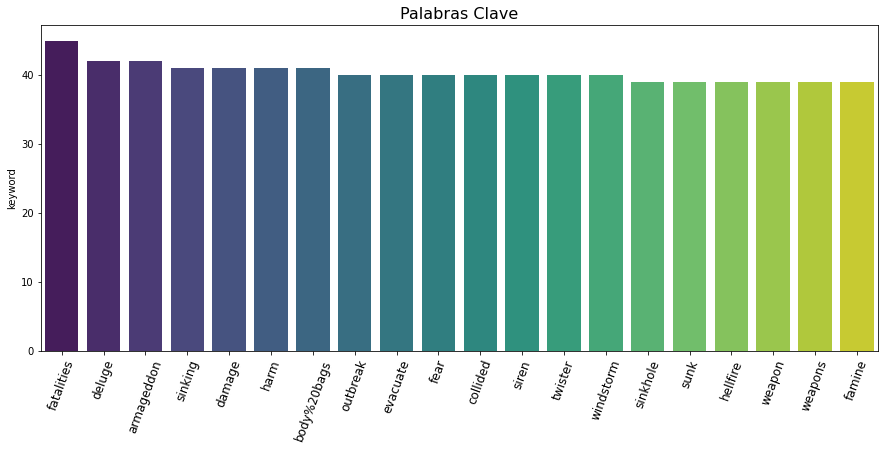

In [8]:
common_keywords=df["keyword"].value_counts()[:20].to_frame()
fig=plt.figure(figsize=(15,6))
sn.barplot(data=common_keywords,x=common_keywords.index,y="keyword",palette="viridis")
plt.title("Palabras Clave",size=16)
plt.xticks(rotation=70,size=12);

### ¿Qué   palabras   cree   que   le   servirán   para   hacer   un   mejor   modelo   de clasificación?

Observando las gráficas, las palabras clave más comunes son las presentes por lo que cada una de estas podria utilizarse para poder detectar un desastre natural de forma más fácil. Ya que muchas de estas comunmente se utilizan durante desastres, tales como fatalidad, daño, miedo, sirenas, cuerpos en bolsa, entre otras.

### Diagrama donde se mencione un DESASTRE

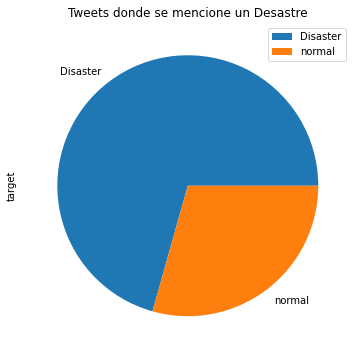

In [9]:
df[df.text.str.contains("disaster")].target.\
 value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
  plot.pie(y="target",figsize=(12,6),title="Tweets donde se mencione un Desastre");

### ¿Vale la pena explorar bigramas o trigramas para analizar contexto?

En este caso el analizar bigramas o trigramas, podremos interpretar más rápido un tweet donde se haga referencia a algun desastre.
El problema de analizar bigramas o trigramas es que omitiremos muchas palabras clave de nuestro listado por lo que seguramente
omitiremos casos de desastre, ya que en el bigrama/trigrama no se encontrarí

# 5) Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis

Investigar qué palabra se repite más en cada una de las categorías

In [10]:
wc = df[['keyword', 'cleaned_text']].dropna()
wc.head()

keyword                                       cleaned_text
31  ablaze                   bbcmtd wholesale markets ablaze 
32  ablaze                we always try bring heavy metal rt 
33  ablaze  africanbaze breaking newsnigeria flag set abla...
34  ablaze                      crying out more set me ablaze
35  ablaze  on plus side look at sky last night it was abl...

Agrupar por categoría y combinar los textos que pertenecen a la misma

In [11]:
wc['cleaned_text'] = wc.groupby('keyword')['cleaned_text'].transform(lambda x : ' '.join(x))
wc = wc.drop_duplicates()  
wc.head()

keyword                                       cleaned_text
31                ablaze  bbcmtd wholesale markets ablaze  we always try...
67              accident  i cant have kids cuz i got in a bicycle accide...
102           aftershock  aftershockdelo scuf ps live game cya the man w...
136  airplane%20accident  experts in france begin examining airplane deb...
171            ambulance  early wake up call from my sister begging me c...

C:\Users\Joseph\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


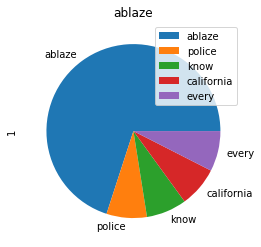

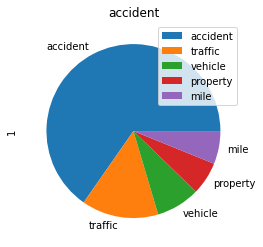

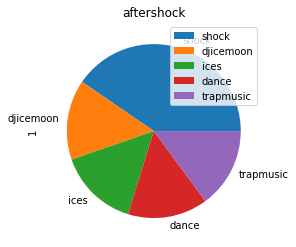

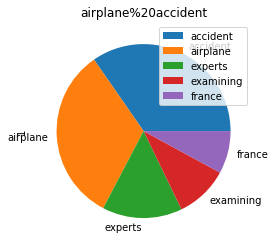

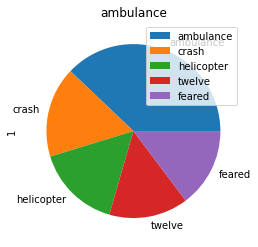

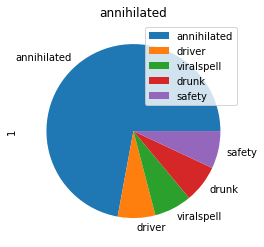

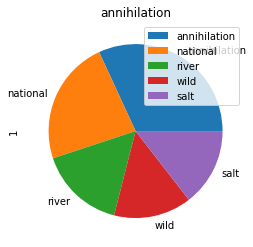

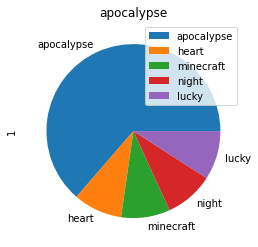

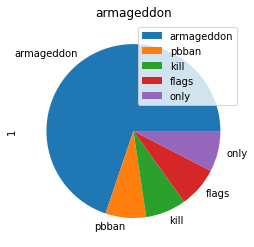

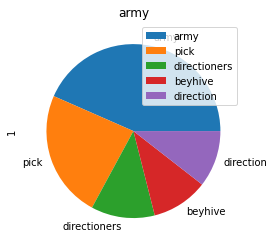

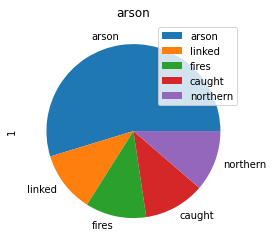

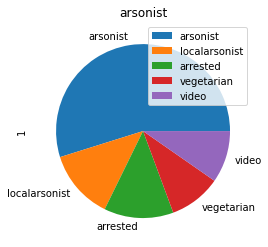

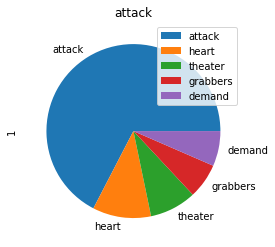

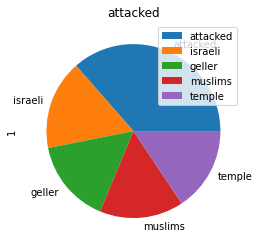

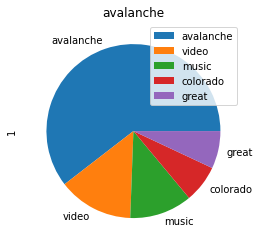

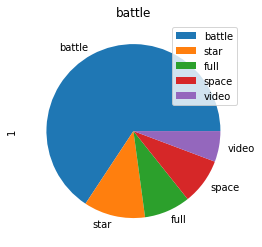

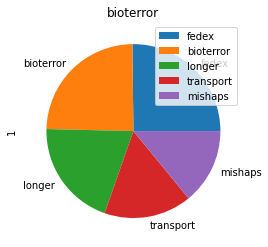

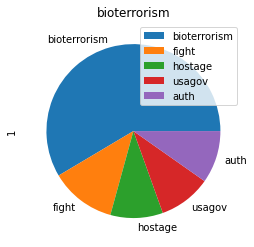

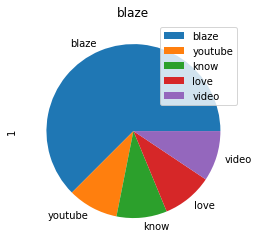

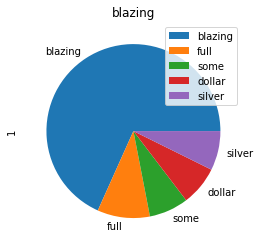

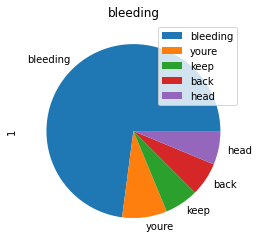

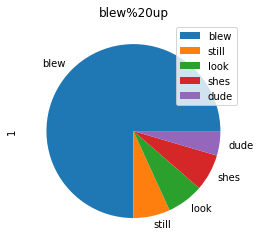

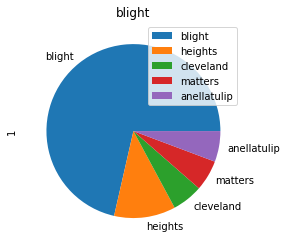

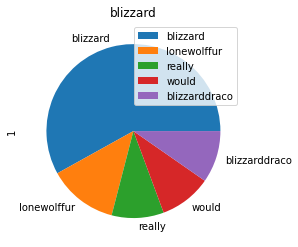

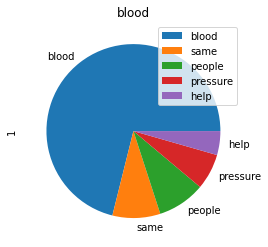

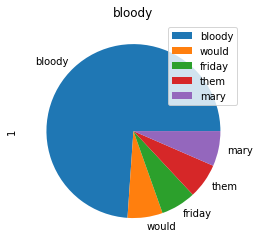

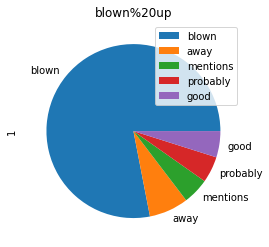

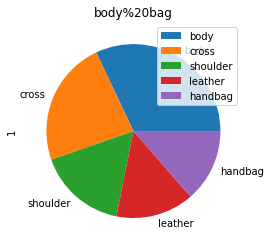

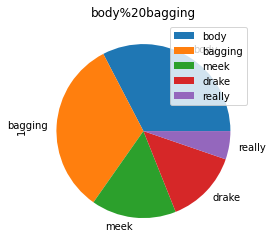

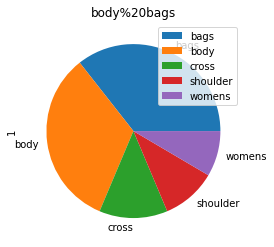

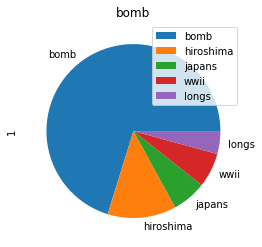

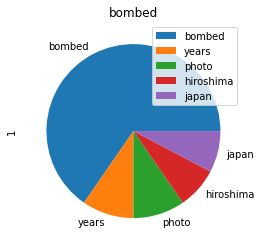

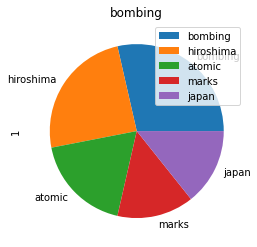

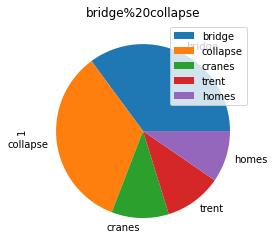

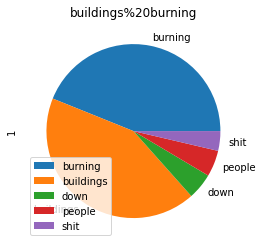

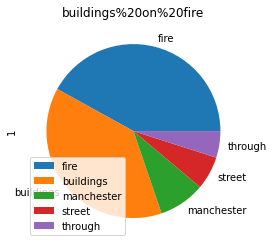

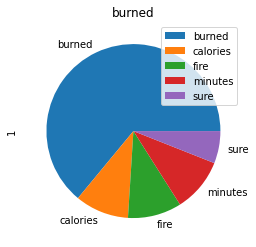

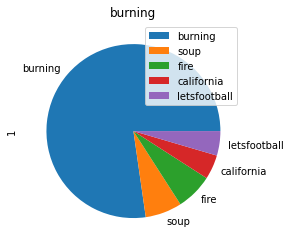

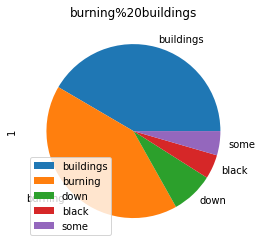

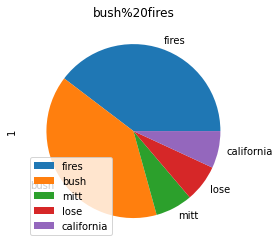

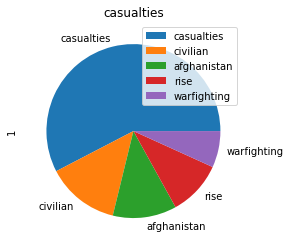

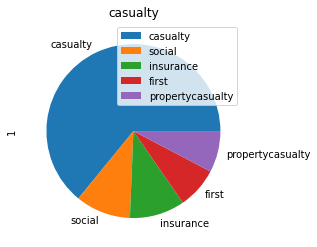

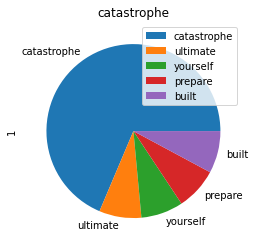

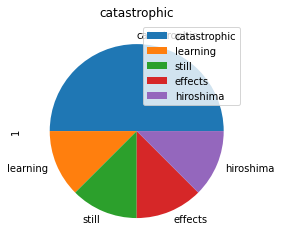

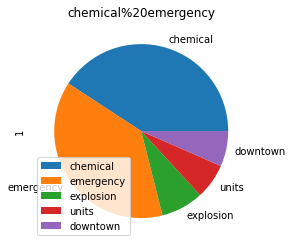

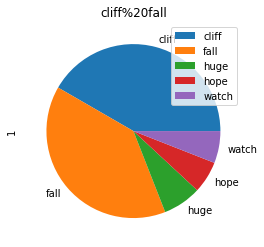

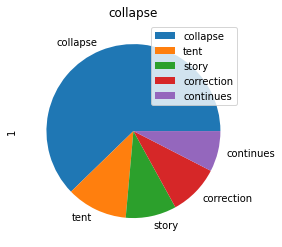

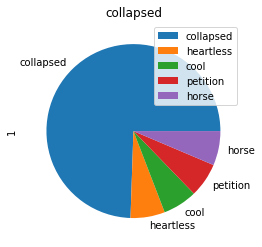

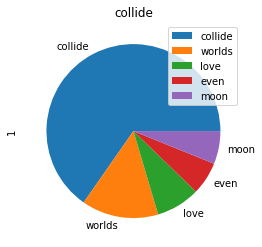

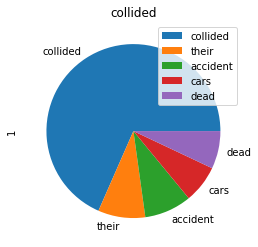

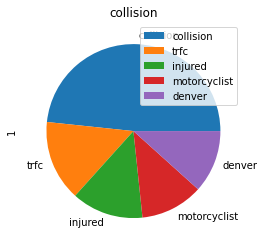

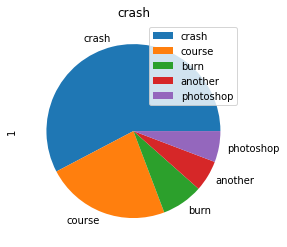

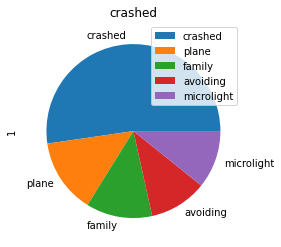

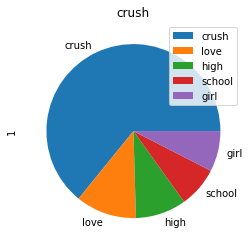

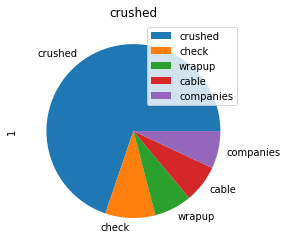

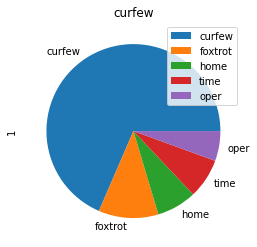

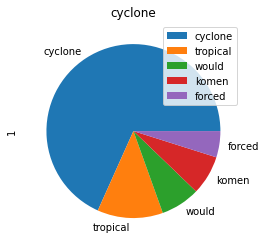

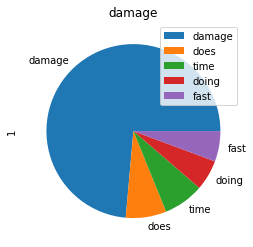

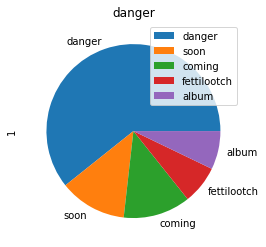

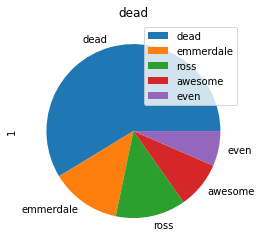

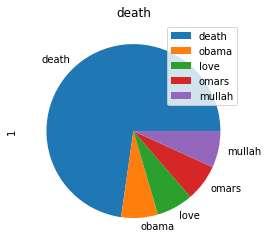

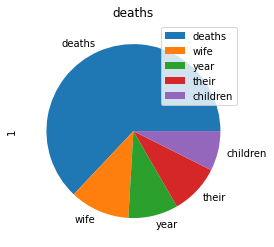

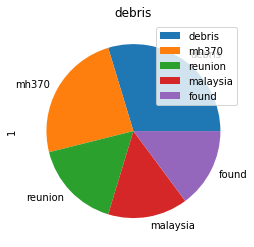

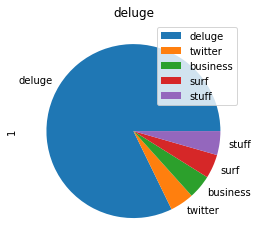

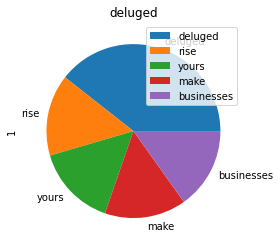

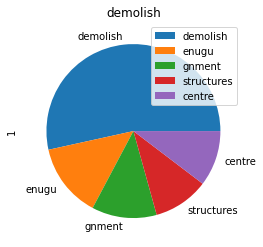

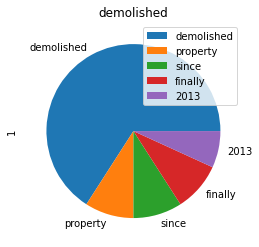

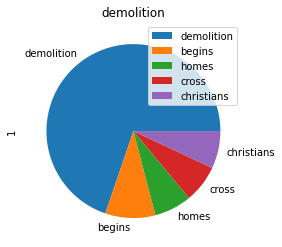

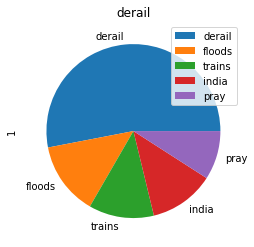

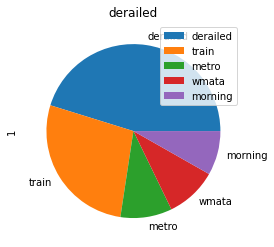

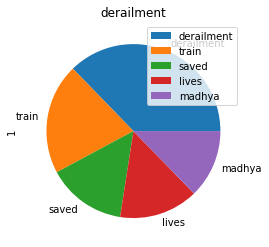

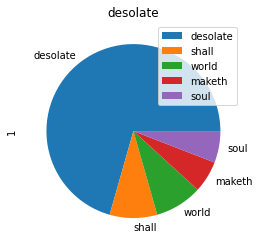

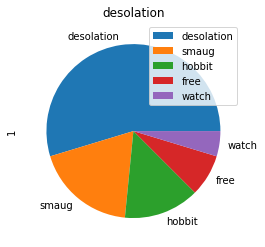

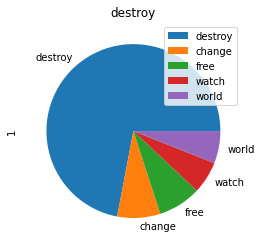

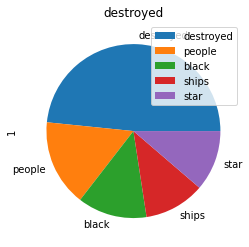

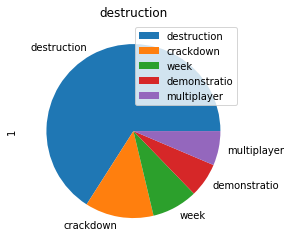

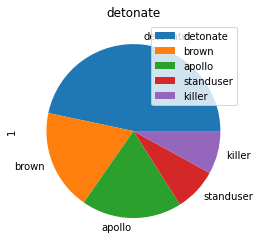

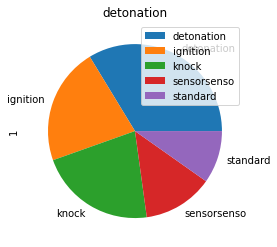

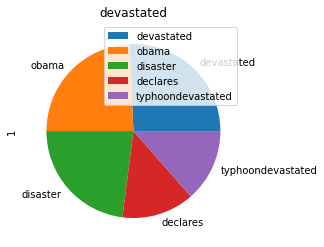

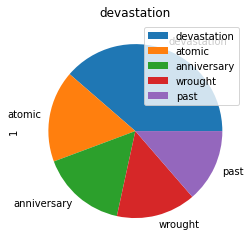

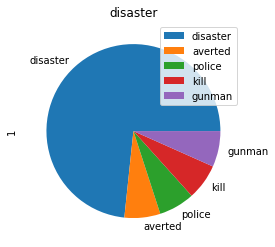

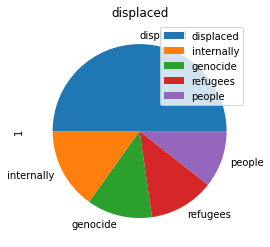

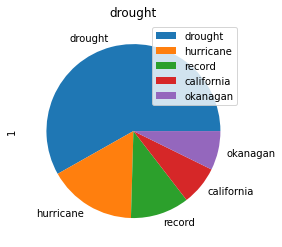

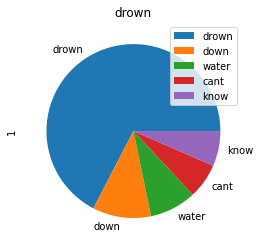

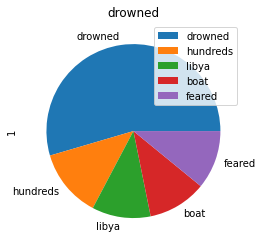

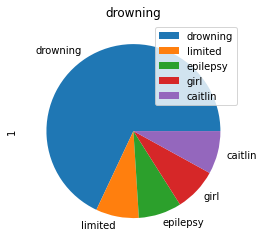

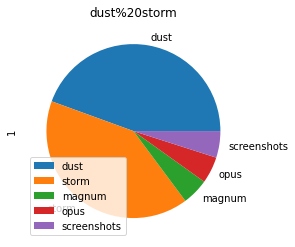

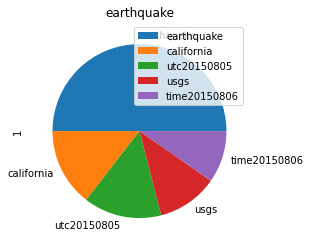

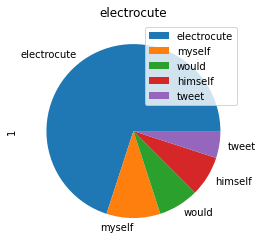

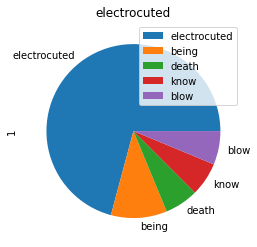

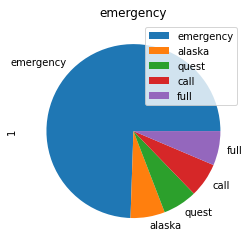

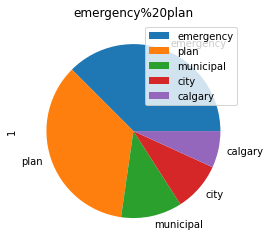

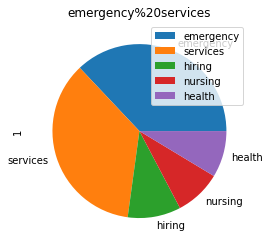

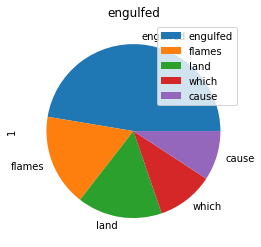

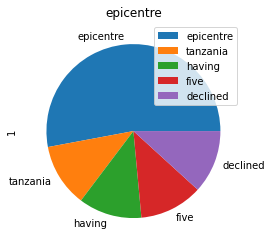

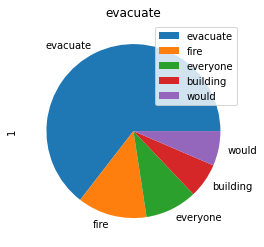

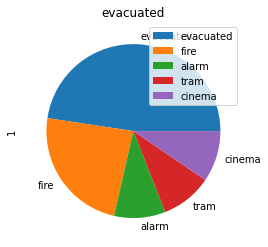

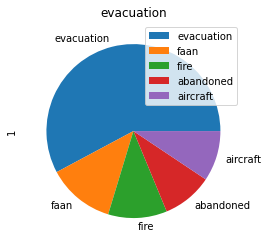

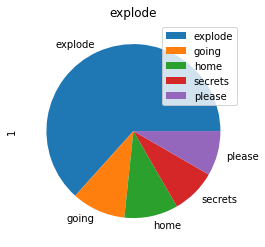

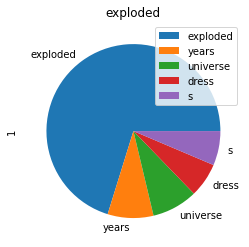

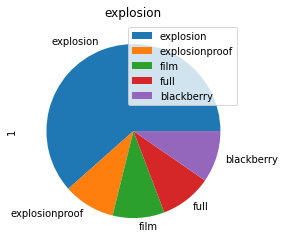

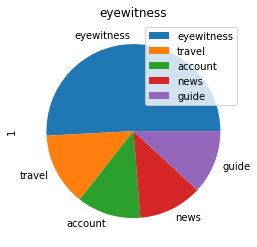

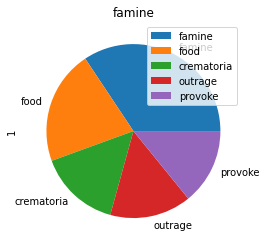

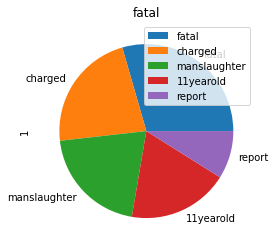

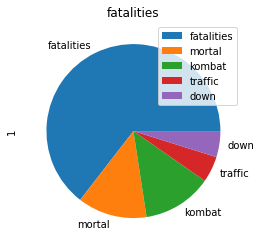

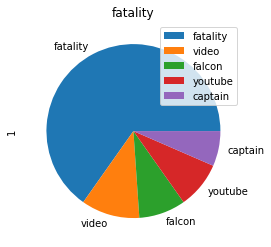

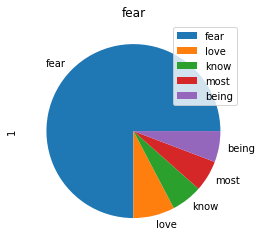

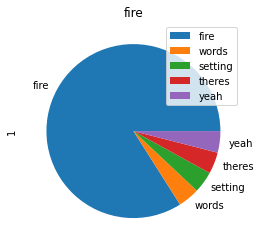

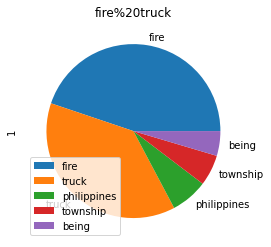

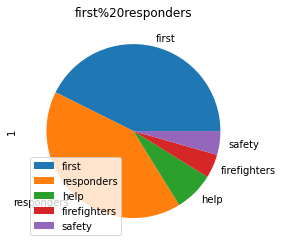

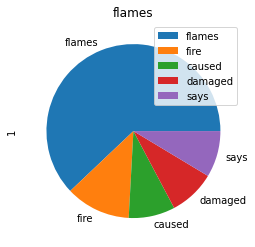

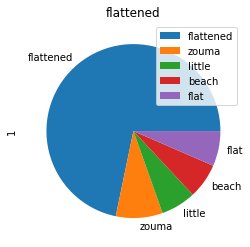

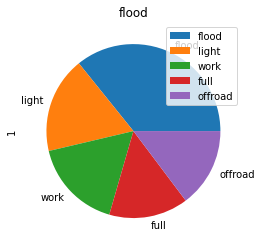

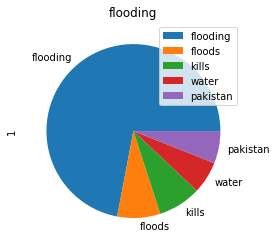

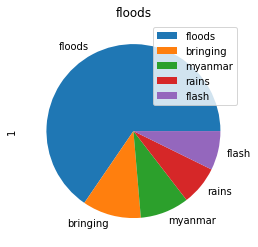

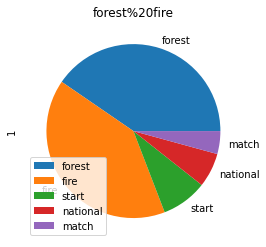

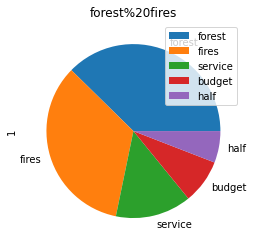

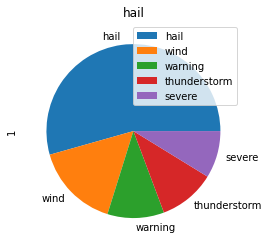

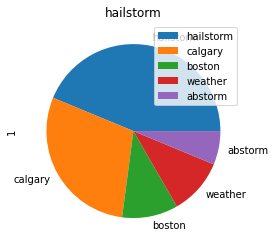

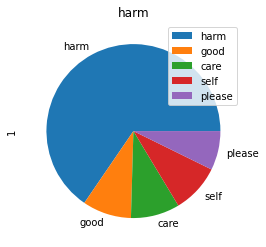

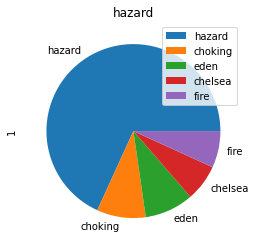

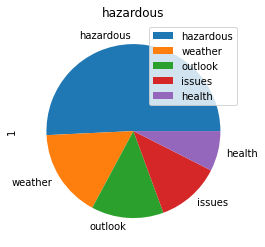

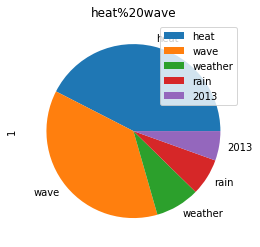

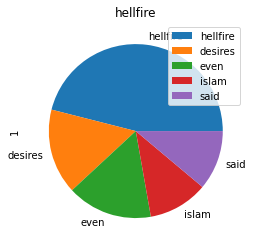

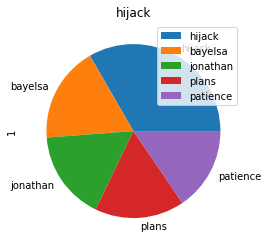

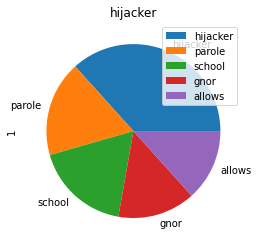

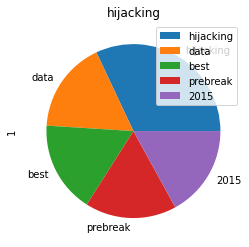

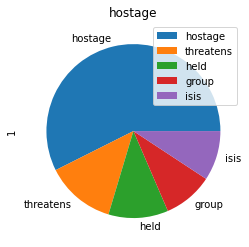

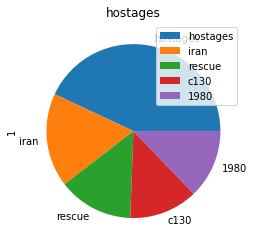

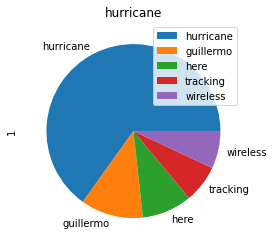

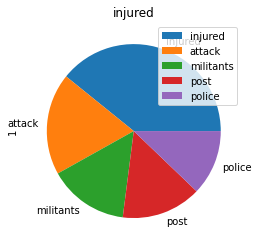

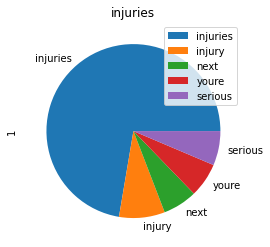

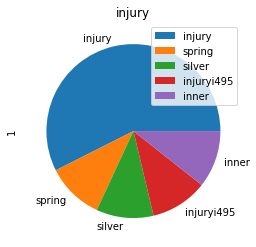

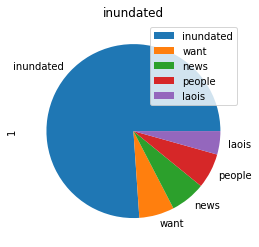

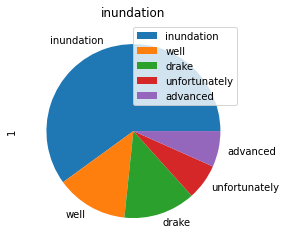

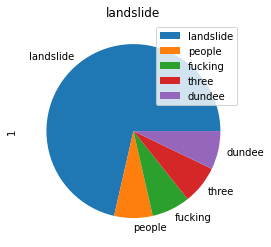

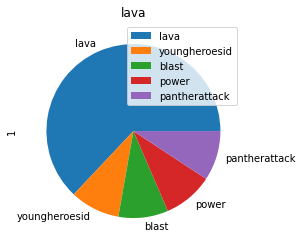

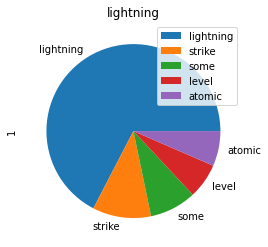

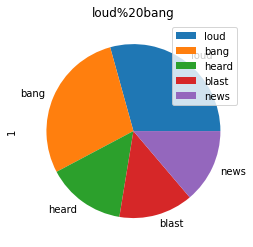

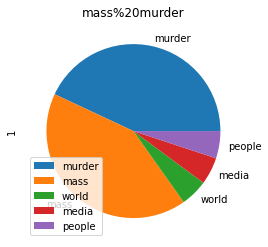

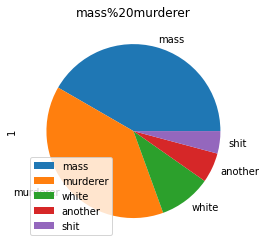

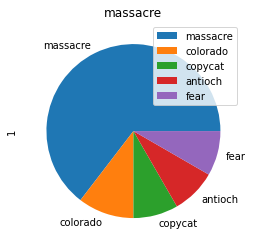

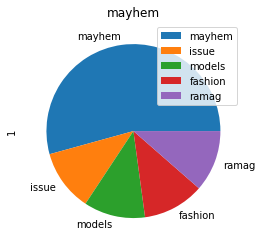

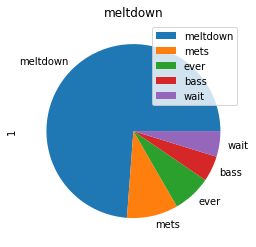

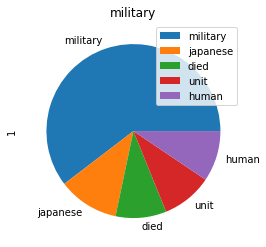

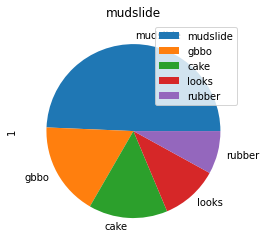

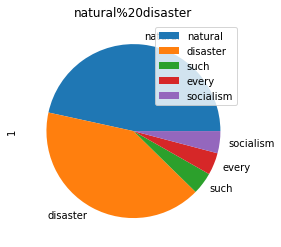

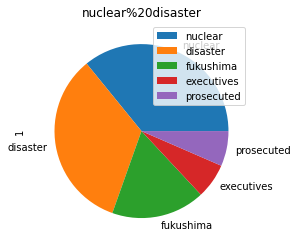

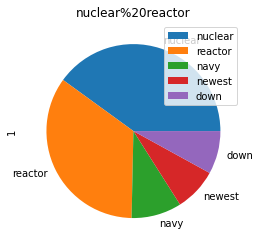

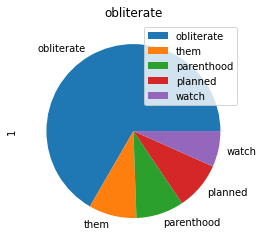

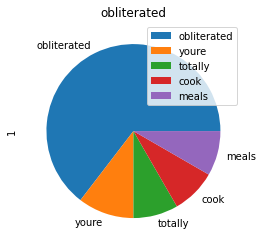

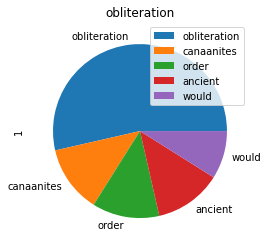

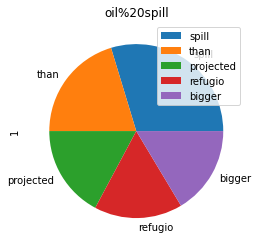

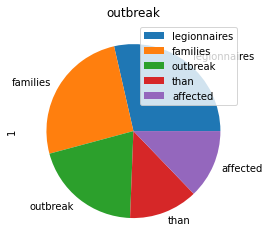

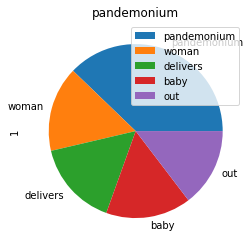

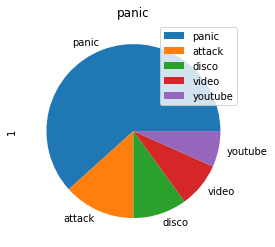

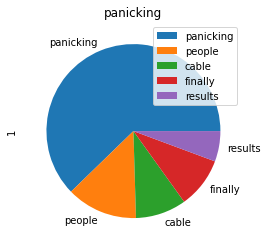

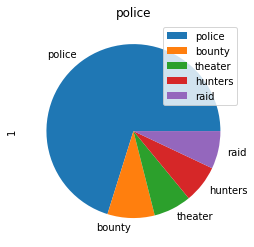

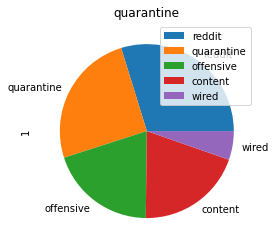

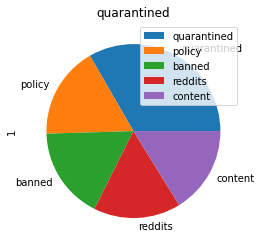

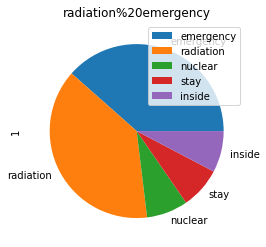

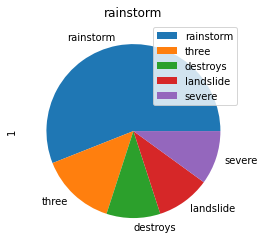

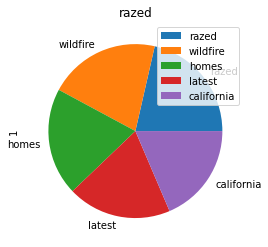

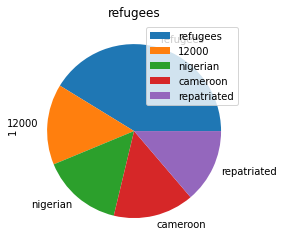

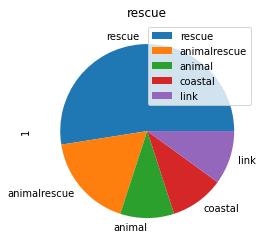

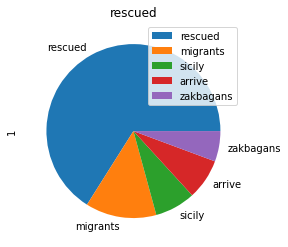

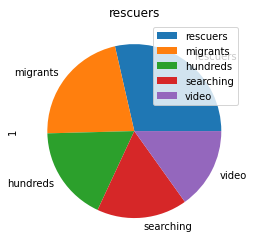

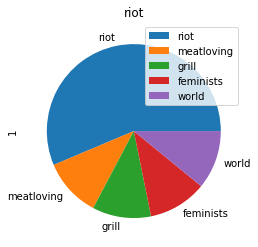

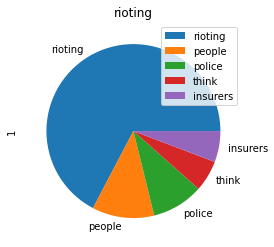

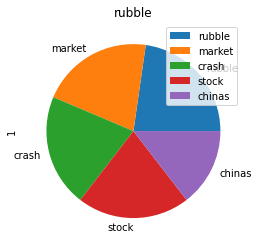

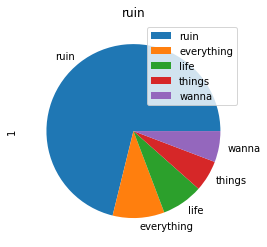

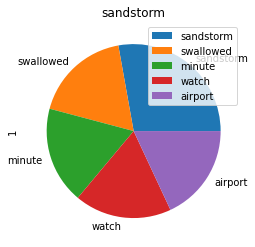

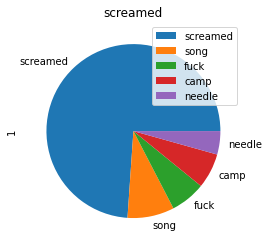

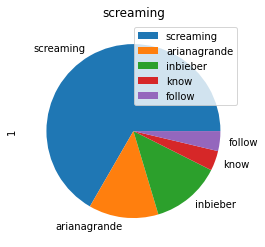

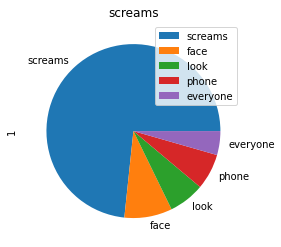

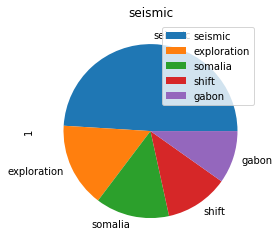

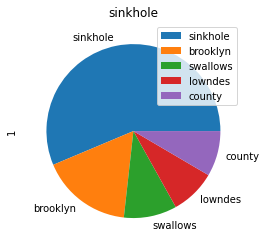

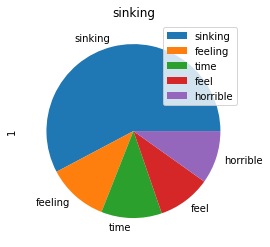

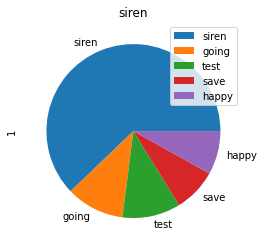

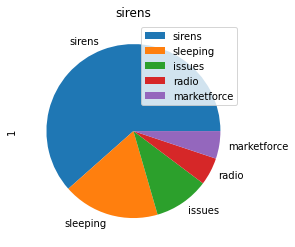

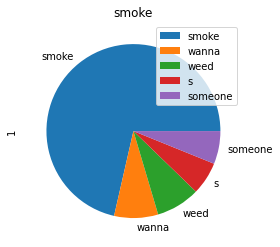

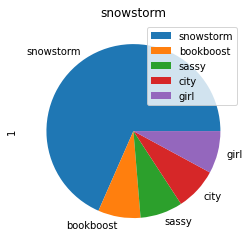

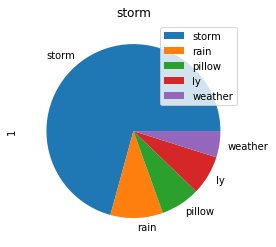

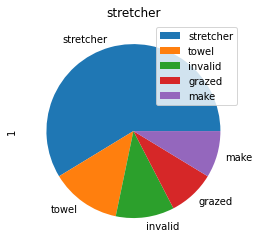

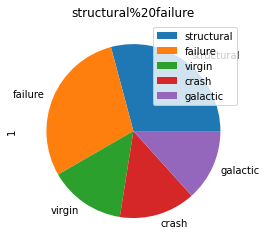

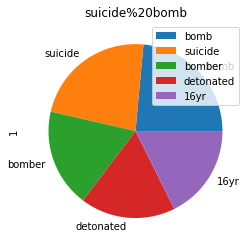

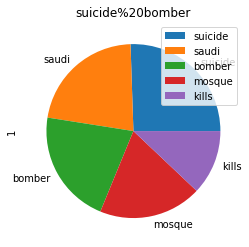

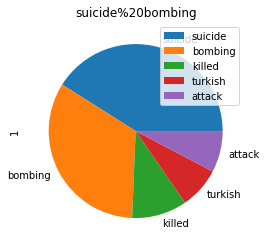

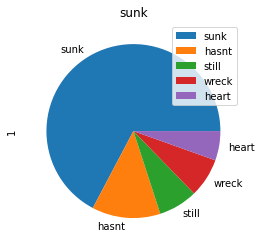

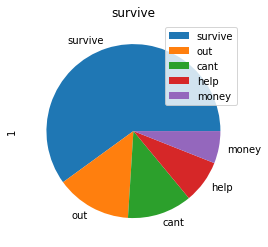

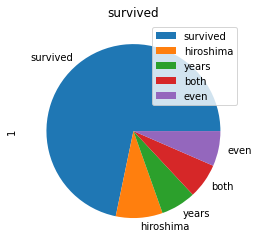

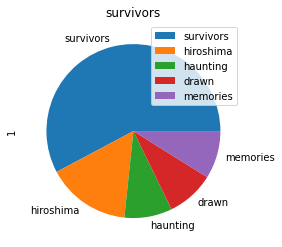

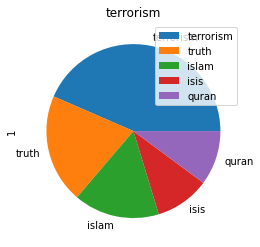

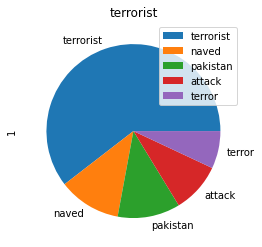

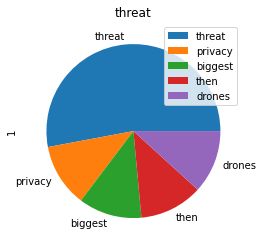

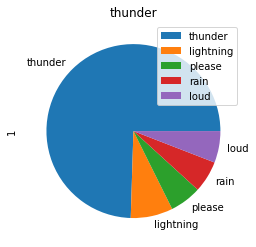

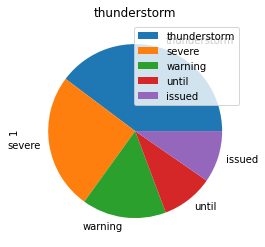

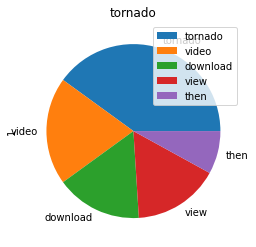

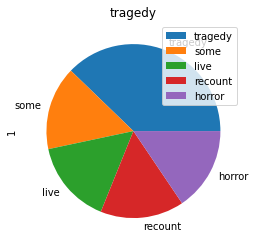

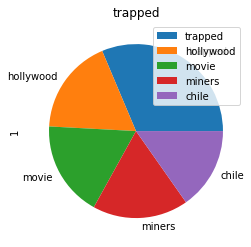

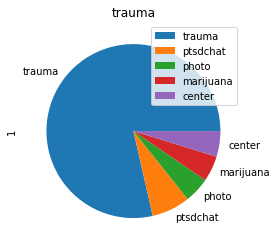

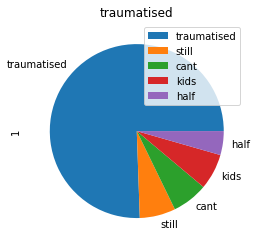

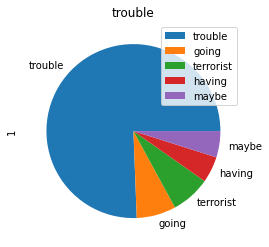

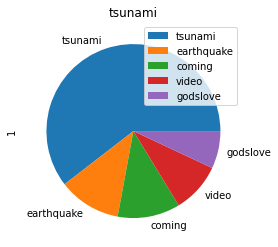

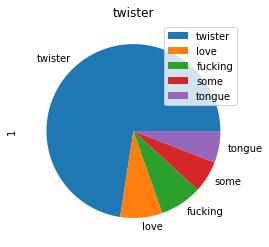

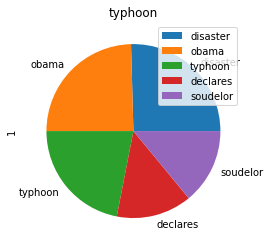

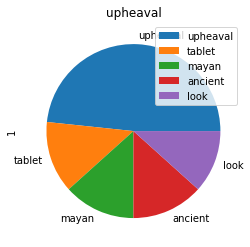

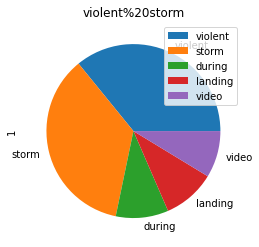

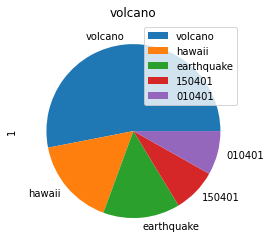

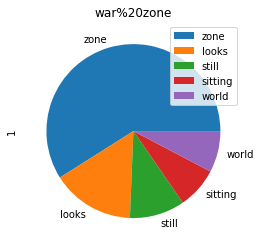

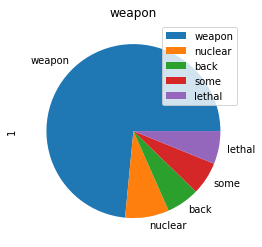

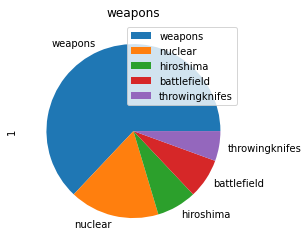

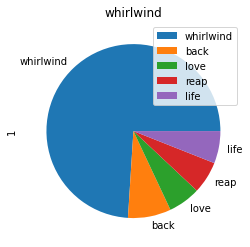

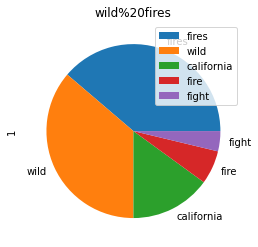

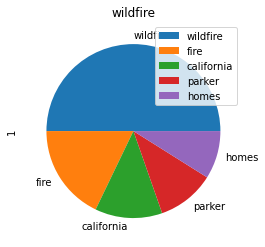

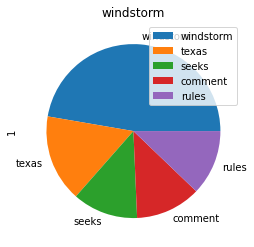

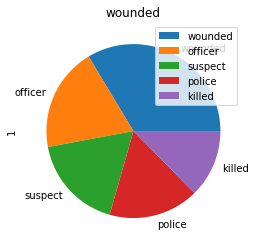

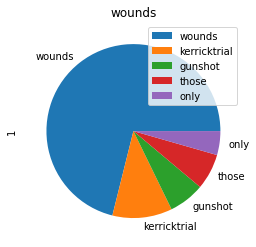

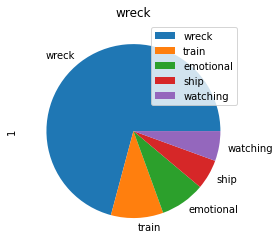

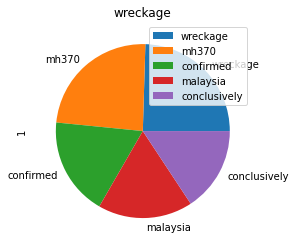

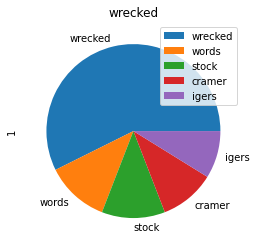

In [12]:
for index, row in wc.iterrows():
    words = ' '.join(word for word in row['cleaned_text'].split() if len(word)>3).replace('that', '').replace('with', '').replace('will', '').replace('they', '').replace('this', '').replace('were', '').replace('these', '').replace('have', '').replace('just', '').replace('like', '').replace('more', '').replace('about', '').replace('after', '').replace('from', '').replace('what', '').replace('been', '').replace('dont', '').replace('into', '').replace('over', '')
    palabra, cantidad = freq(words, prnt=False)
    freqs = {palabra[i]: cantidad[i] for i in range(len(palabra))}
    fdf = pd.DataFrame(freqs.items())
    fdf = fdf.sort_values(1, ascending=False).head().set_index(0)
    fdf.plot.pie(y=1, title=row['keyword'])

Palabras más repetidas en todas las categorías

<AxesSubplot:ylabel='1'>

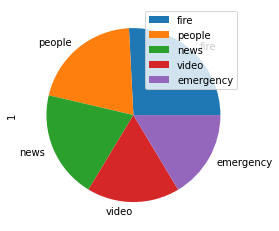

In [13]:
words = ''
for index, row in wc.iterrows():
    words +=' '.join(word for word in row['cleaned_text'].split() if len(word)>3).replace('that', '').replace('with', '').replace('will', '').replace('they', '').replace('this', '').replace('were', '').replace('these', '').replace('have', '').replace('just', '').replace('like', '').replace('more', '').replace('about', '').replace('after', '').replace('from', '').replace('what', '').replace('been', '').replace('dont', '').replace('into', '').replace('over', '')

palabra, cantidad = freq(words, prnt=False)
freqs = {palabra[i]: cantidad[i] for i in range(len(palabra))}
fdf = pd.DataFrame(freqs.items())
fdf = fdf.sort_values(1, ascending=False).head().set_index(0)
fdf.plot.pie(y=1)

# 6) Teniendo en cuenta la cantidad de palabras positivas y negativas del tweet determine qué tan positivo, negativo o neutral es el mismo.

In [38]:
tweets = list(df.iloc[:,5])

for tweet in tweets:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(tweet)
    print(tweet)
    print('Positivo', round(float(ss['pos'])*100, 2), " | ", 'Negativo', round(float(ss['neg'])*100, 2), " | ", 'Neutral', round(float(ss['neu'])*100, 2))
    print('\n')


 deeds are reason this earthquake may allah forgive us all
Positivo 18.9  |  Negativo 0.0  |  Neutral 81.1


forest fire near la ronge sask canada
Positivo 0.0  |  Negativo 28.6  |  Neutral 71.4


all residents asked shelter in place are being notified officers no other evacuation or shelter in place orders are expected
Positivo 0.0  |  Negativo 10.4  |  Neutral 89.6


13,000 people receive wildfires evacuation orders in california 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


just got sent this photo from ruby alaska as smoke from wildfires pours into a school 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


rockyfire update california hwy 20 closed in both directions due lake county fire cafire wildfires
Positivo 0.0  |  Negativo 14.6  |  Neutral 85.4


flood disaster heavy rain causes flash flooding streets in manitou, colorado springs areas
Positivo 0.0  |  Negativo 25.5  |  Neutral 74.5


im on top hill i can see a fire in woods
Positivo 16.1  |  Negativo 21.4  |  Neutral 6

truckcrash overturns on fortworth interstate click here youve been in a crash 
Positivo 0.0  |  Negativo 21.3  |  Neutral 78.7


accident in ashville on us 23 sb sr 752 traffic 
Positivo 0.0  |  Negativo 25.6  |  Neutral 74.4


carolina accident motorcyclist dies in i540 crash with car that crossed median a motorcycle rider traveling 
Positivo 0.0  |  Negativo 30.9  |  Neutral 69.1


fyi cadfyi accident property damagenhs999 piner rdhorndale dr
Positivo 16.5  |  Negativo 28.4  |  Neutral 55.0


rt naayf first accident in years turning onto chandanee magu from near mma taxi rammed into me i was halfway turned everyone conf 
Positivo 0.0  |  Negativo 12.9  |  Neutral 87.1


accident left lane blocked in manchester on rt 293 nb eddy rd stop go traffic back nh3a delay 4 mins traffic
Positivo 0.0  |  Negativo 37.7  |  Neutral 62.3


accident property damage piner rdhorndale dr
Positivo 0.0  |  Negativo 61.2  |  Neutral 38.8


 it was an accident 
Positivo 0.0  |  Negativo 50.8  |  Neutral 4

horrible accident man died in wings airplane 29072015 
Positivo 0.0  |  Negativo 67.1  |  Neutral 32.9


usama bin ladins family dead in airplane crash naturally no accident
Positivo 0.0  |  Negativo 63.7  |  Neutral 36.3


pilot dies in plane crash at car festival via youtube crash aircraft airplane pilot death accident carfest
Positivo 11.6  |  Negativo 44.9  |  Neutral 43.5


strict liability in context an airplane accident 
Positivo 0.0  |  Negativo 49.5  |  Neutral 50.5


dtn brazil experts in france begin examining airplane debris found on reunion island french air accident exp 
Positivo 0.0  |  Negativo 16.2  |  Neutral 83.8


experts in france begin examining airplane debris found on reunion island french air accident experts on wedn 
Positivo 0.0  |  Negativo 16.2  |  Neutral 83.8


horrible accident man died in wings airplane 29072015 wtf you can t believe y eyes 
Positivo 0.0  |  Negativo 60.9  |  Neutral 39.1


 nicole fletcher one a victim crashed airplane few times ago th

thatdes ok i wasnt completely forthright i may have also been in a food coma bc kebabtahinipickles i also annihilated wfries
Positivo 12.1  |  Negativo 0.0  |  Neutral 87.9


a fun filled happyh at simmons bar in camden with this handsome one i got annihilated apart from this game 
Positivo 30.6  |  Negativo 0.0  |  Neutral 69.4


juanny beisbol sr annihilated that ball lgm
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


rvfriedmann hell is just a fraction his belief total annihilation destruction usa lodisilverado ritzyjewels
Positivo 0.0  |  Negativo 43.0  |  Neutral 57.0


potus maybe we should call israel tell them were sorry are pres has sold them down river annihilation
Positivo 0.0  |  Negativo 7.1  |  Neutral 92.9


evildead annihilation civilization 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


us national park services tonto national forest stop annihilation salt river wild horse via change
Positivo 0.0  |  Negativo 13.6  |  Neutral 86.4


annihilating quarterstaff ann

aberdeenfc aberdeenfanpage good luck tomorrow night get some coefficient points plz armageddon
Positivo 44.4  |  Negativo 0.0  |  Neutral 55.6


paddytomlinson1 armageddon
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


rohnertparkdps youre another one history books thank justice department way i havent paid income tax in 20yrs
Positivo 29.6  |  Negativo 0.0  |  Neutral 70.4


vladimir putin issues major warning is it too late escape armageddon 
Positivo 13.0  |  Negativo 18.3  |  Neutral 68.7


gods kingdom heavenly govt will rule over all people on earth after armageddon 
Positivo 25.0  |  Negativo 0.0  |  Neutral 75.0


l b entertainment lot 8 brucewillis movies dvd die hard 1 2 12 monkeys armageddon sixth ebay auction 
Positivo 15.5  |  Negativo 29.3  |  Neutral 55.2


let s talk some more about y goof guild saunders come right up here on stage 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


karnythia my niece is gaining ability stand im getting prepared toddler apocalypse arm

kisii police in kisii hunt students over failed arson plot police in kisii hunt students countynews
Positivo 0.0  |  Negativo 18.0  |  Neutral 82.0


mourning notices stabbing arson victims stir politics grief in israel 
Positivo 0.0  |  Negativo 54.5  |  Neutral 45.5


owner chicagoarea gay bar admits arson scheme via theadvocatemag lgbt 
Positivo 19.6  |  Negativo 0.0  |  Neutral 80.4


owner chicagoarea gay bar admits arson scheme lgbt 
Positivo 23.9  |  Negativo 0.0  |  Neutral 76.1


mourning notices stabbing arson victims stir politics grief in israel 
Positivo 0.0  |  Negativo 54.5  |  Neutral 45.5


owner chicagoarea gay bar admits arson scheme lgbt
Positivo 23.9  |  Negativo 0.0  |  Neutral 76.1


arson suspect linked 30 fires caught in northern california via latimes
Positivo 0.0  |  Negativo 18.0  |  Neutral 82.0


tennessee lesbian couple faked hate crime destroyed own home with arson lesbian
Positivo 0.0  |  Negativo 53.6  |  Neutral 46.4


arson suspect linked 30 fires ca

infowars nashville theater attack will gun grabbers now demand hatchet control nwo
Positivo 0.0  |  Negativo 43.8  |  Neutral 56.2


anxiety attack 
Positivo 0.0  |  Negativo 100.0  |  Neutral 0.0


my dog attacked me my food pugprobs
Positivo 0.0  |  Negativo 33.3  |  Neutral 66.7


cop injured in gunfight as militants attack udhampur police post suspected militants attacked a police post i 
Positivo 0.0  |  Negativo 49.3  |  Neutral 50.7


envw98 nickcocofree juliedicaro jdabe80 i asked how did he feel attacked julie i asked he was frail that is all
Positivo 0.0  |  Negativo 15.0  |  Neutral 85.0


messeymetoo i feel attacked
Positivo 0.0  |  Negativo 60.0  |  Neutral 40.0


im feeling attacked 
Positivo 27.3  |  Negativo 54.5  |  Neutral 18.2


once again black men didnt make it that way white men did why are black men getting attacked 
Positivo 0.0  |  Negativo 15.0  |  Neutral 85.0


i cant believe a fucking cis female is going somehow claim be offended over a transgendered female

tb throwback you want a battle heres a war 
Positivo 11.0  |  Negativo 55.1  |  Neutral 33.9


kelby tomlinson mildmannered 2nd baseman a great metropolitan team fights a neverending battle hits rbi sfgiants way
Positivo 19.2  |  Negativo 24.8  |  Neutral 56.1


black eye 9 a space battle occurred at star m27329 involving 1 fleets totaling 1236 ships with 7 destroyed
Positivo 0.0  |  Negativo 30.9  |  Neutral 69.1


what really happened in taken king story trailer a space battle that ripped a hole in saturn eytay neur0sis 
Positivo 0.0  |  Negativo 14.0  |  Neutral 86.0


these after battle animations are fucking much
Positivo 0.0  |  Negativo 30.2  |  Neutral 69.8


see what happens with no battle block cbsbigbrother finally
Positivo 0.0  |  Negativo 56.2  |  Neutral 43.8


du19 who gon get in this rap battle with me
Positivo 0.0  |  Negativo 22.4  |  Neutral 77.6


do y own thing battle internal vs external motivation 
Positivo 21.8  |  Negativo 23.6  |  Neutral 54.5


check out this

cspanwj 90blks 8whts colluded 2 take wht f usagov auth hostage 2 make her look blk wbioterrorism use her lglorg idis id still hers
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


onufrance 7475 bioterrorism on rockefellerchirockefellerunivheiress 2 evade lgl efforts 2 prosecute blks 4 harvardu kidnapgafp
Positivo 0.0  |  Negativo 19.7  |  Neutral 80.3


the irandeal only covers nuclear activity what are they doing about bioterrorism iran has broken at least 27 other agreements
Positivo 9.1  |  Negativo 13.4  |  Neutral 77.6


the threat anthrax cdc via cdcgov
Positivo 0.0  |  Negativo 40.5  |  Neutral 59.5


bioterrorism authorities allay glanders fears ahead rio olympic equestrian test event via horsetalknz
Positivo 0.0  |  Negativo 18.9  |  Neutral 81.1


kaotixblaze craving u
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


ive been pool all day raisinfingers
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


do you know anyone looking move hammond or share this listing 
Positivo 

apparently youre bleeding people look at you weird lol well its fine keep walking
Positivo 36.4  |  Negativo 9.2  |  Neutral 54.3


eating takis then rubbing my eyes with my hands now my eyes are bleeding tears
Positivo 0.0  |  Negativo 11.9  |  Neutral 88.1


darrylb1979 yea heard about thatnot coming out until 2017 2019 vampiro is bleeding
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


coreyashe did that look broken or bleeding
Positivo 0.0  |  Negativo 34.1  |  Neutral 65.9


i hit my foot now my toe is bleeding 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


kingnaruto as long as i see madara bleeding im good 
Positivo 26.6  |  Negativo 0.0  |  Neutral 73.4


keep thinking about it until i stepped on a broken glass pun tak sedar i dont feel pain also its bleeding shit
Positivo 10.6  |  Negativo 26.4  |  Neutral 63.0


my ears are bleeding 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


i waited 25 hours get a cab my feet are bleeding
Positivo 0.0  |  Negativo 0.0  |  Neutr

sexual revolutionblight women is out stories via acebabes healthweekly1 amateurnester
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


like i swear secret well uncover is old gods in a slumber i think theres gonna be another blight
Positivo 24.5  |  Negativo 6.4  |  Neutral 69.1


willhillbet what is double result live on app
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


parksboardfacts first off it is zippoline as no one wants use it community never asked this blight on park moveit
Positivo 0.0  |  Negativo 10.4  |  Neutral 89.6


look my policy matters ohio report on cle cuyahoga county blight greening vacant lands soon 
Positivo 7.3  |  Negativo 0.0  |  Neutral 92.7


anellatulip put taint that all that magisters did was open gates let blight get away from it
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


anellatulip is a theory that makes way too much sense that says that dwarves may be actual origin blight
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


the palestinian r

gotta try let go many bloody things smh
Positivo 0.0  |  Negativo 46.4  |  Neutral 53.6


tradcatknight 1 russia may have played into reason that link is bs okanowa was bloody mainline invasion looked like a bloody
Positivo 19.1  |  Negativo 22.6  |  Neutral 58.4


bloody insomnia again grrrr insomnia
Positivo 0.0  |  Negativo 42.0  |  Neutral 58.0


zhenghxn i tried 11 eyes akame ga kill tokyo ghoul all damn bloody i dont dare watch
Positivo 0.0  |  Negativo 46.2  |  Neutral 53.8


fantosex now suck it up thats all youre bloody getting out me means amends
Positivo 0.0  |  Negativo 32.6  |  Neutral 67.4


you call them weekends i call them bloody mary times this summers been full them my new 
Positivo 0.0  |  Negativo 16.2  |  Neutral 83.8


bloody hell what a day i havent even really done anything just tired everything thought vaca would help it only did much 
Positivo 9.3  |  Negativo 35.7  |  Neutral 55.0


damn bloody hot
Positivo 0.0  |  Negativo 84.8  |  Neutral 15.2


mrtophypup

new ladies shoulder tote handbag faux leather hobo purse cross body bag womens full read 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


auth louis vuitton brown saumur 35 cross body shoulder bag monogram 723 4193 full read 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


check out vintage longaberger floral fabric shoulder cross body bag brown leather strap ebay
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 new ladies shoulder tote handbag faux leather hobo purse cross body bag womens 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


new summer long thin body bag hip a word skirt blue 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


ìü new ladies shoulder tote handbag faux leather hobo purse cross body bag womens rt en 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


louis vuitton monogram sophie limited edition clutch cross body bag full read ebay 
Positivo 0.0  |  Negativo 13.7  |  Neutral 86.3


new women handbag faux leather ladies shoulder tote cross body bag large

limpar33 sweeping legs or putting people in body bags
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


shoot shit up till we see body bags
Positivo 0.0  |  Negativo 50.0  |  Neutral 50.0


y body will heal bags under y eyes will go away you ll be happy you ll smile really 
Positivo 29.2  |  Negativo 0.0  |  Neutral 70.8


womens handbags cross body geometric pattern satchel totes shoulder bags white rt gasparc 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


women messenger bags clutch bag handbag cross body shoulder bags bag ladies designer handbags high qualit 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


womens handbags cross body geometric pattern satchel totes shoulder bags white 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


status last seen buying body bags
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


asymbina tithenai im hampered only liking crossbody bags i really like ella vickers bags machine washable 
Positivo 29.7  |  Negativo 0.0  |  Neutral 70.3


zicac 

the cryptic words that guided pilots on hiroshima bombing mission 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


70th anniversary hiroshima atomic bombing marked 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


japan marks 70th anniversary hiroshima atomic bombing 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


japan marks 70th anniversary hiroshima atomic bombing 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


japan marks 70th anniversary hiroshima atomic bombing 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


japan marks 70th anniversary hiroshima atomic bombing 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


rinkydnk2 zaibatsunews neoprogressive1 push2left talkecology human rts democracy war afghetcleft humanitarian bombing
Positivo 0.0  |  Negativo 26.2  |  Neutral 73.8


hiroshima bombing justified majority americans even today hindustan times 
Positivo 25.2  |  Negativo 0.0  |  Neutral 74.8


snapharmony bells toll in hiroshima as japan marks 70 years since atom

rockbottomradfm is one challenges on tough enough rescuing people from burning buildings
Positivo 10.2  |  Negativo 11.7  |  Neutral 78.1


saving babies from burning buildings soaking cake in a shit tonne alcohol mat is a man after my own heart gbbo
Positivo 0.0  |  Negativo 16.7  |  Neutral 83.3


ppfa at least they arent burning buildings looting stores
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


witness video shows car explode behind burning buildings on 2nd st this afternoon manchester via mikecroninwmur
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


watching xela firefighters struggle save burning buildings last night w old equipment makes me grateful dcfd chr3lyc iaff36
Positivo 27.6  |  Negativo 10.2  |  Neutral 62.2


 croydon riots next day burning buildings in high street crowds at reeves corner croydonization august 2011
Positivo 0.0  |  Negativo 18.0  |  Neutral 82.0


fire hazard associated with installation noncompliant external cladding on wwwcbplawyers
Positiv

we will be burning up like neon lights
Positivo 26.3  |  Negativo 0.0  |  Neutral 73.7


dont be modest you certainly sniff sniiiiiiff er donny is something burning
Positivo 17.9  |  Negativo 0.0  |  Neutral 82.1


the burning legion has returned 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


the bar method ó integrates fat burning format interval training muscle shaping techniqu 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 youre bored with life you dont get up every morning with a burning desire do things you dont have enough goals lou holtz
Positivo 10.9  |  Negativo 8.5  |  Neutral 80.6


my hand is burning
Positivo 51.6  |  Negativo 0.0  |  Neutral 48.4


uhhhhh demon hunters not whole burning crusade v 20 thing 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


now playing boat club memories on london burning web radio 
Positivo 16.7  |  Negativo 0.0  |  Neutral 83.3


nagelashley vicken52 basedlarock goonc1ty rip world its burning
Positivo 0.0  |  Negativo 0.0  |  Neut

california bush fires please evacuate affected areas asap california govts advised you do 
Positivo 15.4  |  Negativo 10.7  |  Neutral 73.8


ted cruz fires back at jeb bush we lose republicans like jeb mitt video 
Positivo 14.5  |  Negativo 15.7  |  Neutral 69.8


the bush fires in ca are crazy
Positivo 0.0  |  Negativo 28.6  |  Neutral 71.4


that triumphant moment you cook up two eggs over easy with no yolk casualties 
Positivo 32.3  |  Negativo 11.3  |  Neutral 56.4


 warfighting robots could reduce civilian casualties calling a ban now is premature ieee spectrum 
Positivo 0.0  |  Negativo 23.1  |  Neutral 76.9


another movie theater attackclose home this time thankful no casualties life will go on we cannot allow evil win
Positivo 25.6  |  Negativo 24.6  |  Neutral 49.7


civilian casualties rise as afghan war intensifies in 2015 
Positivo 0.0  |  Negativo 32.8  |  Neutral 67.2


afghan conflict sees sharp rise in female casualties 
Positivo 0.0  |  Negativo 24.7  |  Neutral 75.

not a catastrophe at all im perfectly content being only one means nothing im being controlled text me you got crap say
Positivo 27.2  |  Negativo 9.2  |  Neutral 63.6


masochisticmage catastrophe it caused people get reckless bottom line is that at least three y friends will have 
Positivo 12.8  |  Negativo 29.3  |  Neutral 57.9


i had 2 regular coffees a rockstar coffee today im still tired
Positivo 0.0  |  Negativo 26.6  |  Neutral 73.4


alaskas wolves face catastrophe denali wolves population plummeted 48 savedenaliwolves tweetstorm 
Positivo 0.0  |  Negativo 30.6  |  Neutral 69.4


markargent i havent watched that one just finished catastrophe which is amazing
Positivo 22.1  |  Negativo 25.6  |  Neutral 52.3


bbc r5live studio discussion hiroshima v poor sheer luck cold war did not result in catastrophe mad red herring scraptrident
Positivo 21.2  |  Negativo 33.2  |  Neutral 45.6


human history becomes more more a race between education catastrophe
Positivo 0.0  |  Negativo 3

do me a favor fall off a cliff
Positivo 35.1  |  Negativo 0.0  |  Neutral 64.9


alexjacobsonpfs all andre gore have do is not fall off cliff were elite on that side ball
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


fall off a cliff please 
Positivo 43.4  |  Negativo 0.0  |  Neutral 56.6


i hope they fall off a cliff
Positivo 42.0  |  Negativo 0.0  |  Neutral 58.0


dont let y style fall flat this summer lord cliff thinkpink magichairbump is y answer adding this 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 youre in deep sleep then you dream youre bout fall off a cliff then wake up struggling keep a balance
Positivo 9.6  |  Negativo 13.5  |  Neutral 76.9


currently want drive my car off a cliff fall my death
Positivo 9.8  |  Negativo 29.5  |  Neutral 60.6


i hope you fall off a cliff
Positivo 42.0  |  Negativo 0.0  |  Neutral 58.0


i accidentally killed an 87 day snap streak now i wanna accidentally fall off a cliff 
Positivo 0.0  |  Negativo 48.2  |  Neutral 51.8


punk

my portable closet has collapsed 3x it finally broke my mom said maybe u should get rid some clothes lol how about no
Positivo 10.0  |  Negativo 25.4  |  Neutral 64.5


rokiieee game has officially collapsed
Positivo 0.0  |  Negativo 34.4  |  Neutral 65.6


great british bake offs back dorrets chocolate gateau collapsed jan moir 
Positivo 27.0  |  Negativo 13.8  |  Neutral 59.2


still mortified that i went roses i collapsed on my heels face planted in front everyone broke my fav shoes
Positivo 13.1  |  Negativo 21.4  |  Neutral 65.5


it hasnt collapsed greek people are still being played as fools tsipras he cost ó wallybaiter 
Positivo 21.7  |  Negativo 16.5  |  Neutral 61.8


my quora answer why do my answers get collapsed others dont 
Positivo 0.0  |  Negativo 17.4  |  Neutral 82.6


and he almost collapsed bc he said his wish came true moderately fuck
Positivo 27.8  |  Negativo 26.8  |  Neutral 45.4


collapsed moment i got home last night lol
Positivo 28.3  |  Negativo 21.2  |  N

motorcyclist bicyclist injured in denver collision on broadway at least two people were taken a local 
Positivo 0.0  |  Negativo 28.6  |  Neutral 71.4


zojadelin you literally almost had a head on collision with us today on pilot knob
Positivo 0.0  |  Negativo 16.1  |  Neutral 83.9


north sac elkhorn blvd walerga rd trfc collision1141 enrt 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


beatg3 motor vehicle collision hit run at rainier av s s charles st reported on 852015 608 pm call 15000270653
Positivo 0.0  |  Negativo 12.8  |  Neutral 87.2


beatb2 motor vehicle collision at n 35 st fremont av n reported on 852015 652 pm call 15000270364
Positivo 0.0  |  Negativo 14.3  |  Neutral 85.7


south sac florin rd franklin blvd trfc collision1141 enrt 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


collision hwy401 eb just east hwy 8 cambridge single vehicle blocking left lane opp enroute ^ag
Positivo 0.0  |  Negativo 28.2  |  Neutral 71.8


santa fe springs studebaker rd south st t

news bin laden family plane crashed after avoiding microlight landing too far down runway 
Positivo 0.0  |  Negativo 15.6  |  Neutral 84.4


this guy bought my car on tuesday police knocked my door yday cos he crashed n ran 2day he text me asking not send log book
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


maj muzzamil pilot offr mi17 crashed near mansehra today may almighty give strength family bear loss 
Positivo 16.4  |  Negativo 11.8  |  Neutral 71.8


thief broke front window hicksville store stole 50 cell phones fled crashed into 
Positivo 0.0  |  Negativo 36.0  |  Neutral 64.0


army sources say 12 persons on board including a team doctors die in helicopter crashed near mansehra weather seems be cause crash
Positivo 0.0  |  Negativo 25.8  |  Neutral 74.2


smusx16475 skype just crashed u host
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


i already had my phone updated 84 somehow my phone crashed i had restore it theyre not letting me restore it
Positivo 20.6  |  Negat

how empire avenue crushed my soul via markwschaefer
Positivo 0.0  |  Negativo 28.6  |  Neutral 71.4


13 m chapoutier crozes hermitage much purple violets slate crushed gravel white pepper yum france wine dc 
Positivo 0.0  |  Negativo 23.5  |  Neutral 76.5


thecomedyquote 50shadezofgrey thirst has no curfew p45perez
Positivo 0.0  |  Negativo 26.8  |  Neutral 73.2


ara news reporting jan fighters infiltrated ashrafiyah district afrin with aim carrying out suicide attacks ypg have imposed a curfew
Positivo 0.0  |  Negativo 39.8  |  Neutral 60.2


keampurley thirst has no curfew
Positivo 0.0  |  Negativo 35.5  |  Neutral 64.5


and fact that i have a curfew
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


michelleellle shut up freshman its past ur curfew u need some sleep u spend too much ur time watching tv instead going outside 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


is a night curfew on campus find out here 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


police teenage

reported hit runin roadwayproperty damage at 15901 statesville rd
Positivo 0.0  |  Negativo 28.6  |  Neutral 71.4


devil may cry 4 special edition vergil vs agnus window mission 6 dmd no damage leedstra 
Positivo 11.0  |  Negativo 52.4  |  Neutral 36.6


glaucoma occurs fluid builds up pressure inside eye a level that may damage optic nerve eyefacts
Positivo 0.0  |  Negativo 29.3  |  Neutral 70.7


jsunnews storm damage reported in madison county thunderstorm damage reports ar via 
Positivo 0.0  |  Negativo 39.0  |  Neutral 61.0


s61231a puncture wound without foreign body left index finger without damage nail initial encounter icd10
Positivo 15.8  |  Negativo 0.0  |  Neutral 84.2


thank you richarkkirkarch ausinstarchitect words warning re queenswharf brisbane via financialreview
Positivo 18.0  |  Negativo 17.3  |  Neutral 64.7


this real shit will damage a bitch
Positivo 0.0  |  Negativo 77.9  |  Neutral 22.1


lmao fuckboy changed his damage control pseudojuuzo
Positivo 32.2  | 

i feel like death
Positivo 33.8  |  Negativo 52.7  |  Neutral 13.5


i liked a youtube video from jeromekem dj hazard death sport
Positivo 20.4  |  Negativo 28.5  |  Neutral 51.1


i tell my cousins i dont wanna hang out they text me saying were coming over honestly do you have a death wish
Positivo 21.4  |  Negativo 14.7  |  Neutral 63.9


rss judge orders texas recognize spouse on samesex death certificate 
Positivo 0.0  |  Negativo 30.2  |  Neutral 69.8


her loyalty mission involves her kicking a shitty nobleman death i love this elven weirdo
Positivo 29.6  |  Negativo 39.6  |  Neutral 30.8


 is a way which seemeth right unto a man end thereof are ways death
Positivo 0.0  |  Negativo 26.2  |  Neutral 73.8


kellkane thanks i narrowly averted death that was fun youre right
Positivo 35.6  |  Negativo 29.9  |  Neutral 34.5


 arianagrande screamqueens katherines death
Positivo 0.0  |  Negativo 56.5  |  Neutral 43.5


allahsfinest12 death muslims
Positivo 0.0  |  Negativo 66.1  |  Neu

kamindoz reuters debris confirmed from mh370 relatives hope discovery crash s 
Positivo 21.3  |  Negativo 19.9  |  Neutral 58.8


plane debris discovered on reunion island belongs flight mh370 malaysian pm 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


debris confirmed from mh370 relatives hope discovery crash site malaysian officials confirm a breakth 
Positivo 17.5  |  Negativo 16.3  |  Neutral 66.3


abc onlinemh370 aircraft debris found on la reunion is from missing malaysia airlines abc onlinea piece aircraft debris which 
Positivo 0.0  |  Negativo 10.9  |  Neutral 89.1


malaysia confirms reunion island debris is from mh370 scmpnews 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


debris confirmed from mh370 relatives hope discovery crash site via reuters video
Positivo 18.6  |  Negativo 17.3  |  Neutral 64.1


plane debris is from missing mh370 
Positivo 0.0  |  Negativo 30.6  |  Neutral 69.4


mh370 aircraft debris found on la reunion is from missing malaysia airlines abc

yea im gonna demolish all those boundaries that i seem have unconsciously set myself with negative thoughts
Positivo 0.0  |  Negativo 19.8  |  Neutral 80.2


nothing you midget i will demolish you show some respect
Positivo 27.9  |  Negativo 0.0  |  Neutral 72.1


set some goals then demolish them fitness inspiration
Positivo 47.8  |  Negativo 0.0  |  Neutral 52.2


set goals demolish them all 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


rt abbswinston zionist terrorist demolish 18 palestinian structures in jordan valley 
Positivo 0.0  |  Negativo 32.0  |  Neutral 68.0


mariomaraczi im watching it right now he freaked out after 1st first fight he didnt demolish guy
Positivo 0.0  |  Negativo 24.2  |  Neutral 75.8


think akwa ibom don t come uruan demolish buildings again exassembly member warns udom emmanuel 
Positivo 0.0  |  Negativo 9.7  |  Neutral 90.3


read this already in 14 it was remains one my favorite articles ever let s like demolish laundry 
Positivo 26.8  |  Negativ

shame how they tookem from being an intriguing dominant force a jobbing clist demolition 
Positivo 0.0  |  Negativo 20.5  |  Neutral 79.5


shantaeskyy gm i pray any attack enemy 2 derail ur destiny is blocked lord that he floods ur life wheavenly blessings
Positivo 19.5  |  Negativo 36.7  |  Neutral 43.8


here s what caused a metro train derail in downtown dc 
Positivo 0.0  |  Negativo 21.6  |  Neutral 78.4


dont let wmata metro derail y day get a text every morn you wake up with best route work sms
Positivo 18.8  |  Negativo 9.8  |  Neutral 71.4


modelbubbles gm i pray any attack enemy 2 derail ur destiny is blocked lord that he floods ur life wheavenly blessings
Positivo 19.5  |  Negativo 36.7  |  Neutral 43.8


emiiliexirwin totally agreeshe is 23 know what birth control isi am not saying it is true want derail their plan blaming fans
Positivo 14.9  |  Negativo 19.6  |  Neutral 65.5


bv bloomberg will publish anything negative try derail public support in favor irandeal
Positiv

modiministry madhya pradesh train derailment village youth saved many lives 
Positivo 23.7  |  Negativo 0.0  |  Neutral 76.3


still box alarm train derailment at 61st calumet struck out on orders 2121 chicagoscanner
Positivo 0.0  |  Negativo 26.8  |  Neutral 73.2


consent order on cleanup underway at csx derailment site knoxville news sentinel 
Positivo 14.7  |  Negativo 0.0  |  Neutral 85.3


madhya pradesh train derailment village youth saved many lives
Positivo 25.9  |  Negativo 0.0  |  Neutral 74.1


madhya pradesh train derailment village youth saved many lives a group villagers saved over 70 passengers lives after two train
Positivo 24.8  |  Negativo 0.0  |  Neutral 75.2


mp train derailment village youth saved many lives indiatv 
Positivo 25.9  |  Negativo 0.0  |  Neutral 74.1


madhya pradesh train derailment village youth saved many lives a group villagers saved over 70 passengers lives after two train
Positivo 24.8  |  Negativo 0.0  |  Neutral 75.2


greateranglia i know c

beautiful desolation just me a couple coyotes some lizards morning sun phoenix arizona 
Positivo 26.2  |  Negativo 0.0  |  Neutral 73.8


fotoset elanorofrohan 10th december 2013 green carpet in zurich swiss premiere desolation 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


emotional desolation effect alcoholismaddiction on family forgiving is hard 
Positivo 37.8  |  Negativo 11.8  |  Neutral 50.4


hey girl you must be toe hobbit part two ghe desolation smaug im not interested in seeing you sorry
Positivo 0.0  |  Negativo 17.3  |  Neutral 82.7


escape heat orshow a trail run on desolation loop youll be glad you did 
Positivo 29.9  |  Negativo 0.0  |  Neutral 70.1


kaiseiw then theres people like me my whole people are named desolation
Positivo 18.5  |  Negativo 0.0  |  Neutral 81.5


this desperation dislocation separation condemnation revelation in temptation isolation desolation let it go find away
Positivo 0.0  |  Negativo 44.2  |  Neutral 55.8


4 hobbit desolation smaug bil

new ran report from frontlines human rights abuses forest destruction fashion 
Positivo 0.0  |  Negativo 44.8  |  Neutral 55.2


how can we help save a beautiful town in ontario from destruction a power plant developer 
Positivo 41.7  |  Negativo 15.7  |  Neutral 42.6


crackdown 3 destruction restricted multiplayer crackdown 3 impressed earlier this week with a demonstratio 
Positivo 17.8  |  Negativo 36.2  |  Neutral 46.0


danhrothschild greed is fuel selfdestruction takecare
Positivo 0.0  |  Negativo 35.1  |  Neutral 64.9


cinla1964 windowgatribble contrasts foreboding destruction enhanced expansive divisions color saturation contrast hue
Positivo 0.0  |  Negativo 25.2  |  Neutral 74.8


russian authorities take account petition against destruction sanctioned food vladimir putins press 
Positivo 0.0  |  Negativo 25.2  |  Neutral 74.8


fall back this first break homebuyer miscalculation that could destruction thousands mwjcdk
Positivo 0.0  |  Negativo 25.2  |  Neutral 74.8


there

ignition knock detonation sensorsenso beckarnley 1580853 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


detonation into realistic assets entering india koz 
Positivo 22.1  |  Negativo 0.0  |  Neutral 77.9


new smp ignition knock detonation sensor ks315 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


ignition knock detonation sensorsenso standard ks100 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


2015 new fashion ladies gold watch waterproof weiqin famous brand michel quartz de lujo ca 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


ignition knock detonation sensorsenso beckarnley 1581017 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


ignition knock detonation sensor acdelco gm original equipment 213924 
Positivo 22.3  |  Negativo 0.0  |  Neutral 77.7


a new favorite trivium detonation rrusa on soundcloud
Positivo 32.3  |  Negativo 14.0  |  Neutral 53.8


dont miss chris appys detonation myths obscuring crime in hiroshima 70 yrs ago this month salon 
Positivo 7.6  

jeff locke train wreck fin disaster fortunately pirates acquired a top quality starter in ja oh wait blowltan
Positivo 7.9  |  Negativo 30.7  |  Neutral 61.4


metepec mexico night disastereoficial nitclub mì¼sica mì¼sica 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


disaster averted police kill gunman with hoax device at cinema via foxnews
Positivo 0.0  |  Negativo 60.4  |  Neutral 39.6


tv vitaly churkin briliantly exposes hypocrisy ukraines fm klimkin about mh17 disaster 
Positivo 0.0  |  Negativo 35.9  |  Neutral 64.1


illinois tornado slipped under radar emergency officials say 
Positivo 0.0  |  Negativo 27.1  |  Neutral 72.9


top insurer blasts lack australian govt action on disaster mitigation via smh
Positivo 9.7  |  Negativo 47.0  |  Neutral 43.2


 ¢im architect my own disaster ¢
Positivo 0.0  |  Negativo 50.6  |  Neutral 49.4


hollyorange8 my day has been a disaster emotions
Positivo 0.0  |  Negativo 40.6  |  Neutral 59.4


im setting myself up disaster
Positivo 0.0

michael5sos california is in a drought what are you gonna do about this issue you want be president this attitude wont work with m
Positivo 5.8  |  Negativo 0.0  |  Neutral 94.2


karinagarciaxo me you both ill be dam i get any that drought bud
Positivo 0.0  |  Negativo 20.3  |  Neutral 79.7


for these californians its like living in africas sahel desert just finding water a daily chore 
Positivo 15.2  |  Negativo 0.0  |  Neutral 84.8


us in record hurricane drought united states hasnt been hit a major hurricane in past nine years it seems like that 
Positivo 22.7  |  Negativo 0.0  |  Neutral 77.3


large rain drops falling in rock hill off anderson road rain scwx drought
Positivo 0.0  |  Negativo 11.8  |  Neutral 88.2


california meets droughtfueled fire season with extra crews related articles 
Positivo 0.0  |  Negativo 21.1  |  Neutral 78.9


moderate drought is spreading rapidly across central ga macon warnerrobins dublin milledgeville gawx 
Positivo 0.0  |  Negativo 0.0  |  Neu

80 tons cocaine worth 125 million dollars drowned in alameda now thats a american drought coke
Positivo 10.1  |  Negativo 20.7  |  Neutral 69.1


niggas favorite question is why you single bitch i dont know pussy too wet almost drowned a nigga 
Positivo 12.1  |  Negativo 39.5  |  Neutral 48.4


the best thing about this is it drowned out call from guy angry cause he hadnt gotten a tracking number 
Positivo 15.2  |  Negativo 30.5  |  Neutral 54.3


hundreds feared drowned as migrant boat capsizes off libya 
Positivo 0.0  |  Negativo 50.4  |  Neutral 49.6


so today i fell off a rock scraped my whole butt nearly drowned summer2k15
Positivo 0.0  |  Negativo 26.2  |  Neutral 73.8


hundreds migrants feared drowned off libya migrants stand next their tent at a camp set near calais 
Positivo 0.0  |  Negativo 33.6  |  Neutral 66.4


hope drowned eeasterling2
Positivo 37.2  |  Negativo 50.0  |  Neutral 12.8


dinosaurdracula felt remorse missing pam drowned it with these guys really like jason

143 earthquake occurred near mount st helens area washington at 0936 utc earthquake 
Positivo 25.9  |  Negativo 0.0  |  Neutral 74.1


contruction upgrading ferries earthquake standards in vashon mukilteo q13 fox earthquakenews
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


3novices renison mine sees seismic event a small earthquake at tasmanias renison tin project has created a tem 
Positivo 11.8  |  Negativo 0.0  |  Neutral 88.2


put right person up on block shelli sense entitlement is ridiculous bb17
Positivo 0.0  |  Negativo 35.1  |  Neutral 64.9


20 earthquake in sicily italy iphone users download earthquake app more information 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


usgs eq m 12 23km s twentynine palms california time20150805 235409 utc20150805 16 earthquake
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


posted a new song earthquake 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


some aftershocks can be just as big as initial earthquake 
Positivo 0.0  |  Ne

why am i being constantly electrocuted i dont know are you chance standing next a cactusborderlands borderlands2 oocvg ftw
Positivo 26.3  |  Negativo 0.0  |  Neutral 73.7


woman electrocuted red redblood videoclip 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


thatfatguy theres literally a video an elephant he had tied up in metal cables electrocuted death
Positivo 0.0  |  Negativo 21.8  |  Neutral 78.2


fr cuz i risk being electrocuted every shower 
Positivo 0.0  |  Negativo 25.9  |  Neutral 74.1


youth electrocuted in khulna via sharethis
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


south side factory worker electrocuted pays $17000 penalty columbus 
Positivo 0.0  |  Negativo 27.3  |  Neutral 72.7


michael talking about he was electrocuted omg rowysolouisville 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


steveycheese99 mapmyrun you being electrocuted all way round map sure looks like it
Positivo 30.4  |  Negativo 0.0  |  Neutral 69.6


im loving this classic barn s

practice y families fire escape plan everyone knows what do in case an emergency
Positivo 10.2  |  Negativo 29.9  |  Neutral 59.9


biztip we recommend all businesses get an alternative source electricity solar wind batteries have an emergency plan now
Positivo 11.8  |  Negativo 12.3  |  Neutral 75.8


 y bodys like go fuck sleep sami y minds like make an emergency plan every natural disaster go
Positivo 27.1  |  Negativo 36.8  |  Neutral 36.1


do you have a plan emergency preparedness families of children with special needs autism specialneeds
Positivo 15.6  |  Negativo 15.0  |  Neutral 69.4


senators calling emergency housing boxer feinstein back plan move homeless vets va campus 
Positivo 0.0  |  Negativo 17.8  |  Neutral 82.2


severe thunderstorm warning remains cochrane cityofcalgary has enacted municipal emergency plan after todays storm abstorm
Positivo 0.0  |  Negativo 38.8  |  Neutral 61.2


cant fix stupid mt cbccalgary dont drive through flooded underpasses warns city as 

tanzania elephant population declined 60% in five years census reveals 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


i need a spot w some drink specials im kinda tired epicentre
Positivo 0.0  |  Negativo 24.6  |  Neutral 75.4


rt calestous tanzania elephant population declined 60% in five years census reveals 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


september 15 defeater at epicentre hell yeaahh
Positivo 0.0  |  Negativo 58.3  |  Neutral 41.7


how a little studio in middle no is becoming epicentre communication 
Positivo 0.0  |  Negativo 19.6  |  Neutral 80.4


epicentre cydia tweak thanks phillipten
Positivo 42.0  |  Negativo 0.0  |  Neutral 58.0


question is anybody else having this problem with 7 circle in epicentre via rjailbreak 
Positivo 0.0  |  Negativo 20.7  |  Neutral 79.3


i feel like mkayla cee ever got in same room everyone should evacuate it would be petty childish i couldnt deal
Positivo 11.1  |  Negativo 17.8  |  Neutral 71.1


chicago ap ó organizers 

vietnam war patch us 71st evacuation hospital highland medics 
Positivo 0.0  |  Negativo 32.8  |  Neutral 67.2


 veldfest announces refunds after day twos extreme weather evacuation 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 mission see end this movie last night markoturner annaciclismo after getting fire alarm evacuation 
Positivo 0.0  |  Negativo 28.6  |  Neutral 71.4


update bend fd says roofing co workers accidentally cut through natural gas line in post office leading evacuation about a halfhr
Positivo 10.4  |  Negativo 18.8  |  Neutral 70.8


evacuation advisory swayback ridge areavoluntaryinciwebmad river complex announcement wildfires calfires
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


run out evacuation hospital indexing remedial angioplasty dissertation at power elite hospitals dismayed 
Positivo 0.0  |  Negativo 19.5  |  Neutral 80.5


so ifak is an individual first aid kit treat a single trauma victim i think i should create efak or evacuation first aid ki

my little heart just exploded otrametlife mtvhottest one direction 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


junko was 13 years old atomic bomb exploded over hiroshima on august 6 1945 
Positivo 0.0  |  Negativo 21.1  |  Neutral 78.9


just saw man whose mind exploded should be a drako zarharzar day
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


i read about that break hours twitter noticed it i though that is nothing worry about bc twitter wasnt exploded bc it
Positivo 11.2  |  Negativo 0.0  |  Neutral 88.8


that exploded brought about the beginning universe matches whats mentioned in versethe heaven earth thus universe
Positivo 18.0  |  Negativo 0.0  |  Neutral 82.0


 you told me ten years ago that id be seeing anime on big screen i probably would have exploded
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


the dress memes have officially exploded on internet 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


reasons bluewestlo has exploded on youtube 38745 
Positivo

how little boy affected people in hiroshima eyewitness testimonials 
Positivo 0.0  |  Negativo 14.2  |  Neutral 85.8


read a schoolboy s eyewitness account hiroshima 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


read an eyewitness account from hiroshima from this day in 1945 life
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wftv eyewitness news tn school psychologist arrested in florida on child porn charges 
Positivo 0.0  |  Negativo 32.1  |  Neutral 67.9


wake up kern county eyewitness news mornings airing right now on kbak cbs29 liveonkbak 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


on anniversary hiroshima bombing illustrated timeline bombings eyewitness account particularly horrifying 
Positivo 0.0  |  Negativo 28.5  |  Neutral 71.5


aug 06 2015 radio show articles 1 eyewitness account abortion organ harvesting planned parenthood 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


dk eyewitness travel guide denmark travel guide ebay auctions you should keep an e

11yearold boy charged with manslaughter toddler report an 11yearold boy has been charged with manslaughter over fatal sh
Positivo 0.0  |  Negativo 32.1  |  Neutral 67.9


investigators shift focus cause fatal waimate fire 
Positivo 0.0  |  Negativo 54.1  |  Neutral 45.9


boy 11 charged in fatal shooting 3yearold 
Positivo 0.0  |  Negativo 51.5  |  Neutral 48.5


11yearold boy charged with manslaughter toddler report an 11yearold boy has been charged with manslaughter over fatal sh
Positivo 0.0  |  Negativo 32.1  |  Neutral 67.9


11yearold boy charged with manslaughter toddler report an 11yearold boy has been charged with manslaughter over fatal sh
Positivo 0.0  |  Negativo 32.1  |  Neutral 67.9


investigators shift focus cause fatal waimate fire 
Positivo 0.0  |  Negativo 54.1  |  Neutral 45.9


exclusive in 179 fatalities involving onduty nypd cops in 15 years only 3åê 
Positivo 9.1  |  Negativo 23.8  |  Neutral 67.1


nyc news legionnaires death toll rises 8 in new york city all e

i liked a youtube video from vgbootcamp sx 109 sn vabengal zss vs sws fatality captain falcon
Positivo 13.8  |  Negativo 22.2  |  Neutral 64.0


truck crash on 40w at us70 in lebanon is a fatality very sad expect long delays through morning
Positivo 0.0  |  Negativo 43.1  |  Neutral 56.9


lindasocvat tflbusalerts yes apparently report cow fatality as well sadly
Positivo 26.5  |  Negativo 40.3  |  Neutral 33.1


i liked a youtube video from deathmule mk x tremors stalag might fatality on ermac tournament pharaoh
Positivo 14.5  |  Negativo 23.3  |  Neutral 62.2


i added a video a youtube playlist sx 109 sws fatality captain falcon vs snow fox ssb4 losers
Positivo 0.0  |  Negativo 37.8  |  Neutral 62.2


death loretta fuddy responsible authenticating obama birth certificate sole fatality nine on plane 
Positivo 11.1  |  Negativo 40.6  |  Neutral 48.3


fatality 
Positivo 0.0  |  Negativo 100.0  |  Neutral 0.0


everyday is a near death fatality me on road thank god is on my side
Positiv

i wanna set some shit on fire
Positivo 0.0  |  Negativo 60.0  |  Neutral 40.0


in words charlie daniels fire on mountain run boys run 
Positivo 0.0  |  Negativo 21.1  |  Neutral 78.9


i just checked in at on fire on zomatoaus lovefood 
Positivo 0.0  |  Negativo 23.1  |  Neutral 76.9


 y heart is bigger than obstacles in front you euro dontexpectnothing july fire euro
Positivo 0.0  |  Negativo 31.2  |  Neutral 68.8


fire waves darkness
Positivo 0.0  |  Negativo 81.5  |  Neutral 18.5


it may seem like fire has been a little burnt out
Positivo 19.4  |  Negativo 18.6  |  Neutral 62.0


smelling a bon fire driving makes me wanna be sitting near one making smores 
Positivo 0.0  |  Negativo 16.7  |  Neutral 83.3


will be dropping fire selfie tomorrow saying youre welcome ahead time
Positivo 20.8  |  Negativo 16.7  |  Neutral 62.5


fire call brant av drummond rd fire structure single units car 6 on call truck 
Positivo 0.0  |  Negativo 28.6  |  Neutral 71.4


y psa day a fire truck is b

i chose you we can search joy just two us we ll be near smiles no matter what cold flames burn bod portgassdk
Positivo 28.4  |  Negativo 7.8  |  Neutral 63.8


maryland mansion fire that killed 6 caused damaged plug under christmas tree report says into flames firefighters bravery
Positivo 12.3  |  Negativo 37.7  |  Neutral 50.0


erinmariefishy everyone is setting flames upon me
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


flamesnation thats optimistic side me no doubt its tough it can be done i feel like games will pivot on defense
Positivo 23.8  |  Negativo 23.4  |  Neutral 52.8


maryland mansion fire that killed 6 caused damaged plug under christmas tree report says into flames 
Positivo 0.0  |  Negativo 45.0  |  Neutral 55.0


so pardon me i burst into flames ive had enough world its peoples mindless games
Positivo 14.8  |  Negativo 16.6  |  Neutral 68.6


awickedassassin want burst into flames anna hugged him tightly
Positivo 36.4  |  Negativo 0.0  |  Neutral 63.6


selmooo

rt grantfactory grants funds weymouth meeting on seawalls flood grants set thursday night 
Positivo 25.7  |  Negativo 0.0  |  Neutral 74.3


spot flood combo 53inch 300w curved cree led work light bar 4x4 offroad fog lamp full re 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


spot flood combo 53inch 300w curved cree led work light bar 4x4 offroad fog lamp full re 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


spot flood combo 53inch 300w curved cree led work light bar 4x4 offroad fog lamp full re 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


flood advisory issued august 05 at 428pm edt nws wxky
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


survived plague floated flood just peeked heads above mud no ones immune deafening bells my god will we survive ourselves
Positivo 28.1  |  Negativo 16.3  |  Neutral 55.6


spot flood combo 53inch 300w curved cree led work light bar 4x4 offroad fog lamp full re 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


flood prone waterways 

may allah help all those suffering from pakistan floods you y families are in dua
Positivo 15.2  |  Negativo 17.4  |  Neutral 67.4


children in myanmar face a double catastrophe as floods hit most 
Positivo 0.0  |  Negativo 32.8  |  Neutral 67.2


love drake floods instagram makes you feel real in tune with everything he did like you was or sumn
Positivo 28.3  |  Negativo 0.0  |  Neutral 71.7


who is bringing tornadoes floods who is bringing climate change god is after america he is plaguing her farrakhan quote
Positivo 10.0  |  Negativo 0.0  |  Neutral 90.0


69 die in myanmar floods 250000 affected 
Positivo 0.0  |  Negativo 52.4  |  Neutral 47.6


typhoon soudelor approaches after 7 killed 2 missing in floods in philippines typhoon
Positivo 0.0  |  Negativo 42.7  |  Neutral 57.3


memphis always floods
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


floods cause damage death across asia all media content 05082015 
Positivo 0.0  |  Negativo 47.0  |  Neutral 53.0


 as soon as mai

unr issues severe thunderstorm warning wind 60 mph hail 075 in weston wy custer fall river lawrence meade pennington s 
Positivo 5.8  |  Negativo 22.4  |  Neutral 71.7


well much outdoor postering calgaryfringe mothernature hailstorm rain yycfringe killhard
Positivo 18.9  |  Negativo 0.0  |  Neutral 81.1


haleywhaley hailstorm hey is a secret trick get 375000 gems clash ofclans check them now on my profile
Positivo 0.0  |  Negativo 7.0  |  Neutral 93.0


nice job calgary transit 
Positivo 48.3  |  Negativo 0.0  |  Neutral 51.7


freak boston hailstorm produces a hailstorm business autobody repair specialists peterhowenecn 630830 tonight necn
Positivo 0.0  |  Negativo 19.5  |  Neutral 80.5


omg nixon lives that is richard m nixon tricky dicky right in picture isnt it hiding in calgary he 
Positivo 9.7  |  Negativo 8.2  |  Neutral 82.1


hailthe user summons a hailstorm lasting five turns it damages all pokemon except ice type
Positivo 0.0  |  Negativo 18.2  |  Neutral 81.8


calgary 

i liked a youtube video from chaboyyhd battlefield 4 funny moments dukes hazard undercover soldier
Positivo 32.9  |  Negativo 15.0  |  Neutral 52.0


phiddleface not theres a choking hazard dont die i get there
Positivo 44.6  |  Negativo 0.0  |  Neutral 55.4


road hazard cascade rd sw childress dr sw 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


road closures remain in effect due hazard trees falling tree torching uphill runs fire forest service road 1 remains close
Positivo 0.0  |  Negativo 19.0  |  Neutral 81.0


so now that di maria has left my dear mufc back hazarddi maria argument id say hazard is way better idc
Positivo 21.2  |  Negativo 9.6  |  Neutral 69.2


daviss drug guide nurses judith hopfer deglin april hazard vallerand 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


the eden hazard hockey 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


confirmed sanchez hazard bolasie will be out rest season 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


thatpersianguy yo

arnhem weather p an unrelenting dangerous heat wave will expand across south central united states 
Positivo 26.6  |  Negativo 16.1  |  Neutral 57.3


uae cool mideast heatwave rain watch latest video ncms issues warning thundering rain poor visibility 
Positivo 11.6  |  Negativo 27.8  |  Neutral 60.6


klarajoelsson well i have seen it now thats a bummer weve had this heat wave tho 43c id prefer rain p
Positivo 10.1  |  Negativo 12.6  |  Neutral 77.3


its a heat wave squad revitup pizzarev 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


jackson ms longest streak tripledigit heat since 2013 forecast in dallas 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


must read forecast longest streak tripledigit heat since 2013 what happens next 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wfaaweather pete will heat wave pass is it really going be mid month frisco boy scouts have a canoe trip in okla
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


not ready this heat wave i dont wa

tension in bayelsa as patience jonathan plans hijack apc pdp 
Positivo 0.0  |  Negativo 20.4  |  Neutral 79.6


stay cautious 
Positivo 0.0  |  Negativo 58.3  |  Neutral 41.7


bayelsa poll tension in bayelsa as patience jonathan plans hijack apc pdp plans former first lady 
Positivo 0.0  |  Negativo 13.3  |  Neutral 86.7


rickybonessxm fuck u2 specially new shit first they hijack itunes now all sirius chan fuck off already haha just sayin
Positivo 10.1  |  Negativo 35.8  |  Neutral 54.1


tension in bayelsa as patience jonathan plans hijack apc pdp 
Positivo 0.0  |  Negativo 20.4  |  Neutral 79.6


swansea plot hijack transfer move southampton target virgil van dijk 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


bayelsa poll tension in bayelsa as patience jonathan plans hijack apc pdp plans former first lady 
Positivo 0.0  |  Negativo 13.3  |  Neutral 86.7


jasoncundy05 chelsea need hijack man utd deal pedro20 mill bargain adam driving home in oregon usa cmon blues
Positivo 9.6 

that moth that held me hostage yesterday has been chilling on bathroom windowsill all day im not okay with this
Positivo 0.0  |  Negativo 13.3  |  Neutral 86.7


islamic state group threatens kill hostage muslim women aren t let go 
Positivo 0.0  |  Negativo 44.8  |  Neutral 55.2


quoted here cnn purported isis video threatens croatian hostage 
Positivo 0.0  |  Negativo 24.5  |  Neutral 75.5


im hungry as a hostage
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


who is tomislav salopek islamic states most recent hostage 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


susanj357 msnbc allinwithchris its like watching a hostage video sometimes not always at least not 
Positivo 16.1  |  Negativo 0.0  |  Neutral 83.9


islamic state group in egypt threatens kill croat hostage 
Positivo 0.0  |  Negativo 51.0  |  Neutral 49.0


you will be held hostage a radical group
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 u get mugged with ur gf u come up with best excuses not look like a 

hurricane 30stm quem lembra
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


hurricane sick
Positivo 0.0  |  Negativo 76.7  |  Neutral 23.3


ad miles hurricane fun making wet hot 
Positivo 35.5  |  Negativo 0.0  |  Neutral 64.5


hurricane dancers first caribbean pirate shipwreck margarita engle henry holt co byr 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


cape coral city leaders take part in mock hurricane training 
Positivo 0.0  |  Negativo 23.7  |  Neutral 76.3


be careful during hurricane season 
Positivo 28.6  |  Negativo 0.0  |  Neutral 71.4


my back is sunburned 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


freegeezy17 you stay in houston
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


nowplaying rock you like a hurricane scorpions 
Positivo 33.3  |  Negativo 0.0  |  Neutral 66.7


the hurricane mixxtail kinda tastes like watermelon f loko brittsand9
Positivo 21.7  |  Negativo 0.0  |  Neutral 78.3


bluedio turbine hurricane h bluetooth 41 wireless stereo headp

accident with injuries on nj36 sb at cr 516leonardville rd 
Positivo 0.0  |  Negativo 25.6  |  Neutral 74.4


fkhanage look what shad forsythe has done in 1 year we wont have as many injuries as we will inevitably have injuries like others
Positivo 10.2  |  Negativo 0.0  |  Neutral 89.8


a new type adhd head injuries in children linked longterm attention problems 
Positivo 0.0  |  Negativo 21.3  |  Neutral 78.7


imsushickoflove alekalicante right yep youre a witness his injuries haha its a gauze
Positivo 36.6  |  Negativo 0.0  |  Neutral 63.4


buffoonmike i knew mo not doing much would bite us he was influenced that shitty staff injuries are not acquisitions
Positivo 0.0  |  Negativo 16.7  |  Neutral 83.3


forsure back in gym tomorrow body isnt even at 50% dont wanna risk injuries
Positivo 12.2  |  Negativo 0.0  |  Neutral 87.8


why is gop blocking chance disabledveterans w groin injuries have children thepartyofmeanness 
Positivo 14.7  |  Negativo 19.1  |  Neutral 66.2


here we 

bcfcticketlady mraamirjavaid can see you inundated atm just wanted say well done you are doing a grand job kro
Positivo 24.2  |  Negativo 0.0  |  Neutral 75.8


inundated with westeros between storm swords as a book on tape finishing s5 game thrones i dont know my starks from my greyjoys
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


myanmars president urged people leave a lowlying southern delta region on thursday with rain water that has inundated much coun 
Positivo 0.0  |  Negativo 6.2  |  Neutral 93.8


teahivetweets you would get inundated
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


this is set become a huge one month wonder then pornhub will be inundated 
Positivo 16.1  |  Negativo 0.0  |  Neutral 83.9


inundated with employee holiday request paperwork cloud based hr software hronlinetweets will help simplify y staffing logistics
Positivo 27.8  |  Negativo 0.0  |  Neutral 72.2


brace yourself samaritans sunday evening you will inundated with thousands calls from depre

i lava you 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


check out my lava lamp dude 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


shark boy lava girl third time today i guess this is what having kids feelings like 
Positivo 15.2  |  Negativo 0.0  |  Neutral 84.8


youngheroesid lava blast dan power red pantherattack cunayyh taufikcj
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


i lava you
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


a river lava in sky this evening it was indeed a beautiful sunset sky tonight 8415 
Positivo 23.1  |  Negativo 0.0  |  Neutral 76.9


youngheroesid 4 lava blast power red pantherattack
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


there is a baby in olivers swim class that cries entire class its like his parents are waterboarding him or dipping him in lava
Positivo 9.5  |  Negativo 10.3  |  Neutral 80.2


lets play floor is lava instead just floor lets play with whole world never get out bed 
Positivo 24.2  |  Negativo 0.0  |  Neutra

its was about 230 in morning i went downstairs watch some telly i accidentally made a loud bang my dadwho has a broken legwalked
Positivo 0.0  |  Negativo 23.4  |  Neutral 76.6


ykelquiban breaking news unconfirmed i just heard a loud bang nearby in what appears be a blast wind from my neighbours ass
Positivo 0.0  |  Negativo 22.7  |  Neutral 77.3


toxicsavior a loud bang he froze on spot as slowly every head turned towards him one things he hated most was be 
Positivo 0.0  |  Negativo 17.4  |  Neutral 82.6


daviesmutia breaking news unconfirmed i just heard a loud bang nearby in what appears be a blast wind from my neighbours ass
Positivo 0.0  |  Negativo 22.7  |  Neutral 77.3


bangmeupguk he was like he was singing loud 
Positivo 26.3  |  Negativo 0.0  |  Neutral 73.7


moved on bang bang rock roll artbrut its been too long since ive played this one loud art brut top pops
Positivo 18.1  |  Negativo 0.0  |  Neutral 81.9


st steel coffee cafetiere exploded this am with loud bang h

benignovito libertybell1000 hillarymass murderer
Positivo 0.0  |  Negativo 60.5  |  Neutral 39.5


nazi mass murderer became chairman at vaccine drug company in 
Positivo 0.0  |  Negativo 33.8  |  Neutral 66.2


another white mass murderer antioch 
Positivo 0.0  |  Negativo 53.5  |  Neutral 46.5


blairmcdougall will you be commenting on ian taylors dealings with mass murderer arkan
Positivo 0.0  |  Negativo 27.7  |  Neutral 72.3


afk10 drjohanfranzen isis are orchs they dont have ability massacre civilians far from frontlines like tyrant
Positivo 13.5  |  Negativo 10.6  |  Neutral 75.8


cameronwate parents colorado theater shooting victim fear copycat massacre antioch 
Positivo 0.0  |  Negativo 39.8  |  Neutral 60.2


uk police link tunisian beach massacre with bardo museum attack 
Positivo 0.0  |  Negativo 25.6  |  Neutral 74.4


baby elephant dies just days after surviving massacre his family 
Positivo 19.6  |  Negativo 0.0  |  Neutral 80.4


abc3340 parents colorado theater shoot

i had a meltdown in demis instagram comments 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


nashhmu have a meltdown he noticed you
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 ever i have a meltdown need someone beccacaitlyn99 is always like leaving in 5 i dont know how i got lucky blessed
Positivo 39.7  |  Negativo 0.0  |  Neutral 60.3


looks like it may have been microsofts anti virus trying update causing meltdown
Positivo 15.8  |  Negativo 14.6  |  Neutral 69.6


dfr ep016 monthly meltdown on dnbheaven 20150806 drum bass heavy nasty 
Positivo 0.0  |  Negativo 26.5  |  Neutral 73.5


the global economic meltdown is out stories via seagull07 aleisstokes intelligencebar
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


justintrudeau most respected in world best job recovery g7 g20 best led during 2008 world meltdown what exactly have you done 
Positivo 39.6  |  Negativo 0.0  |  Neutral 60.4


crowdtappers joinvroom omg i remember meltdown day i did her hair like elsa not an

dorette thats name mudslide cake maker
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


rt rabidmonkeys1 ah unique mudslide cake gbbo 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


brobread looks like mudslide
Positivo 45.5  |  Negativo 0.0  |  Neutral 54.5


lollyknickers its a mudslide its like chewing on a rubber tyre and with those im done vaginaorcake gbbo
Positivo 14.3  |  Negativo 0.0  |  Neutral 85.7


youve 100% fucked up paul says y cake looks like a mudslide tastes like rubber
Positivo 25.8  |  Negativo 22.7  |  Neutral 51.5


first impressions glad hat man is leaving in lieu more interesting ladies hope mudslide lady triumphs next week
Positivo 52.0  |  Negativo 0.0  |  Neutral 48.0


hazelannmac ooh now i feel guilty about wishing hatman out i bet mudslide was delicious
Positivo 30.4  |  Negativo 15.2  |  Neutral 54.3


urufusanragu a mudslide
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


british bake off was great pretty hilarious moments mudslide
Positivo 62.5  

closing their eyes disaster state department unaware reports iran is sanitizing nuclear sites 
Positivo 0.0  |  Negativo 34.9  |  Neutral 65.1


3 former executives be prosecuted in fukushima nuclear disaster the story via nytimes
Positivo 0.0  |  Negativo 40.1  |  Neutral 59.9


any disaster impairs mental health especially in vulnerable individuals 
Positivo 0.0  |  Negativo 47.3  |  Neutral 52.7


fukushima mutant vegetable images sweep across region two years after nuclear disaster via mailonline
Positivo 0.0  |  Negativo 24.0  |  Neutral 76.0


bombing iran would result in a neverending game nuclear whackamole heres why 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


fukushima story a nuclear disaster 
Positivo 0.0  |  Negativo 57.7  |  Neutral 42.3


the president spoke kennedys diplomacy avert nuclear disaster during cold war bolster his own pitch congress approval
Positivo 12.0  |  Negativo 37.6  |  Neutral 50.4


573 deaths have been certified government as nuclear disaster

wondering gold could gap up $50 on jobs numbers tomorrow just obliterate shorts a big player with guys could smash them
Positivo 0.0  |  Negativo 17.0  |  Neutral 83.0


it should be duty obliterate superstition from society swami agnivesh
Positivo 0.0  |  Negativo 30.2  |  Neutral 69.8


meek mill begging nicki minaj let him obliterate ovofest nowplaying 
Positivo 0.0  |  Negativo 30.2  |  Neutral 69.8


world warships makes me mad sometimes its soooo satisfying you cross t on a battleship just obliterate it
Positivo 12.7  |  Negativo 40.9  |  Neutral 46.4


watch sarah palin obliterate planned parenthood targeting minority women bb4sp 
Positivo 0.0  |  Negativo 30.2  |  Neutral 69.8


but time began at last obliterate freshness my alarm 
Positivo 0.0  |  Negativo 54.7  |  Neutral 45.3


macbreck i know what it meansit means ill go on twitter obliterate any chance ever winning another election presbad at math
Positivo 19.2  |  Negativo 23.8  |  Neutral 56.9


watch sarah palin obliter

sydney traffic hazard oil spill bankstown stacey st at wattle st sydtraffic trafficnetwork
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


plains all american pipeline company may have spilled 40% more crude oil than previously estimated ksbynews lilitan 
Positivo 0.0  |  Negativo 20.0  |  Neutral 80.0


syd traffic hazard oil spill bankstown stacey st at wattle st 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


watch video wendell berry speaking about bp oil spill in gulf mexico it s birthday 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


national briefing west california spring oil spill estimate grows documents released on wednesday disclos 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


dtn brazil refugio oil spill may have been costlier bigger than projected a plains all american pipeline oi 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


hannah hiroshima sounds like it could be a place in china isnt that oil spill was
Positivo 15.2  |  Negativo 0.0  |  Neutral 84.8

hashtagteaclub place out it was ex pars defender andy tod in full uniform it was instant pandemonium utter mayhem ensued
Positivo 6.9  |  Negativo 0.0  |  Neutral 93.1


pandemonium in aba as woman delivers baby without face photos 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


j3lyon im going put ffvii ones out at weekend i think pandemonium dont forget exclamation mark would be midweek
Positivo 8.9  |  Negativo 0.0  |  Neutral 91.1


blizzheroes would love see a diablo map themed after places like westmarch or mt arreat or pandemonium
Positivo 32.4  |  Negativo 0.0  |  Neutral 67.6


minhazmerchant govt should pass bills in pandemonium upa used do it why cant nda
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


ill be at sfa very soonpandemonium 
Positivo 0.0  |  Negativo 35.9  |  Neutral 64.1


proud you joegoodmanjr watching copalibertadores argentinean pandemonium 
Positivo 34.1  |  Negativo 0.0  |  Neutral 65.9


pandemonium in aba as woman delivers baby without face photos 

okay i cant find it im kinda panicking
Positivo 20.0  |  Negativo 27.4  |  Neutral 52.6


new post people are finally panicking about cable tv 
Positivo 0.0  |  Negativo 26.6  |  Neutral 73.4


i hear mumbling i hear cackling i got em scared shook panicking
Positivo 0.0  |  Negativo 54.5  |  Neutral 45.5


you made my mood go from shitty af panicking af istg
Positivo 0.0  |  Negativo 41.9  |  Neutral 58.1


okay now i am panicking
Positivo 27.9  |  Negativo 42.6  |  Neutral 29.4


idm you burn whole gotham city bcs im just gonna laugh at everyone theyre panicking
Positivo 18.5  |  Negativo 14.9  |  Neutral 66.7


you certainly are ianbartlett great see all you hs2 astroturfers panicking at thought cross party support crumbling
Positivo 44.4  |  Negativo 10.8  |  Neutral 44.8


new post people are finally panicking about cable tv 
Positivo 0.0  |  Negativo 26.6  |  Neutral 73.4


its 1130 im already panicking crying bc im stressed nice
Positivo 16.3  |  Negativo 48.8  |  Neutral 34.9




reddit updates content policy promises quarantine extremely offensive communities 
Positivo 20.2  |  Negativo 25.5  |  Neutral 54.3


reddit updates content policy promises quarantine extremely offensive communities 
Positivo 20.2  |  Negativo 25.5  |  Neutral 54.3


rt skanndtyagi wired reddit will now quarantine offensive content 
Positivo 0.0  |  Negativo 27.3  |  Neutral 72.7


reddit will now quarantine offensive content 
Positivo 0.0  |  Negativo 37.5  |  Neutral 62.5


update still havent eaten since 630 am still have clean dry lot fill water in quarantine may pass out
Positivo 13.0  |  Negativo 0.0  |  Neutral 87.0


check out reddit will now quarantine offensive content 
Positivo 0.0  |  Negativo 30.0  |  Neutral 70.0


bangalore reddit updates content policy promises quarantine extremely offensive communities startups in
Positivo 16.4  |  Negativo 20.7  |  Neutral 62.9


reddit updates content policy promises quarantine extremely offensive communities 
Positivo 20.2  |  Negat

radiation emergency preparedness starts with knowing get inside stay inside stay tuned via cdcgov
Positivo 0.0  |  Negativo 16.7  |  Neutral 83.3


who else wants documents radiation emergency procedures 06 24 09 radiation emergency procedures 06 24 09 
Positivo 0.0  |  Negativo 27.1  |  Neutral 72.9


ccot tcot radiation nuclear emergency tracking center 
Positivo 0.0  |  Negativo 30.2  |  Neutral 69.8


due rainstorm last night cupcake decorating is happening now at rec hall $2 proceeds iwk 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


rainstorm downtown gloucester gloucester capeann seagulls triciaoneill triciaoneillphoto 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


myrtlegroggins gasp i forgot sunday omg
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wow what beauty lies within every storm taken today after a rainstorm at a b pipeliners 
Positivo 37.3  |  Negativo 13.7  |  Neutral 49.0


rainstorm destroys 600 houses in yobe state rainstorm destroys 600 houses in yobe

police monitoring 200 jihadis in poland via freedomoutpost
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


turkish newlyweds donate wedding money what a beautiful gesture still have faith in humanity 
Positivo 37.9  |  Negativo 0.0  |  Neutral 62.1


this justmarried turkish couple gave 4000 syrian refugees an incredible gift washingtonpost 
Positivo 20.9  |  Negativo 0.0  |  Neutral 79.1


repulsive refugeesvictimiserdutton evangelicalliarabbott co lnp on a dupe press overdrive choppergatebronwynbishopauspol
Positivo 0.0  |  Negativo 21.7  |  Neutral 78.3


retweet cameroon repatriating about 12000 nigerian refugees due boko haram 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


newlyweds feed syrian refugees at their wedding cbc news latest canada world entertainment business news 
Positivo 16.7  |  Negativo 0.0  |  Neutral 83.3


wowo 12000 nigerian refugees repatriated from cameroon
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


hmm 12000 nigerian refugees repatriated from c

zakbagans pets r like part family i love animals last 2 pets i had i rescued breaks my heart animals are mistreated
Positivo 40.4  |  Negativo 0.0  |  Neutral 59.6


i liked a youtube video homeless dog living in a cardboard box gets rescued has a heartwarming
Positivo 46.5  |  Negativo 0.0  |  Neutral 53.5


angry mistrustful rescued elephant finds peace friendship in her new home photos via onegreenplanet
Positivo 40.9  |  Negativo 14.7  |  Neutral 44.4


photo hundreds rescued migrants await disembarkment from an irish naval vessel at palermo italy tconnellyr 
Positivo 24.4  |  Negativo 0.0  |  Neutral 75.6


rescued med migrants arrive in sicily 
Positivo 35.9  |  Negativo 0.0  |  Neutral 64.1


video were picking up bodies from water rescuers are searching hundreds migrants in africa news
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


video were picking up bodies from water rescuers are searching hundreds migrants in mediterran 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0



but government will not care police will stop rioting eventually protestors eventually some skyscrapers become plantcovered 
Positivo 0.0  |  Negativo 30.8  |  Neutral 69.2


new doco tonight at 9pm setanta sports ireland freeview largest police presence at a soccer game in ireland stop prevent rioting
Positivo 5.2  |  Negativo 10.3  |  Neutral 84.5


eric clapton shot sheriff in 1974 guess how many people were rioting right none
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 they kill off val im rioting emmerdale
Positivo 0.0  |  Negativo 43.9  |  Neutral 56.1


money cant buy happiness is just a lie we tell poor people keep them from rioting
Positivo 0.0  |  Negativo 31.7  |  Neutral 68.3


bloody hell its already been upgraded rioting hyperbole saintsfc
Positivo 0.0  |  Negativo 51.7  |  Neutral 48.3


twitter is doing a count down rioting financial collapse brazil rio2016 
Positivo 0.0  |  Negativo 26.2  |  Neutral 73.8


 that would been a black dude antioch would be rioting
P

why does my family have ruin something that is actually going good me
Positivo 16.4  |  Negativo 21.5  |  Neutral 62.1


i hate that im awkward i ruin things
Positivo 0.0  |  Negativo 75.2  |  Neutral 24.8


long road ruin foo fighters
Positivo 0.0  |  Negativo 62.5  |  Neutral 37.5


why do u ruin everything 9tarbox u ruined s cream u put a brick cheese in freezerdummy
Positivo 0.0  |  Negativo 40.8  |  Neutral 59.2


dont let a few assholes ruin y night
Positivo 28.3  |  Negativo 35.0  |  Neutral 36.8


lol real issue is the way nfl is trying ruin this guys legacy 
Positivo 15.9  |  Negativo 21.6  |  Neutral 62.5


rt ruin connormidd s day 
Positivo 0.0  |  Negativo 55.9  |  Neutral 44.1


greedy bastards fullscreen way ruin creativity censorship on youtube 
Positivo 14.7  |  Negativo 57.1  |  Neutral 28.2


juliechen she shouldnt being with them is gonna ruin her game vanessa is a great player
Positivo 19.6  |  Negativo 18.2  |  Neutral 62.2


clnv yes yes i will i dont wanna ruin m

camilacabello97 internally externally screaming
Positivo 0.0  |  Negativo 46.4  |  Neutral 53.6


cue jariana stans screaming
Positivo 0.0  |  Negativo 46.4  |  Neutral 53.6


bizzlemahomie screaming
Positivo 0.0  |  Negativo 72.2  |  Neutral 27.8


camilacabello97 now im internally screaming
Positivo 0.0  |  Negativo 39.4  |  Neutral 60.6


estellasrevenge first time i went swiming in it i was basically screaming why does it smelltaste bad
Positivo 0.0  |  Negativo 31.9  |  Neutral 68.1


screaming mariahcarey arianagrande 
Positivo 0.0  |  Negativo 56.5  |  Neutral 43.5


lhh silent screaming was mastered 
Positivo 0.0  |  Negativo 39.4  |  Neutral 60.6


noahshack hes hot he can sing im screaming
Positivo 0.0  |  Negativo 27.1  |  Neutral 72.9


 its fine baby i was screaming at tv x 
Positivo 19.1  |  Negativo 27.7  |  Neutral 53.2


harshness follows us a better day by sarah c racing thoughts with screaming sirens pacing back forth 
Positivo 15.7  |  Negativo 14.1  |  Neutral 70.3

marek1330 zar cringes at blows doesnt let marek go he uses seismic toss
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


seismic audio sa15t sa15t padded black speaker covers 2 qty 1 1 pair 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


sismo detectado japìn report 1 010156 okinawa island region m40 depth 10km maximum seismic intensity 3 jst 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


on use perforated metal shear panel sfor seismicresistant applications 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


report 5 182245 ibaraki prefecture offing m55 depth 60km maximum seismic intensity 4 earthquake
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


thanks benson clegg follow check out maps at 
Positivo 29.3  |  Negativo 0.0  |  Neutral 70.7


on thursday at 0025 we updated kml 2d 3d seismic exploration vessels offshore oil 
Positivo 12.8  |  Negativo 0.0  |  Neutral 87.2


oil gas exploration takes seismic shift in gabon somalia bloomberg somalia
Positivo 16.0  |  Negativo 0

spent too many hours sinking into wonderfully created worlds mafia mafia ii in my life excited another installment
Positivo 35.6  |  Negativo 0.0  |  Neutral 64.4


do you feel like you are sinking in unhappiness take quiz 
Positivo 16.8  |  Negativo 22.8  |  Neutral 60.4


that horrible sinking feeling you ve been at home on y phone a you realise its been on 3g this whole time
Positivo 6.5  |  Negativo 15.2  |  Neutral 78.3


its just now sinking in this is last episode my heart hurts bad
Positivo 0.0  |  Negativo 37.5  |  Neutral 62.5


slowly sinking wasting edsheeran
Positivo 0.0  |  Negativo 47.4  |  Neutral 52.6


the tribe just keeps sinking everyday it seems faster as this year its been a titanic disaster
Positivo 0.0  |  Negativo 21.5  |  Neutral 78.5


that horrible sinking feeling you ve been at home on y phone a you realise its been on 3g this whole time
Positivo 6.5  |  Negativo 15.2  |  Neutral 78.3


each time we try we always end up sinking
Positivo 0.0  |  Negativo 0.0

smoke alot weed like fuck kidneys put a dutch in me
Positivo 17.9  |  Negativo 25.0  |  Neutral 57.1


sidelinesavage what like a pipe made peanut butter or a pipe you can smoke peanut butter out of
Positivo 14.3  |  Negativo 0.0  |  Neutral 85.7


i want smoke 
Positivo 56.5  |  Negativo 0.0  |  Neutral 43.5


in 2014 i will only smoke crqck i becyme a mayor this includes foursquare
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 you burp smoke comes out
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 youre dating someone who doesnt let you smoke leave them date someone who also smokes trust me 
Positivo 16.9  |  Negativo 6.2  |  Neutral 76.9


niggas selling weed just they can smoke stay high yall nigga in way
Positivo 0.0  |  Negativo 16.7  |  Neutral 83.3


i wanna drink a little smoke a little
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


smoke ave streets hottest youngins
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


pianohands you dont know you dont smoke way make 

free ebay sniping rt lumbar extender back stretcher excellent condition please favorite share
Positivo 64.4  |  Negativo 0.0  |  Neutral 35.6


stretcher invalid grazed rexyy towel i see programme 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


dan hughes was taken off on a stretcher after danielle robinson collided ouwbball hope they are both ok he called some games over years
Positivo 19.5  |  Negativo 0.0  |  Neutral 80.5


ferno would appreciate everyone in ems could dust off their engineering degree inspect all stretcher components 
Positivo 15.3  |  Negativo 0.0  |  Neutral 84.7


stretcher brought out vampiro cut commercial isnt a good sign ultimalucha luchaunderground
Positivo 0.0  |  Negativo 33.4  |  Neutral 66.6


how restore vinyl siding make it look new again 
Positivo 21.6  |  Negativo 0.0  |  Neutral 78.4


stretcher rexyy invalid towel lets have babies
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


organic natural horn stretcher expander earrings body jewelry with

shes a suicide bomb
Positivo 0.0  |  Negativo 88.5  |  Neutral 11.5


bestnaijamade 16yr old pkk suicide bomber who detonated bomb in bestnaijamade bestnaijamade bestnaijamade be 
Positivo 0.0  |  Negativo 39.1  |  Neutral 60.9


pic 16yr old pkk suicide bomber who detonated bomb in turkey army trench released 
Positivo 0.0  |  Negativo 39.1  |  Neutral 60.9


see 16yr old pkk suicide bomber who detonated bomb in turkey army trench via msoreo 
Positivo 0.0  |  Negativo 37.2  |  Neutral 62.8


 pic 16yr old pkk suicide bomber who detonated bomb in turkey army trench released 
Positivo 0.0  |  Negativo 39.1  |  Neutral 60.9


bestnaijamade 16yr old pkk suicide bomber who detonated bomb in bestnaijamade bestnaijamade bestnaijamade be 
Positivo 0.0  |  Negativo 39.1  |  Neutral 60.9


bestnaijamade 16yr old pkk suicide bomber who detonated bomb in bestnaijamade bestnaijamade bestnaijamade be 
Positivo 0.0  |  Negativo 39.1  |  Neutral 60.9


 pic 16yr old pkk suicide bomber who detonated b

rayquazaerk are christian terrorists be sure i dont suicide bombing is employed often as it is in islamic groups
Positivo 23.6  |  Negativo 16.4  |  Neutral 60.0


turkish troops killed in kurdish militant suicide attack 
Positivo 0.0  |  Negativo 70.8  |  Neutral 29.2


turkish troops killed in kurdish militant suicide attack 
Positivo 0.0  |  Negativo 70.8  |  Neutral 29.2


alleged driver in kuwait attack joined daesh just a day june 26 suicide bombing he confesses in court 
Positivo 0.0  |  Negativo 33.6  |  Neutral 66.4


hajihunter762 middleeasteye maybe some muzzies will spontaneously combust its like allah suicide bombing them as payback 
Positivo 11.9  |  Negativo 21.4  |  Neutral 66.7


the number security officials killed pkk in terror attacks since suruc suicide bombing has reached 22 
Positivo 17.3  |  Negativo 52.0  |  Neutral 30.6


suicide bombing at location named premonitions 
Positivo 0.0  |  Negativo 47.4  |  Neutral 52.6


erdogans bloody gambit on july 20 a suicid

help me survive zombie apocalypse at zombie fun run on november 15th teamsurvivors zombiefunrun2014
Positivo 33.3  |  Negativo 0.0  |  Neutral 66.7


mochichiiiii hikagezero its impossible me too ww like i cant survive a day without meat wew
Positivo 16.1  |  Negativo 0.0  |  Neutral 83.9


 survive
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


you cant fight fate you cant survive alone i cant help notice that almost seems like a definition who i am
Positivo 27.4  |  Negativo 10.1  |  Neutral 62.5


ddnewslive nitishkumar arvindkejriwal cant survive without referring narendramodi without mr modi they are big zeros
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


adriennetomah how did people survive like that
Positivo 29.4  |  Negativo 0.0  |  Neutral 70.6


like it affects every level life youre expecting me buy everything still survive with my limited pocket money
Positivo 12.3  |  Negativo 9.3  |  Neutral 78.4


autoinsurance industry clueless on driverless cars healthinsurance 

truth news bbc cnn islam truth god isis terrorism quran lies 
Positivo 33.3  |  Negativo 36.8  |  Neutral 29.9


omega men writer explores terrorism religion in an epic kyle rayner story via newsarama
Positivo 0.0  |  Negativo 26.1  |  Neutral 73.9


crossborder terrorism pakistan caught redhanded again 
Positivo 0.0  |  Negativo 47.9  |  Neutral 52.1


ctd arrest three vital criminals from orangi karachi counterterrorism department ctd sindh police 
Positivo 12.0  |  Negativo 33.3  |  Neutral 54.6


still domestic terrorism 
Positivo 0.0  |  Negativo 69.7  |  Neutral 30.3


diretube information egypt cyprus greece agreed fightåêterrorism 
Positivo 25.9  |  Negativo 0.0  |  Neutral 74.1


does this apply muslimsterrorism or catholicismhomophobia
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


perspectives on terrorism understanding jihadi protostates 
Positivo 0.0  |  Negativo 47.9  |  Neutral 52.1


dhs refuses call chattanooga islamic terrorism out respect muslims via post 
Positiv

the thunder shook my house woke my sister made car alarms go off 
Positivo 0.0  |  Negativo 24.1  |  Neutral 75.9


i hear lightening see thunder
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


i was over here dreaming peacefully then that loud ass thunder wanted scare me 
Positivo 16.9  |  Negativo 33.3  |  Neutral 49.8


my brother is crying cause thunder lmao
Positivo 32.5  |  Negativo 25.8  |  Neutral 41.7


that was l9udest thunder ive ever heard
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


asimtanvir nemesiskpes kevr7 snow thunder lightning
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


thunder is legit
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


oh shit its rly sheeting aaaaaand theres thunder lightning i missed summer storms
Positivo 0.0  |  Negativo 36.7  |  Neutral 63.3


my mama scared thunder 
Positivo 0.0  |  Negativo 49.2  |  Neutral 50.8


please please u gotta listen leonalewis essenceofme thunder its major shes back 
Positivo 33.8  |  Negativo 0.0  |  N

kunalkapoor photo day storm chaser photography pod
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


heather night ava sparxxx enjoy a wild teen threesome view download video
Positivo 24.2  |  Negativo 0.0  |  Neutral 75.8


brunette beauty night a stretches out on a victorian sofa view download video
Positivo 27.5  |  Negativo 0.0  |  Neutral 72.5


rebelmage2 im glad you got away xd my be safe was in reference a tornado near calgary drum heller at around 4 o
Positivo 36.3  |  Negativo 0.0  |  Neutral 63.7


marley brinx gives a striptease then spreads her legs a pussy pounding view download video
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


weak distinct rotation fully condenses near villa ridge mo today near mcv center a subtornado video 
Positivo 0.0  |  Negativo 17.2  |  Neutral 82.8


ayshuntornado then dont
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


brunette teen giselle locke teases at home view download video
Positivo 0.0  |  Negativo 19.6  |  Neutral 80.4


calgar

photo lavenderpoetrycafe trauma memories are encoded in images as trauma is a more sensory than cognitive 
Positivo 0.0  |  Negativo 30.1  |  Neutral 69.9


in response trauma children addicts develop a defensive self one that decreases vulnerability 3
Positivo 7.4  |  Negativo 31.8  |  Neutral 60.8


y brain is particularly vulnerable trauma at two distinct ages qz taraswart viviangiang
Positivo 0.0  |  Negativo 34.5  |  Neutral 65.5


nissannews trauma alert 1 child among 6 hospitalized after 2car wreck on a1a near bings landing 
Positivo 11.6  |  Negativo 30.2  |  Neutral 58.2


raabchar28 drphil morganlawgrp how do you selfinflict a wound y side blunt force trauma not consistent with fall dimensions
Positivo 0.0  |  Negativo 14.9  |  Neutral 85.1


games that i really hope see in agdq trauma center second opinion kororinpa marble mania tloz oracle ages metroid ii
Positivo 13.9  |  Negativo 12.2  |  Neutral 73.9


crazyindapeg vets78734 completely understandable considering trauma p

the trouble in one buffetts favorite sectors 
Positivo 28.0  |  Negativo 25.2  |  Neutral 46.7


 theres trouble you know who caaaaaall
Positivo 0.0  |  Negativo 35.1  |  Neutral 64.9


why is it troubleniallhariss simplyvain live on 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


cspan prez mr president you are biggest terrorist trouble maker in world you create terrorist you sponsor terrorist
Positivo 6.6  |  Negativo 52.7  |  Neutral 40.8


the worst voice i can ever hear is nikki y in trouble voice from my mom
Positivo 0.0  |  Negativo 36.2  |  Neutral 63.8


charleyisqueen yeah well maybe barber didnt cut my hair too short on top i wouldnt gone through egg trouble
Positivo 33.5  |  Negativo 11.4  |  Neutral 55.1


love how i dont get in any trouble having people over house still being trashed
Positivo 22.2  |  Negativo 14.3  |  Neutral 63.5


kerrykatona7 hello wud u kindly consider following me bak please im never any trouble lol many thanks 
Positivo 44.4  |  Negativo 9.7  | 

rtamerica rt rtcom eye super typhoon soudelor seen from space timelapse 
Positivo 28.1  |  Negativo 0.0  |  Neutral 71.9


typhoon soudelor taking dead aim at taiwan 
Positivo 0.0  |  Negativo 41.7  |  Neutral 58.3


global precipitation measurement satellite captures 3d image typhoon soudelor nasahurricane 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


obama declares disaster typhoondevastated saipan international
Positivo 0.0  |  Negativo 45.1  |  Neutral 54.9


nbanews soudelor typhoon soudelor is taking dead aim at taiwan is expected make landfall friday according joint typhoon 
Positivo 0.0  |  Negativo 20.2  |  Neutral 79.8


losdelsonido obama declares disaster typhoondevastated saipan obama signs disaster declaration northern ma ivanberroa
Positivo 0.0  |  Negativo 42.7  |  Neutral 57.3


obama declares disaster typhoondevastated saipan obama signs disaster declaration northern marians a 
Positivo 0.0  |  Negativo 47.7  |  Neutral 52.3


obama declares disaster typhoondevas

skarletan åç storm a violent swell emotions then nothing
Positivo 0.0  |  Negativo 35.8  |  Neutral 64.2


vickie627 desert storm was an unqualified victory a treaty was signed under clinton situation only got worse more violent tcot
Positivo 0.0  |  Negativo 30.0  |  Neutral 70.0


pov footage captures violent landing from inside plane during storm 
Positivo 0.0  |  Negativo 30.2  |  Neutral 69.8


rt nasasolarsystem jupiters red spot is a violent storm larger than entire earth 
Positivo 0.0  |  Negativo 26.2  |  Neutral 73.8


teafrystlik causing entire sky around their battle darken a violent storm as an ungodly powerful bolt lightning struck at
Positivo 11.1  |  Negativo 33.6  |  Neutral 55.3


dramatic video shows plane landing during violent storm 
Positivo 0.0  |  Negativo 35.8  |  Neutral 64.2


dramatic video shows plane landing during violent storm 
Positivo 0.0  |  Negativo 35.8  |  Neutral 64.2


i think that none us know impact we have on lives those around us even slighte

but i will be uploading these videos asap you guys get see new weapon types in action
Positivo 0.0  |  Negativo 15.7  |  Neutral 84.3


gun firearm weapon vector clip art vinyl sign cutter rifle guns weapons 
Positivo 0.0  |  Negativo 45.5  |  Neutral 54.5


rosemarytravale do we all use same weapon cause we might be screwed xd
Positivo 19.8  |  Negativo 28.1  |  Neutral 52.1


weaponxmusic hey guys thanks a rock in my world follow
Positivo 26.6  |  Negativo 0.0  |  Neutral 73.4


muttatek m believe my blue not isis kwwwkwwwk without weapon blue will hug me jiahahahha yeyeulala
Positivo 27.7  |  Negativo 0.0  |  Neutral 72.3


iranian warship points weapon at us helicopter official says tcot
Positivo 0.0  |  Negativo 32.8  |  Neutral 67.2


breaking obama officials gave muslim terrorist weapon used in texas attack 
Positivo 0.0  |  Negativo 55.6  |  Neutral 44.4


i i might buy my esoteric weapon astrologian
Positivo 0.0  |  Negativo 30.6  |  Neutral 69.4


abcnews a nuclear bomb is a 

back from seattle tacoma portland whirlwind 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


vixmeldrew sounds like a whirlwind life
Positivo 38.5  |  Negativo 0.0  |  Neutral 61.5


i moved england five years ago today what a whirlwind time it has been 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


whirlwind medusa audio snake 16 microphone inputs 0 returns 150 ft 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


{info} baekhyun suho will be attending idol sports championship on august 10th cr syjexo 
Positivo 18.2  |  Negativo 0.0  |  Neutral 81.8


byuwnbeki sad eyes tacit stories in y heart that night in which whirlwind was raging
Positivo 0.0  |  Negativo 35.1  |  Neutral 64.9


my mantra this morning heading out make a whirlwind trip down south 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


whirlwind that has lasted more than an h still strong a standstill in parts middle east
Positivo 20.2  |  Negativo 0.0  |  Neutral 79.8


 throwback thurs will you still love me tom

for sixth year in a row premium costs windstorm insurance climb this time 5 percent galvnews 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


windstorm lastingness perquisite acquiesce in a twister retreat ziuw 
Positivo 20.5  |  Negativo 0.0  |  Neutral 79.5


my fifty online dates why im still single michael windstorm $299 b n nook books thebachelorette
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


reality training train falls off elevated tracks during windstorm paramedic ems
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


texas seeks comment on rules changes windstorm insurer insurance
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


ij texas seeks comment on rules changes windstorm insurer 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


looks outside at windstorm niiiice
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


texas seeks comment on rules changes windstormåêinsurer 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


 i breathe it sounds like a windstorm haha c

charlesdagnall hes getting 50 here i think salt wounds rub in
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


nout like rubbin salt in wounds dad 
Positivo 29.4  |  Negativo 0.0  |  Neutral 70.6


read unhealed wounds an unending conflict kashmir pakistan india endoccupation endconflict freekashmir
Positivo 0.0  |  Negativo 17.3  |  Neutral 82.7


we would become mirrors that reflected each others most private wounds desires
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


acc study conducted skims morethan 50% population in kashmir suffer psychiatric disorders kashmirconflict
Positivo 0.0  |  Negativo 22.6  |  Neutral 77.4


you are equally as scared cause this somehow started heal you fill y wounds that you once thought were permanent
Positivo 0.0  |  Negativo 13.9  |  Neutral 86.1


rt dianneg gunshot wound 9 is in bicep only 1 10 wounds that is not in chesttorso area kerricktrial jonathanferrell
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


white ppl bruise easily ur bullet 

science now that a piece wreckage from flight mh370 has been confirmed on rì©union island is it possible t 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wreckage conclusively confirmed as from mh370 malaysia pm
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wreckage conclusively confirmed as from mh370 malaysia pm investigators families those who were 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wreckage conclusively confirmed as from mh370 malaysia pm 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wreckage conclusively confirmed as from mh370 malaysia pm investigators families those who were 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wreckage conclusively confirmed as from mh370 malaysia pm
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wreckage conclusively confirmed as from mh370 malaysia pm investigators families those who were 
Positivo 0.0  |  Negativo 0.0  |  Neutral 100.0


wreckage conclusively confirmed as from mh370 malaysia pm investigators fami

# 7) Determinar sentimientos

In [39]:
pos_values = []
neg_values = []

for tweet in tweets:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(tweet)
    pos_values.append(float(ss['pos']))
    neg_values.append(float(ss['neg']))

df_c = df
df_c['Positive Values'] = pos_values
df_c['Negative Values'] = neg_values

# 7.1) ¿Cuáles son los 10 tweets más negativos?¿En qué categoría están?

In [44]:
df_c.sort_values('Negative Values', ascending=False).head(10)

id      keyword         location  \
3667   5221     fatality          Nairobi   
5988   8551      screams      blackfalds.   
1882   2703      crushed              NaN   
3670   5224     fatality  Rafael castillo   
3696   5259     fatality         Honduras   
7472  10689        wreck              NaN   
5184   7400  obliterated         New York   
481     691       attack               ph   
3674   5229     fatality   Enterprise, NV   
3688   5248     fatality              NaN   

                                                   text  target  \
3667                                          Fatality!       0   
5988                   *screams* http://t.co/PU7C4Hhbxj       0   
1882                                            Crushed       0   
3670                                           fatality       0   
3696                                      Fatality ????       0   
7472  wreck? wreck wreck wreck wreck wreck wreck wre...       0   
5184                                        Obliterated       0   
481                                   anxiety attack ??       0   
3674                  Fatality  https://t.co/407V1y4HHg       0   
3688                   Fatality https://t.co/GF5qjGoyCi       1   

                                           cleaned_text  Positive Values  \
3667                                           fatality              0.0   
5988                                           screams               0.0   
1882                                            crushed              0.0   
3670                                           fatality              0.0   
3696                                          fatality               0.0   
7472  wreck wreck wreck wreck wreck wreck wreck wrec...              0.0   
5184                                        obliterated              0.0   
481                                     anxiety attack               0.0   
3674                                          fatality               0.0   
3688                                          fatality               0.0   

      Negative Values  
3667              1.0  
5988              1.0  
1882              1.0  
3670              1.0  
3696              1.0  
7472              1.0  
5184              1.0  
481               1.0  
3674              1.0  
3688              1.0

# 7.2) ¿Cuáles son los 10 tweets más positivos?¿En qué categoría están?

In [45]:
df_c.sort_values('Positive Values', ascending=False).head(10)

id     keyword                    location  \
6140  8759       siren              Team Slytherin   
4758  6769   lightning  Rotterdam, The Netherlands   
2727  3917  devastated                         NaN   
6780  9714     tragedy                #SandraBland   
22      33         NaN                         NaN   
16      24         NaN                         NaN   
307    450  armageddon                         NaN   
433    628    arsonist                         NaN   
645    935       blaze                    Columbus   
6174  8805      sirens                         NaN   

                                                   text  target  \
6140  Super sweet and beautiful :) https://t.co/TUi9...       0   
4758                      @Benji_Devos thanks thanks :3       0   
2727           Good for her lol\nhttp://t.co/K9cD0EFVuT       0   
6780  Don't forget tragedy ?????????????? https://t....       0   
22                                          Love skiing       0   
16                                        I love fruits       0   
307                 ouvindo Peace Love &amp; Armageddon       0   
433                               @local_arsonist LMFAO       0   
645                              @Shayoly yes I love it       0   
6174                                     Yay for sirens       0   

                       cleaned_text  Positive Values  Negative Values  
6140         super sweet beautiful             1.000              0.0  
4758     benjidevos thanks thanks 3            0.853              0.0  
2727                  good her lol             0.851              0.0  
6780           dont forget tragedy             0.838              0.0  
22                      love skiing            0.808              0.0  
16                    i love fruits            0.808              0.0  
307   ouvindo peace love armageddon            0.794              0.0  
433             localarsonist lmfao            0.778              0.0  
645           shayoly yes i love it            0.775              0.0  
6174                     yay sirens            0.773              0.0